In [36]:
# You need wbgapi
# !pip install wbgapi

import wbgapi as wb
import pandas as pd

class DataLoader:
    def __init__(self, country_ids, year_range=(2019, 2023)):
        self.country_ids = country_ids
        self.year_range = year_range

    def search_indicators(self, keywords):
        # Search for innovation-related indicators in WDI
        # Note: This is a basic keyword search; you might need to refine the search criteria
        # Search for indicators that match any of the keywords
        indicator_ids = set()
        for keyword in keywords:
            indicators = wb.series.list(q=keyword)
            indicator_ids.update([indicator['id'] for indicator in indicators])
        self.indicator_ids = list(indicator_ids)
        return self.indicator_ids

    def fetch_data(self, query):
        
        # Fetch data for the specified indicators, countries, and years
        data_frames = []
        indicators = self.search_indicators(query)
        indicator_names = {}
        
        # Fetch data for the specified indicators, countries, and years
        if not indicators:
            raise ValueError("No indicators to fetch. Please search for indicators first.")
            
        for indicator_id in indicators:
            # Fetch the indicator name using the indicator ID
            indicator_name = wb.series.get(indicator_id)['value']
            print(f"Fetching data for Indicator ID: {indicator_id}, Name: '{indicator_name}'")
            
            # Add to dictionary to keep track of names
            indicator_names[indicator_id] = indicator_name

            data = wb.data.DataFrame(indicator_id, self.country_ids, range(*self.year_range), labels=True)
            
            # Rename columns to include indicator ID
            data = data.rename(columns = {data.columns[i]: indicator_id + '_' + data.columns[i] for i in range(len(data.columns))})

            data_frames.append(data)

        # Combine data from different indicators into a single DataFrame
        combined_data = pd.concat(data_frames, axis=1)
        return data_frames, combined_data, indicator_names

# Example usage:
top_15_country_IDs = ["CHE", "SWE", "USA", "GBR", "SGP", "FIN", "NLD", "DEU", "DNK", "PRK", "FRA", "CHN", "JPN", "ISR", "CAN"]
data_loader = DataLoader(top_15_country_IDs)
query = ['technology', 'startup','investment', 'growth'] # Keywords to search through
dataframe_list, combined_dataframe, indicator_names = data_loader.fetch_data(query)
print(indicator_names)
combined_dataframe.head(10)

Fetching data for Indicator ID: BN.KLT.PTXL.CD, Name: 'Portfolio investment, net (BoP, current US$)'
Fetching data for Indicator ID: IE.PPN.ICTI.CD, Name: 'Public private partnerships investment in ICT (current US$)'
Fetching data for Indicator ID: BN.KLT.DINV.CD, Name: 'Foreign direct investment, net (BoP, current US$)'
Fetching data for Indicator ID: BX.KLT.DINV.CD.WD, Name: 'Foreign direct investment, net inflows (BoP, current US$)'
Fetching data for Indicator ID: NY.GNP.MKTP.KD.ZG, Name: 'GNI growth (annual %)'
Fetching data for Indicator ID: NY.GNP.PCAP.KD.ZG, Name: 'GNI per capita growth (annual %)'
Fetching data for Indicator ID: DT.NFL.BOND.CD, Name: 'Portfolio investment, bonds (PPG + PNG) (NFL, current US$)'
Fetching data for Indicator ID: BM.KLT.DINV.WD.GD.ZS, Name: 'Foreign direct investment, net outflows (% of GDP)'
Fetching data for Indicator ID: SI.SPR.PCAP.ZG, Name: 'Annualized average growth rate in per capita real survey mean consumption or income, total population (%

BN.KLT.PTXL.CD_Country  BN.KLT.PTXL.CD_YR2019  \
economy                                                     
CAN                         Canada          -1.565030e+09   
ISR                         Israel           6.465000e+09   
JPN                          Japan           8.664295e+10   
CHN                          China          -5.794765e+10   
FRA                         France          -6.949205e+10   
PRK      Korea, Dem. People's Rep.                    NaN   
DNK                        Denmark           4.024654e+09   
DEU                        Germany           8.195024e+10   
NLD                    Netherlands           3.719188e+10   
FIN                        Finland          -2.837326e+10   

         BN.KLT.PTXL.CD_YR2020  BN.KLT.PTXL.CD_YR2021  BN.KLT.PTXL.CD_YR2022  \
economy                                                                        
CAN              -6.624567e+10          -4.171637e+10          -1.173308e+11   
ISR              -3.728200e+09          -1.496680e+10          -6.599800e+09   
JPN               3.592692e+10          -1.956819e+11          -1.382959e+11   
CHN              -9.553902e+10          -5.136586e+10           2.811133e+11   
FRA              -2.630636e+10           2.185677e+10          -1.204111e+11   
PRK                        NaN                    NaN                    NaN   
DNK              -3.938406e+09           1.216601e+10           5.712681e+09   
DEU               2.710222e+10           2.381496e+11           2.539208e+10   
NLD               2.101696e+11          -9.131993e+10          -2.370458e+11   
FIN              -1.392115e+08           2.373665e+10          -1.153728e+10   

            IE.PPN.ICTI.CD_Country  IE.PPN.ICTI.CD_YR2019  \
economy                                                     
CAN                         Canada                    NaN   
ISR                         Israel                    NaN   
JPN                          Japan                    NaN   
CHN                          China                    NaN   
FRA                         France                    NaN   
PRK      Korea, Dem. People's Rep.                    NaN   
DNK                        Denmark                    NaN   
DEU                        Germany                    NaN   
NLD                    Netherlands                    NaN   
FIN                        Finland                    NaN   

         IE.PPN.ICTI.CD_YR2020  IE.PPN.ICTI.CD_YR2021  IE.PPN.ICTI.CD_YR2022  \
economy                                                                        
CAN                        NaN                    NaN                    NaN   
ISR                        NaN                    NaN                    NaN   
JPN                        NaN                    NaN                    NaN   
CHN                        NaN                    NaN           1.668990e+09   
FRA                        NaN                    NaN                    NaN   
PRK                        NaN                    NaN                    NaN   
DNK                        NaN                    NaN                    NaN   
DEU                        NaN                    NaN                    NaN   
NLD                        NaN                    NaN                    NaN   
FIN                        NaN                    NaN                    NaN   

         ... BX.KLT.DINV.WD.GD.ZS_Country  BX.KLT.DINV.WD.GD.ZS_YR2019  \
economy  ...                                                             
CAN      ...                       Canada                     2.806767   
ISR      ...                       Israel                     4.313981   
JPN      ...                        Japan                     0.780785   
CHN      ...                        China                     1.310716   
FRA      ...                       France                     1.960494   
PRK      ...    Korea, Dem. People's Rep.                          NaN   
DNK      ...                    

In [37]:
# Class for data cleaning and imputing
class DataCleaner:
    def __init__(self, dataframe, indicator_names):
        self.df = dataframe
        self.indicator_names = indicator_names
        self.df = self.remove_duplicate_cols() # Remove duplicate columns of 'country'
        self.df = self.df.rename(columns={'BN.KLT.PTXL.CD_Country': 'Country'}) # Rename country column

        
    def remove_duplicate_cols(self):
        # Transpose the DataFrame to identify duplicate rows, which are duplicate columns in the original
        transpose_df = self.df.T
        # Drop duplicate rows and transpose back
        self.df = transpose_df.drop_duplicates().T
        return self.df

    def nan_distribution_by_country(self):
        # Calculate the percentage of NaNs for each country
        nan_distribution = self.df.isnull().mean(axis=1).round(4) * 100
        nan_distribution = nan_distribution.sort_values(ascending=False)
        return nan_distribution

    def remove_countries(self, threshold):
        # Remove countries with a NaN percentage above the threshold
        nan_distribution = self.nan_distribution_by_country()
        countries_to_remove = nan_distribution[nan_distribution > threshold].index
        print(f"Initial dataframe shape of: {self.df.shape}")
        self.df = self.df.drop(countries_to_remove)
        print(f"Dataframe shape after dropping countries: {self.df.shape}")
        return self.df

    def nan_distribution_by_indicator(self):
        # Calculate the percentage of NaNs for each indicator
        nan_distribution = self.df.isnull().mean(axis=0).round(4) * 100
        return nan_distribution.sort_values(ascending=False)
    
    def remove_indicators(self, threshold):
        # Remove indicators with a NaN percentage above the threshold
        nan_distribution = self.nan_distribution_by_indicator()
        indicators_to_remove = nan_distribution[nan_distribution > threshold].index
        print(f"Initial dataframe shape: {self.df.shape}")

        # Drop the indicators from the dataframe
        self.df = self.df.drop(columns=indicators_to_remove)
        
        # Also remove these indicators from the indicator_names dictionary
        for indicator in indicators_to_remove:
            # Ensure the indicator key exists before attempting to delete
            if indicator in self.indicator_names:
                del self.indicator_names[indicator]

        print(f"Dataframe shape after dropping indicators: {self.df.shape}")
        return self.df
    
    # Count indicators per year
    def count_years_per_indicator(self):
        # Create a dictionary to count years for each indicator
        indicator_year_counts = {}
        
        # Loop through each column and process only those that contain '_YR'
        for col in self.df.columns:
            if '_YR' in col:
                indicator, _ = col.split('_YR')
                if indicator in indicator_year_counts:
                    indicator_year_counts[indicator] += 1
                else:
                    indicator_year_counts[indicator] = 1

        # Convert the dictionary to a DataFrame for nicer display and return it
        counts_df = pd.DataFrame(list(indicator_year_counts.items()), columns=['Indicator', 'Years Available']).set_index('Indicator')
        return counts_df
    
    # Replace NaN values with average.
    def replace_nan_with_mean(self):
        df_mean = self.df.mean()
        self.df.fillna(value = df_mean, inplace = True)


# Instantiate
data_cleaner = DataCleaner(combined_dataframe, indicator_names)

# Get the distribution of NaNs by country
nan_dist_country = data_cleaner.nan_distribution_by_country()
print("NaN Distribution by Country:")
print(nan_dist_country)

# Remove countries based on a NaN threshold
# We need a threshold of at least ~32 to keep Canada in the dataset.
threshold_country = 40 
cleaned_df = data_cleaner.remove_countries(threshold_country)
nan_dist_country_new = data_cleaner.nan_distribution_by_country()
print(f"\nCleaned NaN Distribution by countries with a {threshold_country}% threshold:")
print(nan_dist_country_new)

# Get the distribution of NaNs by indicator
nan_dist_indicator = data_cleaner.nan_distribution_by_indicator()
print("\nNaN Distribution by Indicator:")
print("wasasa", nan_dist_indicator)

"""Remove indicators with more than ~30% NaN values
I'm using a relatively low threshold because we have a lot of available indicators, no need
to be overly forceful with what data we use, we can always get more indicators which are better
tracked.
"""

threshold_indicator = 30  # Must contain at least 70% non-NaN
cleaned_df = data_cleaner.remove_indicators(threshold_indicator)
nan_dist_indicator_new = data_cleaner.nan_distribution_by_indicator()
print(f"\nCleaned NaN Distribution by indicators with a {threshold_indicator}% threshold:")
print(nan_dist_indicator_new)

""" We're going to count the number of years remaining for each indicator after cleaning because the previous 
step could remove individual years for specific indicators, rather than all years for that indicator.
"""
years_per_indicator = data_cleaner.count_years_per_indicator()
print("\nNumber of years available for each indicator:")
print(years_per_indicator)

# Replace any remaining Nans with column mean
data_cleaner.replace_nan_with_mean()

# Lets also just check to make sure all the NANs are gone:
nan_dist = data_cleaner.nan_distribution_by_country()
print("Cleaned NaN Distribution:")
print(nan_dist)

indicator_names = data_cleaner.indicator_names

cleaned_df.head()

NaN Distribution by Country:
economy
PRK    82.29
SGP    42.71
CHE    32.29
CAN    30.21
FRA    29.17
DEU    29.17
NLD    29.17
FIN    29.17
ISR    28.12
JPN    28.12
GBR    27.08
USA    27.08
DNK    25.00
SWE    25.00
CHN     7.29
dtype: float64
Initial dataframe shape of: (15, 96)
Dataframe shape after dropping countries: (13, 96)

Cleaned NaN Distribution by countries with a 40% threshold:
economy
CHE    32.29
CAN    30.21
FRA    29.17
DEU    29.17
NLD    29.17
FIN    29.17
ISR    28.12
JPN    28.12
GBR    27.08
USA    27.08
DNK    25.00
SWE    25.00
CHN     7.29
dtype: float64

NaN Distribution by Indicator:
wasasa IE.PPN.ICTI.CD_YR2019          100.00
IE.PPI.ENGY.CD_YR2021           92.31
IE.PPI.ENGY.CD_YR2019           92.31
DT.NFL.BOND.CD_YR2021           92.31
DT.NFL.BOND.CD_YR2022           92.31
                                ...  
SP.URB.GROW_YR2020               0.00
SP.URB.GROW_YR2019               0.00
BM.KLT.DINV.WD.GD.ZS_YR2022      0.00
BM.KLT.DINV.WD.GD.ZS_YR2021    

/var/folders/zr/fd5vzvl11xb761hw_h0p4mtm0000gn/T/ipykernel_12298/849287439.py:75: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_mean = self.df.mean()


Country  BN.KLT.PTXL.CD_YR2019  BN.KLT.PTXL.CD_YR2020  \
economy                                                         
CAN      Canada          -1.565030e+09          -6.624567e+10   
ISR      Israel           6.465000e+09          -3.728200e+09   
JPN       Japan           8.664295e+10           3.592692e+10   
CHN       China          -5.794765e+10          -9.553902e+10   
FRA      France          -6.949205e+10          -2.630636e+10   

         BN.KLT.PTXL.CD_YR2021  BN.KLT.PTXL.CD_YR2022  BN.KLT.DINV.CD_YR2019  \
economy                                                                        
CAN              -4.171637e+10          -1.173308e+11           2.696543e+10   
ISR              -1.496680e+10          -6.599800e+09          -8.673400e+09   
JPN              -1.956819e+11          -1.382959e+11           2.183238e+11   
CHN              -5.136586e+10           2.811133e+11          -5.025982e+10   
FRA               2.185677e+10          -1.204111e+11           3.086450e+10   

         BN.KLT.DINV.CD_YR2020  BN.KLT.DINV.CD_YR2021  BN.KLT.DINV.CD_YR2022  \
economy                                                                        
CAN               1.581729e+10           3.134905e+10           2.940763e+10   
ISR              -1.638980e+10          -8.580700e+09          -1.278440e+10   
JPN               8.753347e+10           1.752941e+11           1.278789e+11   
CHN              -9.937481e+10          -1.652772e+11          -3.047456e+10   
FRA               9.116589e+09           1.302665e+10           1.333397e+10   

         BX.KLT.DINV.CD.WD_YR2019  ...  NE.CON.PRVT.PC.KD.ZG_YR2021  \
economy                            ...                                
CAN                  4.894230e+10  ...                     4.511564   
ISR                  1.736250e+10  ...                     9.604811   
JPN                  3.996054e+10  ...                     1.247656   
CHN                  1.871698e+11  ...                    12.127796   
FRA                  5.349934e+10  ...                     4.837250   

         NE.CON.PRVT.PC.KD.ZG_YR2022  TX.VAL.TECH.MF.ZS_YR2019  \
economy                                                          
CAN                         3.184068                 16.100181   
ISR                         5.321230                 23.090929   
JPN                         2.609045                 17.000161   
CHN                         0.272194                 30.817204   
FRA                         1.985553                 26.911445   

         TX.VAL.TECH.MF.ZS_YR2020  TX.VAL.TECH.MF.ZS_YR2021  \
economy                                                       
CAN                     15.334154                 15.047059   
ISR                     28.196936                 29.592439   
JPN                     18.601034                 17.975974   
CHN                     31.275586                 29.957815   
FRA                     23.144384                 21.919465   

         TX.VAL.TECH.MF.ZS_YR2022  BX.KLT.DINV.WD.GD.ZS_YR2019  \
economy                                                          
CAN                     13.669666                     2.806767   
ISR                     21.833718                     4.313981   
JPN                     13.369956                     0.780785   
CHN                     23.118675                     1.310716   
FRA                     20.756360                     1.960494   

         BX.KLT.DINV.WD.GD.ZS_YR2020  BX.KLT.DINV.WD.GD.ZS_YR2021  \
economy                                                             
CAN                         1.835165                     3.224305   
ISR                         5.591824                     4.398185   
JPN                         1.237932                     0.688617   
CHN                         1.723176                     1.930786   
FRA                         0.731612                     3.239382   

         BX.KLT.DINV.WD.GD.ZS_YR2022  
economy                               
CA

BN.KLT.PTXL.CD: Portfolio investment, net (BoP, current US$)
IE.PPN.ICTI.CD: Public private partnerships investment in ICT (current US$)
BN.KLT.DINV.CD: Foreign direct investment, net (BoP, current US$)
BX.KLT.DINV.CD.WD: Foreign direct investment, net inflows (BoP, current US$)
NY.GNP.MKTP.KD.ZG: GNI growth (annual %)
NY.GNP.PCAP.KD.ZG: GNI per capita growth (annual %)
DT.NFL.BOND.CD: Portfolio investment, bonds (PPG + PNG) (NFL, current US$)
BM.KLT.DINV.WD.GD.ZS: Foreign direct investment, net outflows (% of GDP)
SI.SPR.PCAP.ZG: Annualized average growth rate in per capita real survey mean consumption or income, total population (%)
SP.URB.GROW: Urban population growth (annual %)
SP.POP.GROW: Population growth (annual %)
SP.RUR.TOTL.ZG: Rural population growth (annual %)
IE.PPI.ENGY.CD: Investment in energy with private participation (current US$)
IE.PPN.TRAN.CD: Public private partnerships investment in transport (current US$)
IE.PPN.ENGY.CD: Public private partnerships investment i

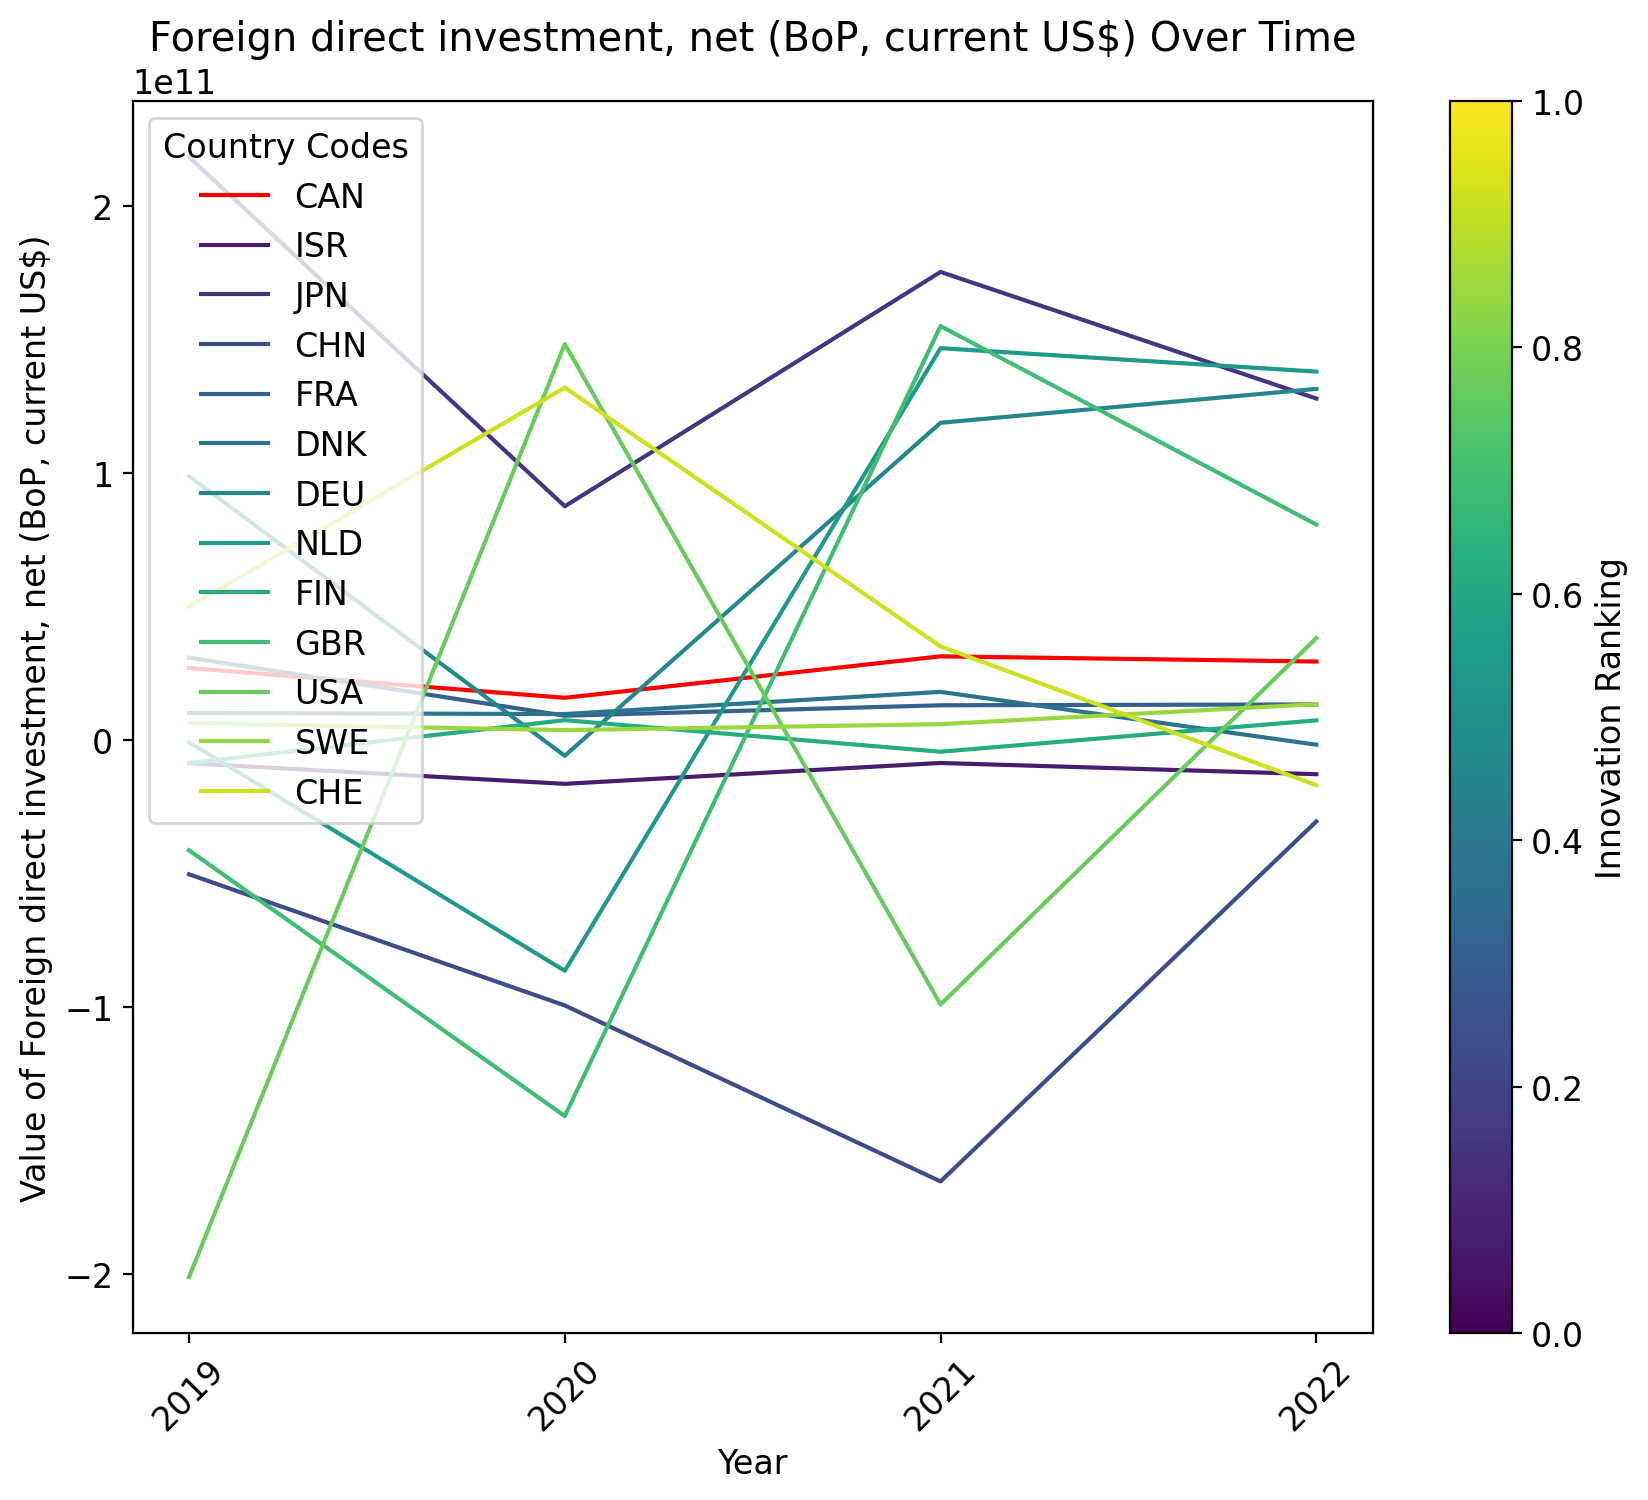

/var/folders/zr/fd5vzvl11xb761hw_h0p4mtm0000gn/T/ipykernel_12298/2846296294.py:63: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data_subset = self.df[indicator_columns].set_axis(years, axis=1, inplace=False)


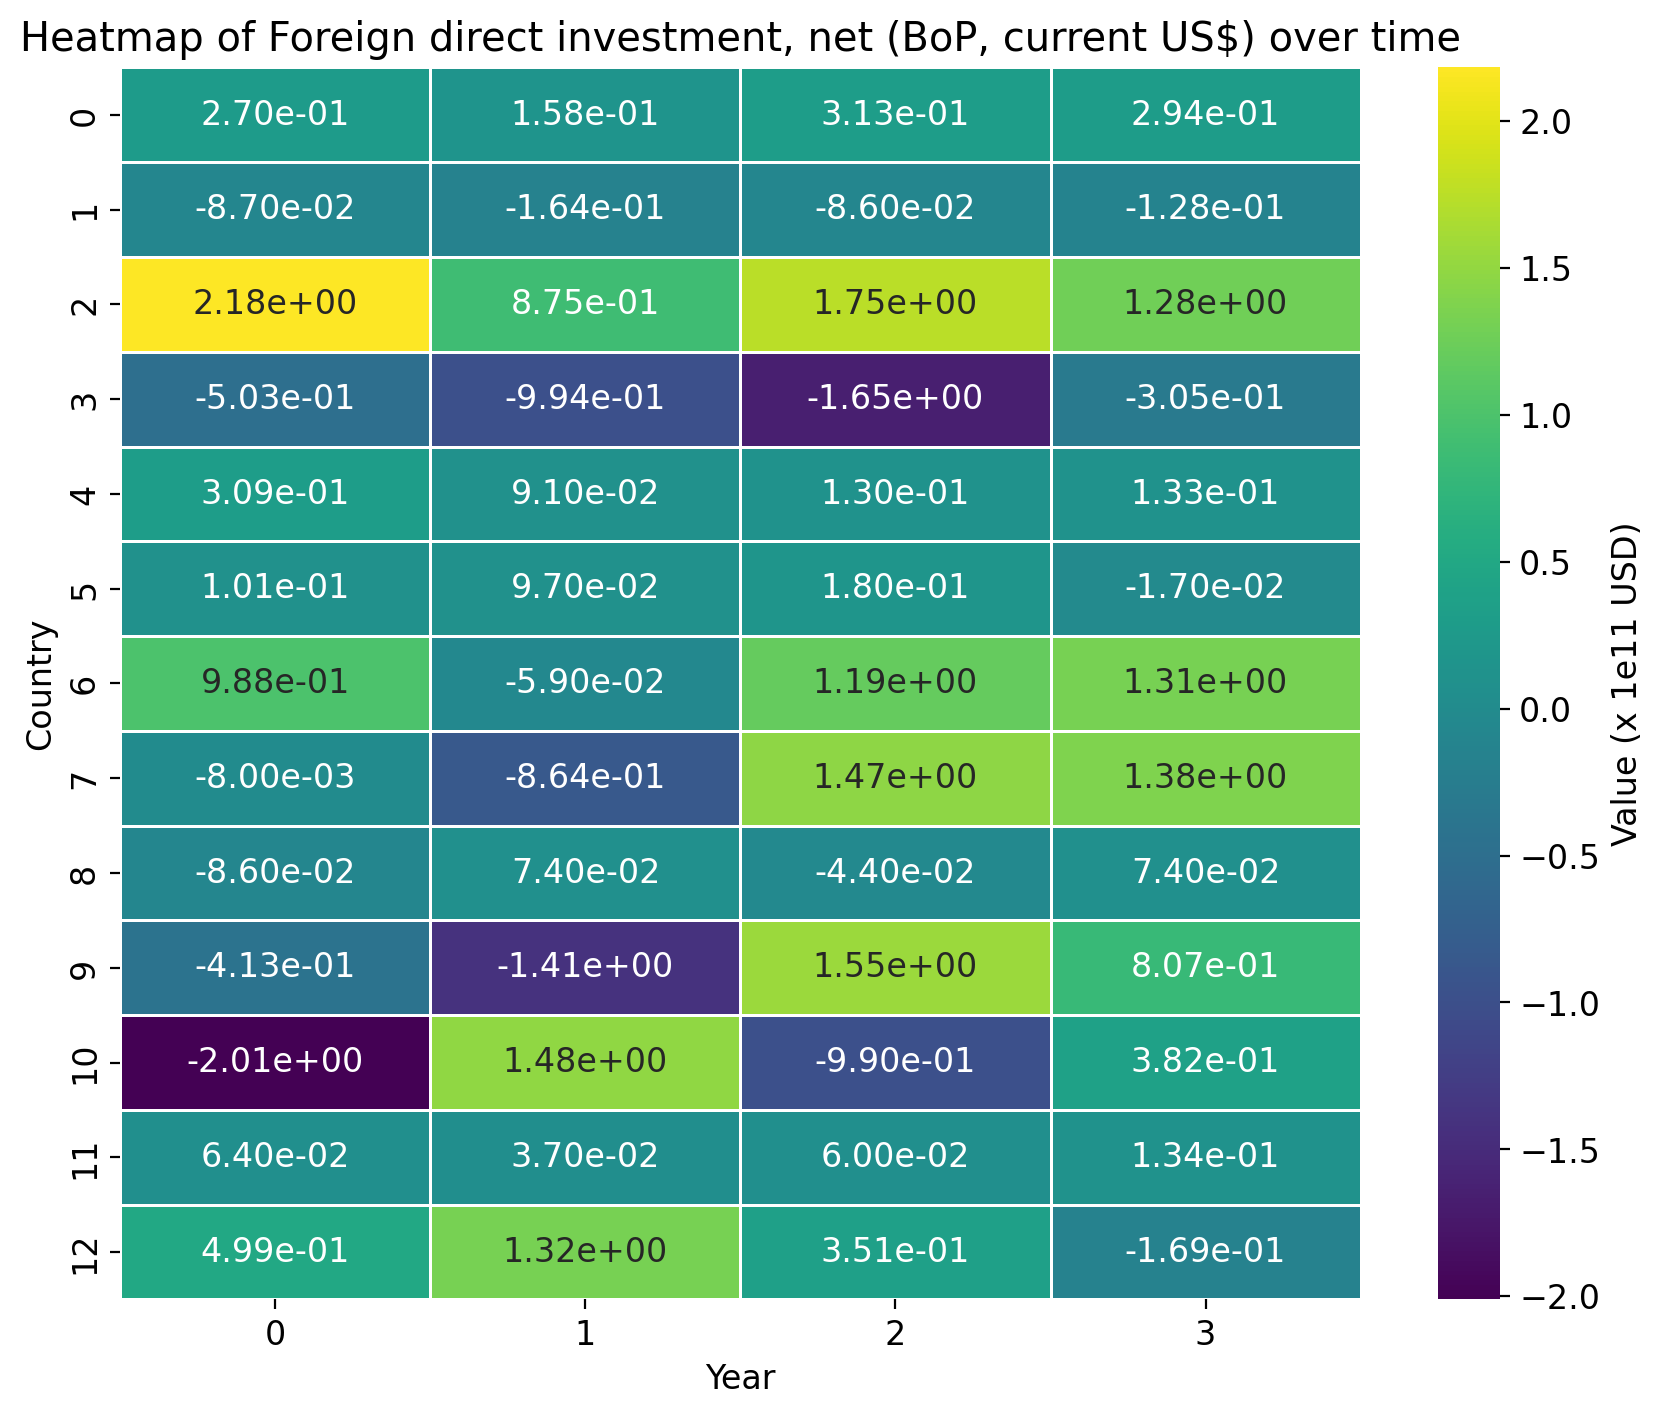

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

class DataExplorer:
    def __init__(self, dataframe, indicator_names):
        self.df = dataframe
        self.indicator_names = indicator_names
        
        # Configure matplotlib to use LaTeX for rendering text
        # plt.rcParams.update({
            # "text.usetex": True,
        #     "font.family": "serif",
        #     "font.serif": ["Palatino"],
        # })
        # Set a font that supports Unicode characters and looks nice
        plt.rcParams.update({
            "text.usetex": False,
            'font.size': 12,
            'font.family': 'sans-serif',
            'font.sans-serif': ['DejaVu Sans'],  # This font supports a wide range of Unicode characters
        })

    def plot_indicator(self, indicator_code, highlight_country = 'CAN'):
        # Filter columns for the given indicator code
        indicator_columns = [col for col in self.df.columns if indicator_code in col]

        # Extract years from column names
        years = [col.split('_YR')[-1] for col in indicator_columns]

        # Get indicator description
        indicator_name = self.indicator_names[indicator_code]  # Use self.indicator_names

        # Select the relevant columns from the DataFrame
        data_subset = self.df[indicator_columns]

        # Create a colormap
        cm = plt.get_cmap('viridis')

        countries_ranked = data_subset.index
        # Number of countries
        num_countries = len(countries_ranked)
        plt.figure(figsize = (10,8),dpi=200)
        # Plot each country's data with a color corresponding to its rank
        for i, country_code in enumerate(countries_ranked):
            country_data = data_subset.loc[country_code]
            color = 'red' if country_code == highlight_country else cm(i / num_countries)
            plt.plot(years, country_data, label=f'{country_code}', color=color)

        # Customize the plot
        plt.title(f'{indicator_name} Over Time')
        plt.xlabel('Year')
        plt.ylabel(f'Value of {indicator_name}')
        plt.legend(title='Country Codes', loc='upper left')
        plt.colorbar(plt.cm.ScalarMappable(cmap=cm), ax=plt.gca(), orientation='vertical', label='Innovation Ranking')

        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.show()
    
    def heatmap_indicator(self, indicator_code):
        indicator_columns = [col for col in self.df.columns if indicator_code in col]
        years = [col.split('_YR')[-1] for col in indicator_columns]
        data_subset = self.df[indicator_columns].set_axis(years, axis=1, inplace=False)
        
        # Normalize the data by a common factor, e.g., 1e11
        data_normalized = data_subset / 1e11

        # Round the data to 3 significant figures
        data_rounded = data_normalized.round(3)

        plt.figure(figsize=(10, 8), dpi=200)
        ax = sns.heatmap(data_rounded, annot=True, fmt=".2e", linewidths=.5, cmap='viridis')

        # Set the colorbar label
        colorbar = ax.collections[0].colorbar
        colorbar.set_label('Value (x 1e11 USD)')

        # Set the tick labels formatter to use scientific notation
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):d}'))
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):d}'))

        plt.title(f'Heatmap of {self.indicator_names[indicator_code]} over time')
        plt.xlabel('Year')
        plt.ylabel('Country')
        plt.show()

# get cleaned dataframe
df = data_cleaner.df

# Plot indicator names for reference
for key, value in indicator_names.items():
    print(f"{key}: {value}")

data_explorer = DataExplorer(df, indicator_names)
indicator_code = 'BN.KLT.DINV.CD'
# indicator_code = 'IE.PPN.ICTI.CD'
data_explorer.plot_indicator(indicator_code)

data_explorer = DataExplorer(df, indicator_names)
data_explorer.heatmap_indicator(indicator_code)


<Figure size 640x480 with 0 Axes>

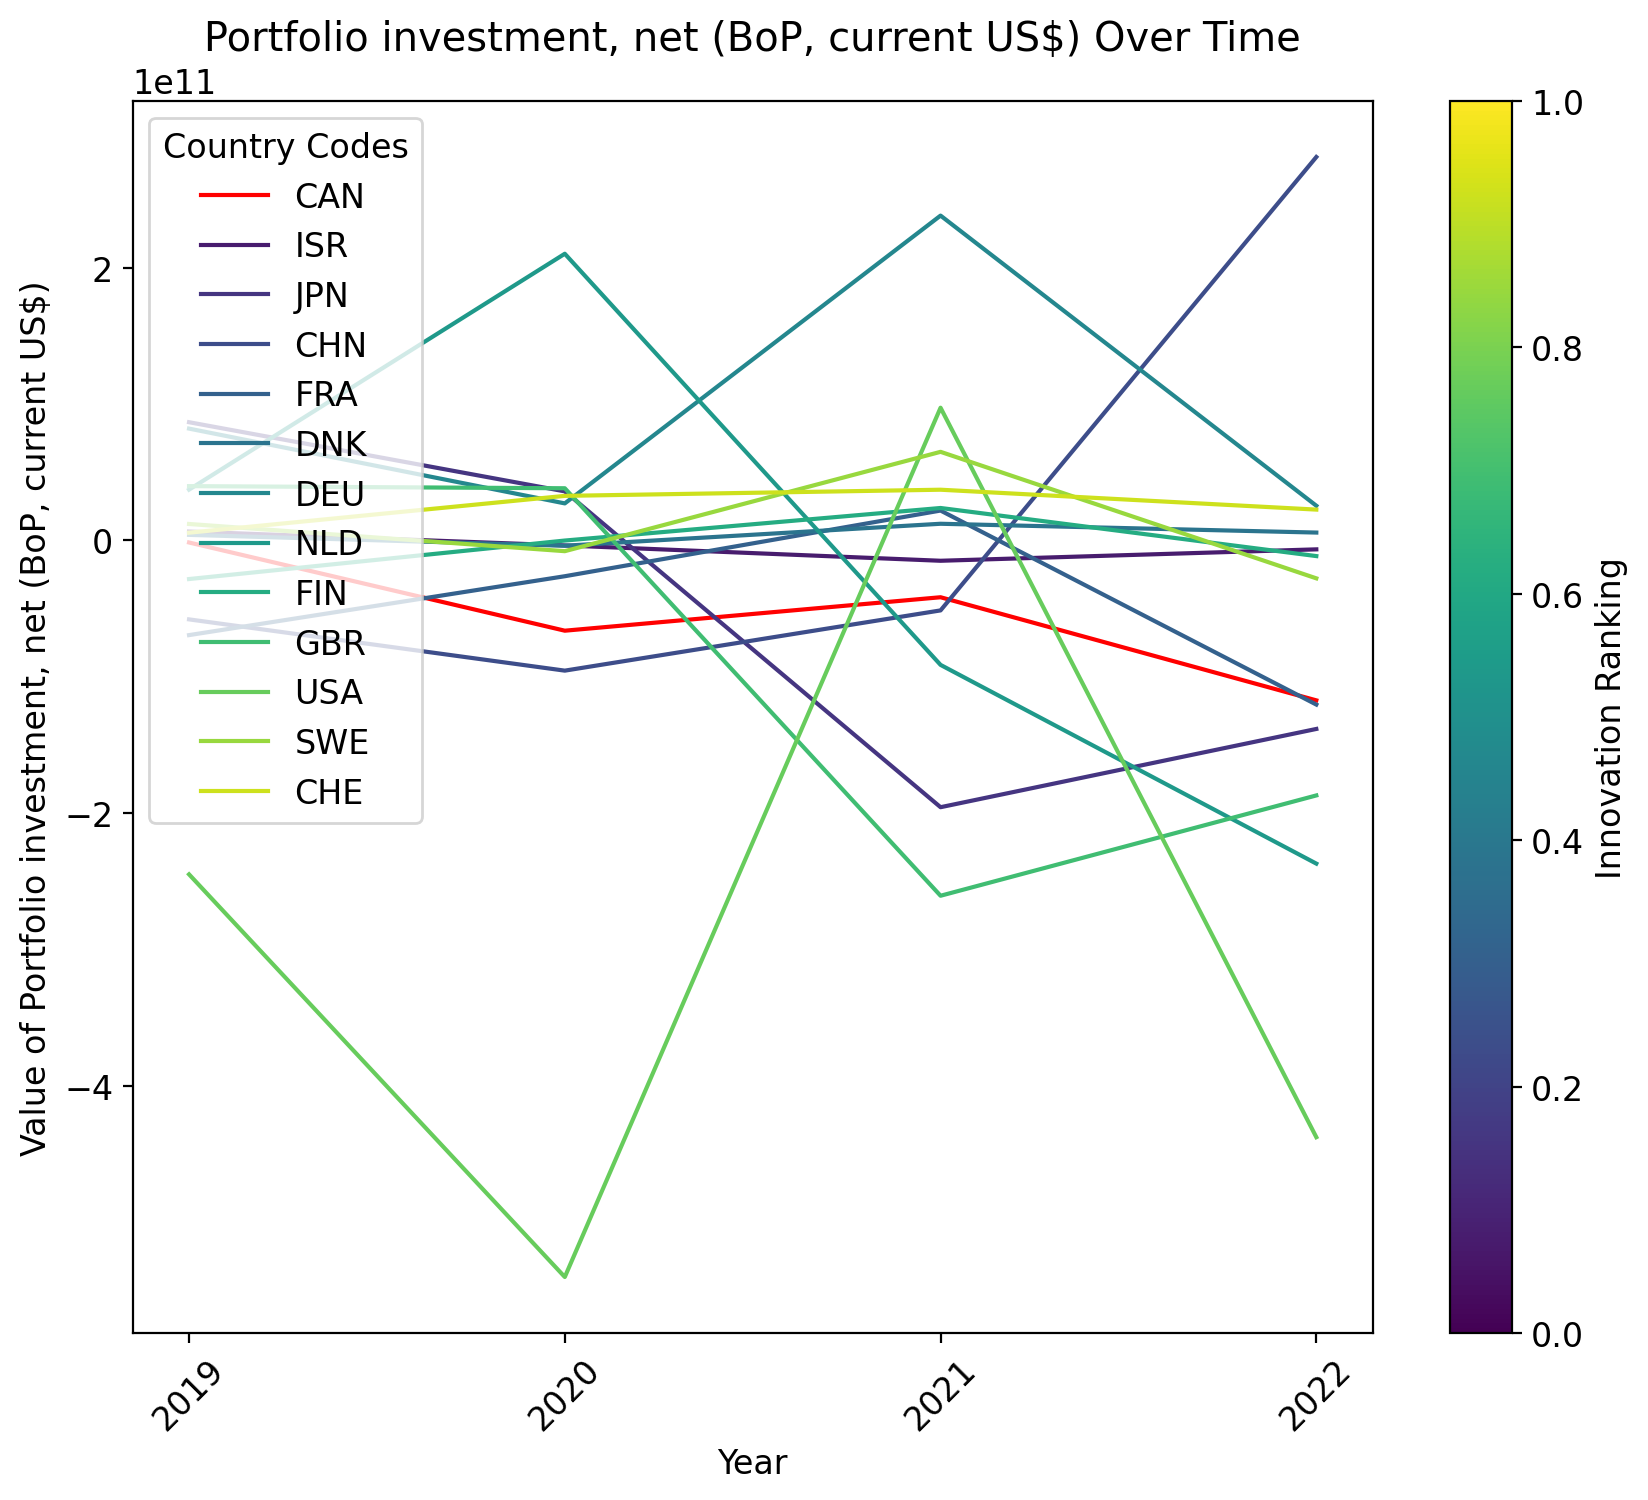

<Figure size 640x480 with 0 Axes>

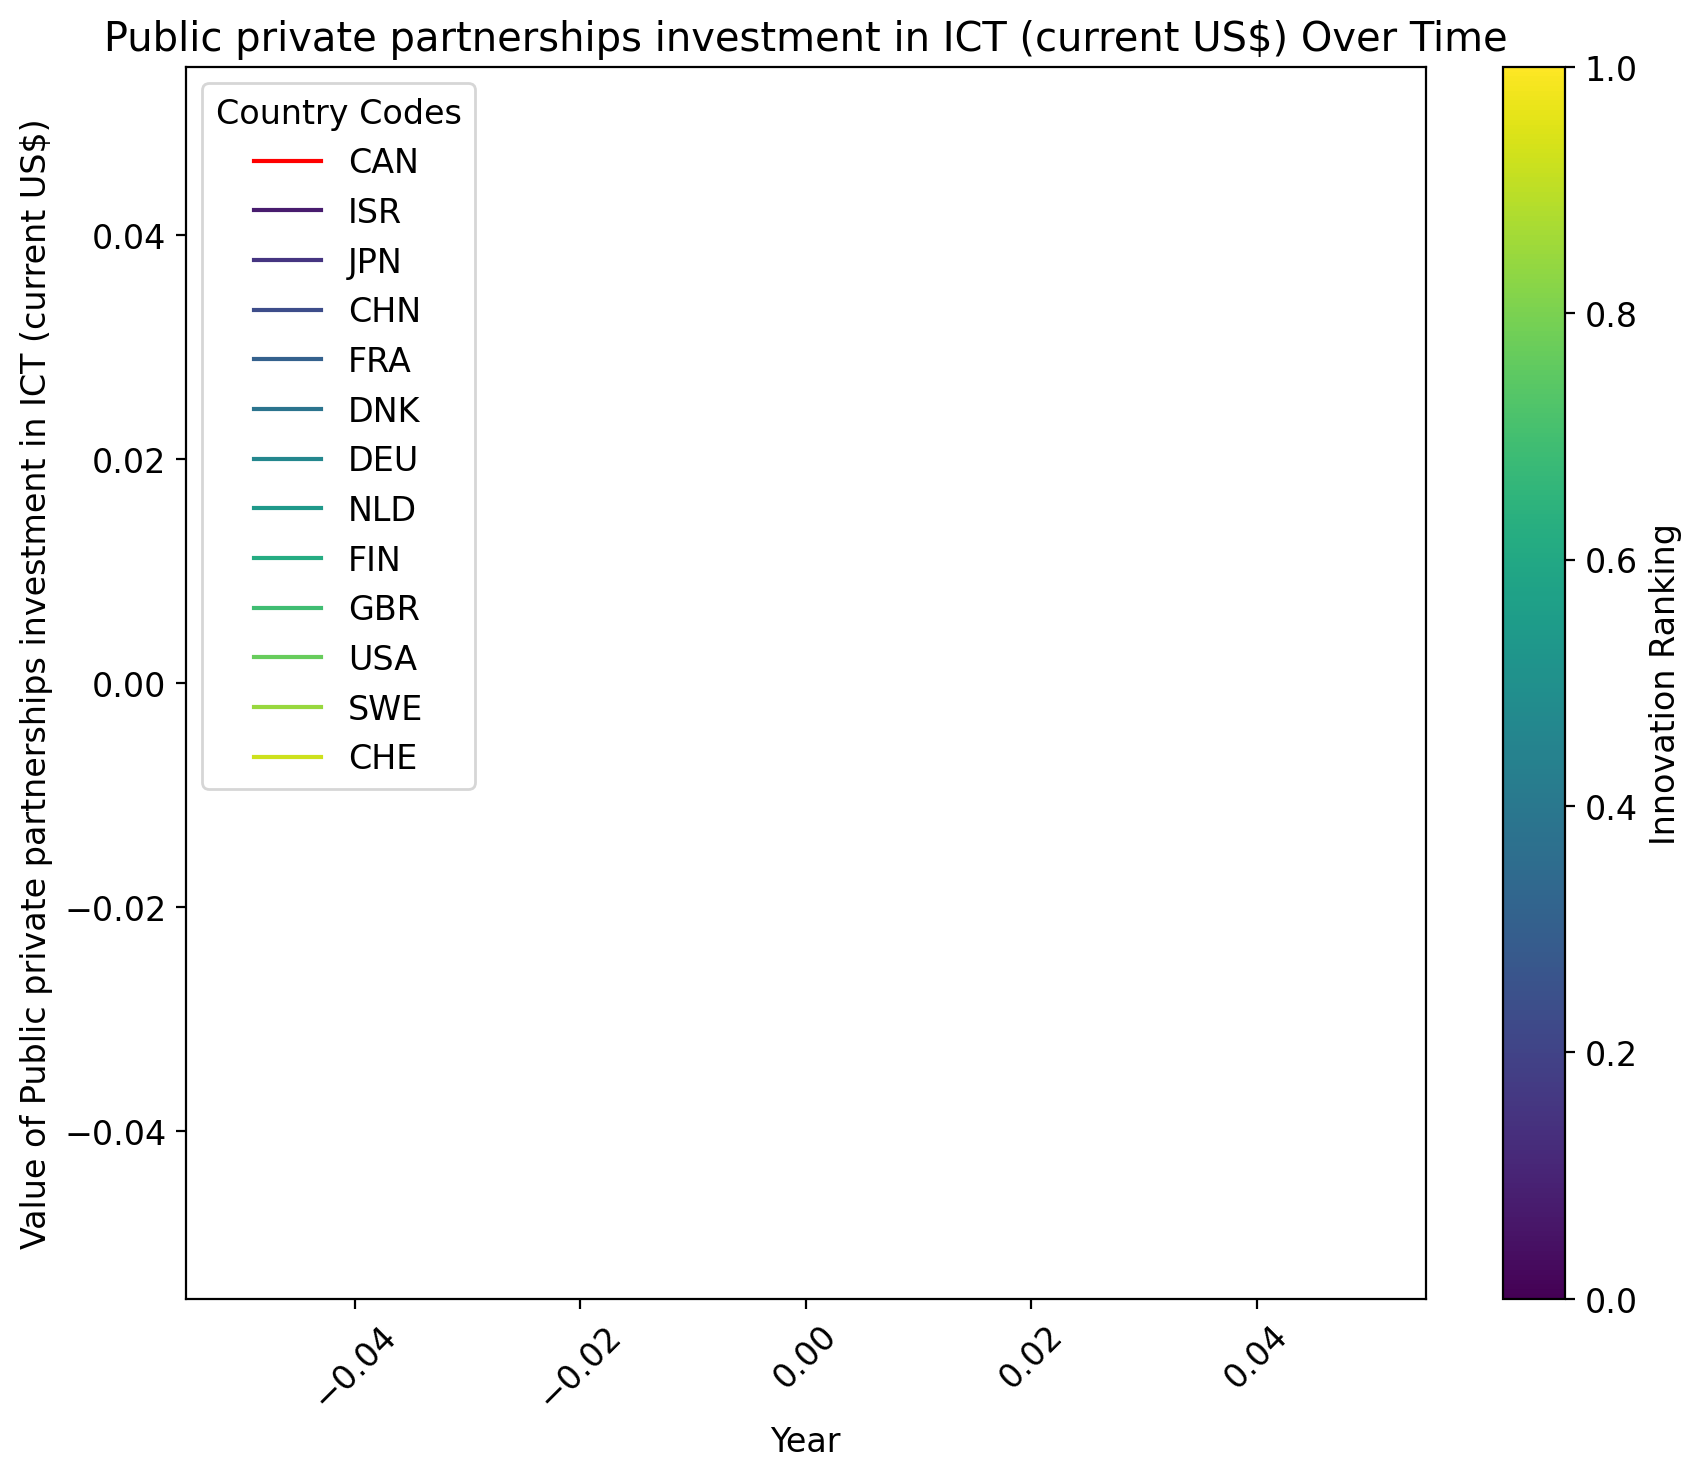

<Figure size 640x480 with 0 Axes>

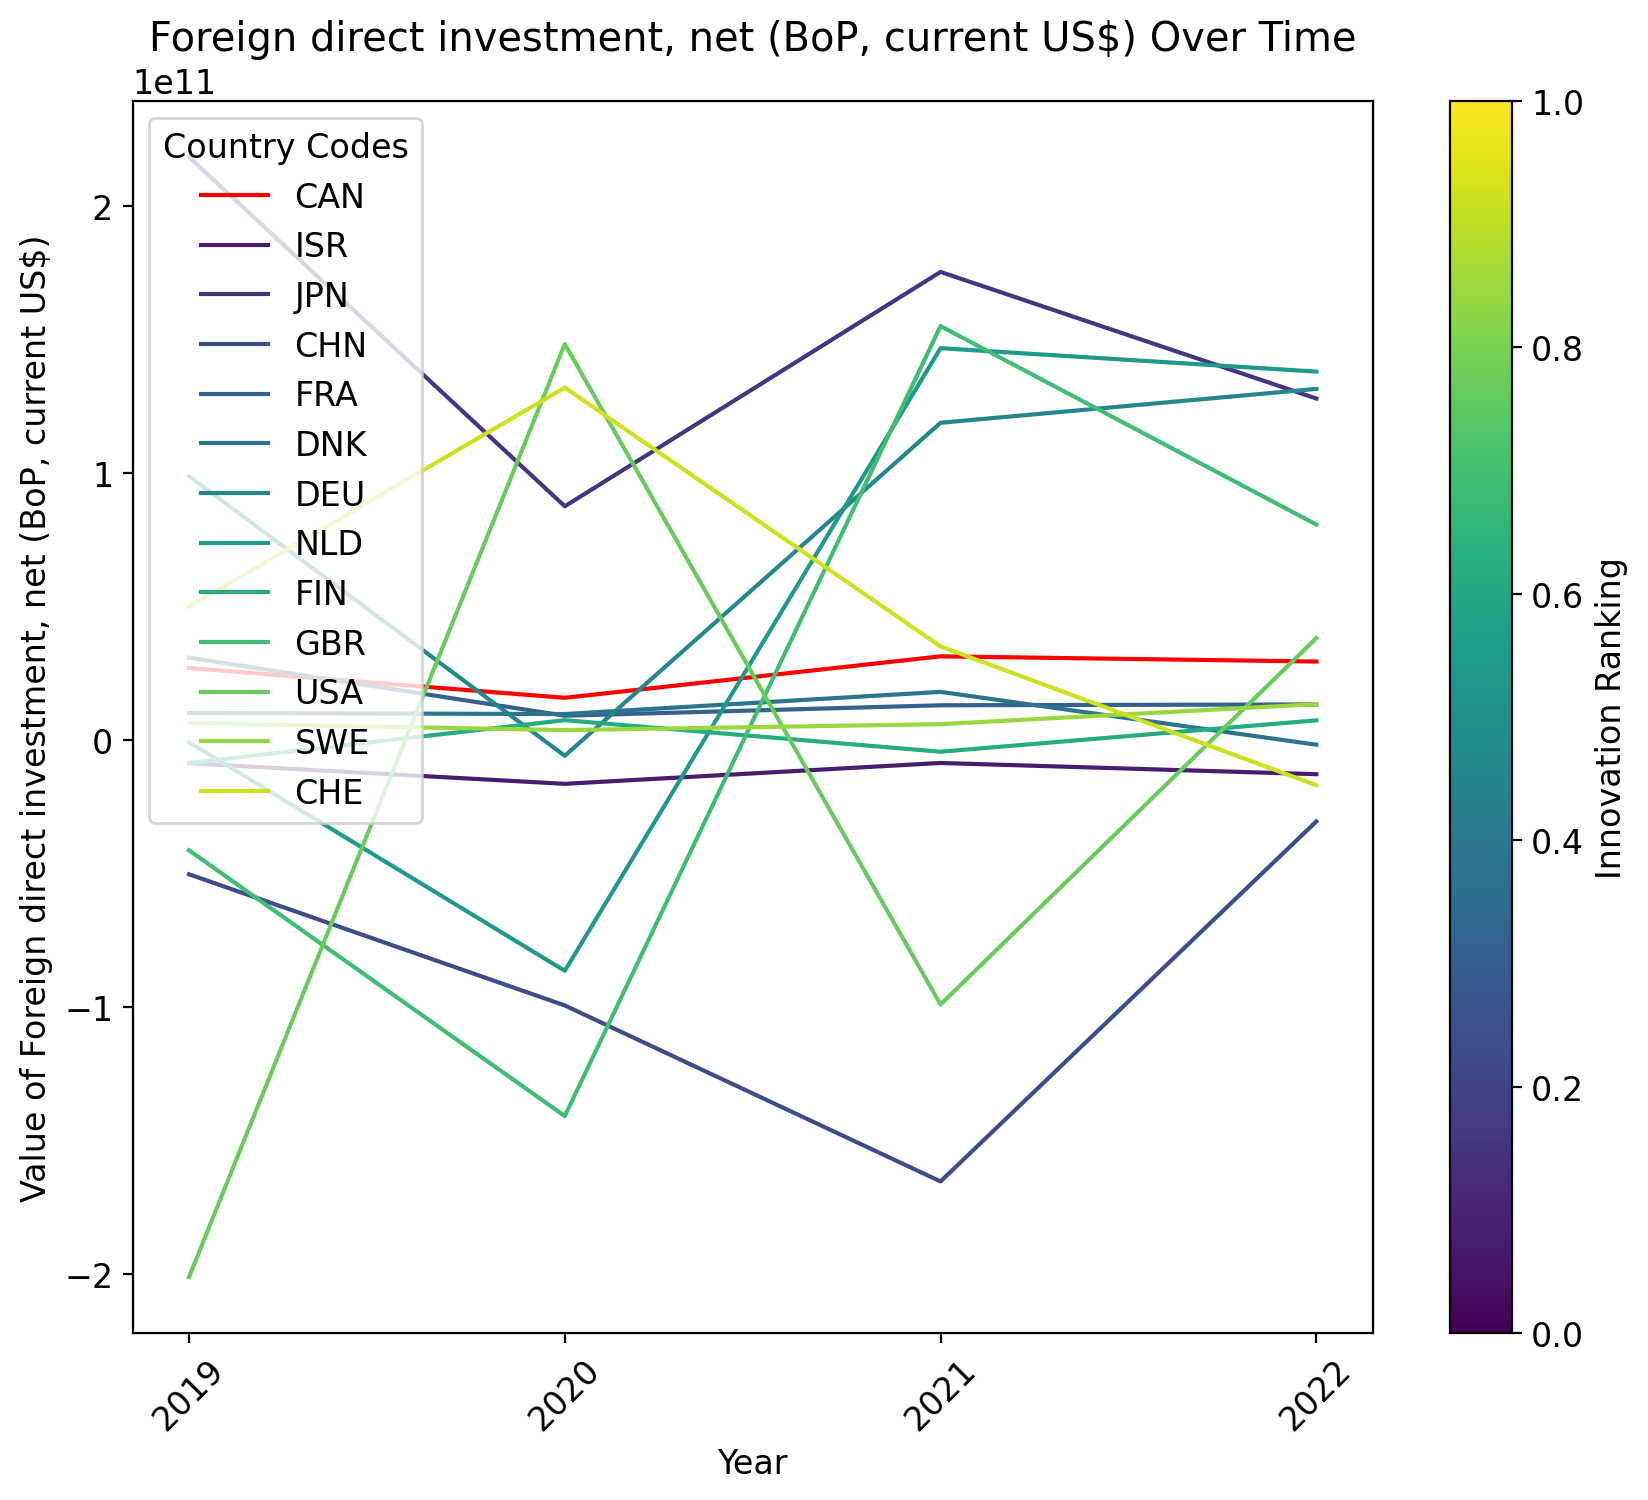

<Figure size 640x480 with 0 Axes>

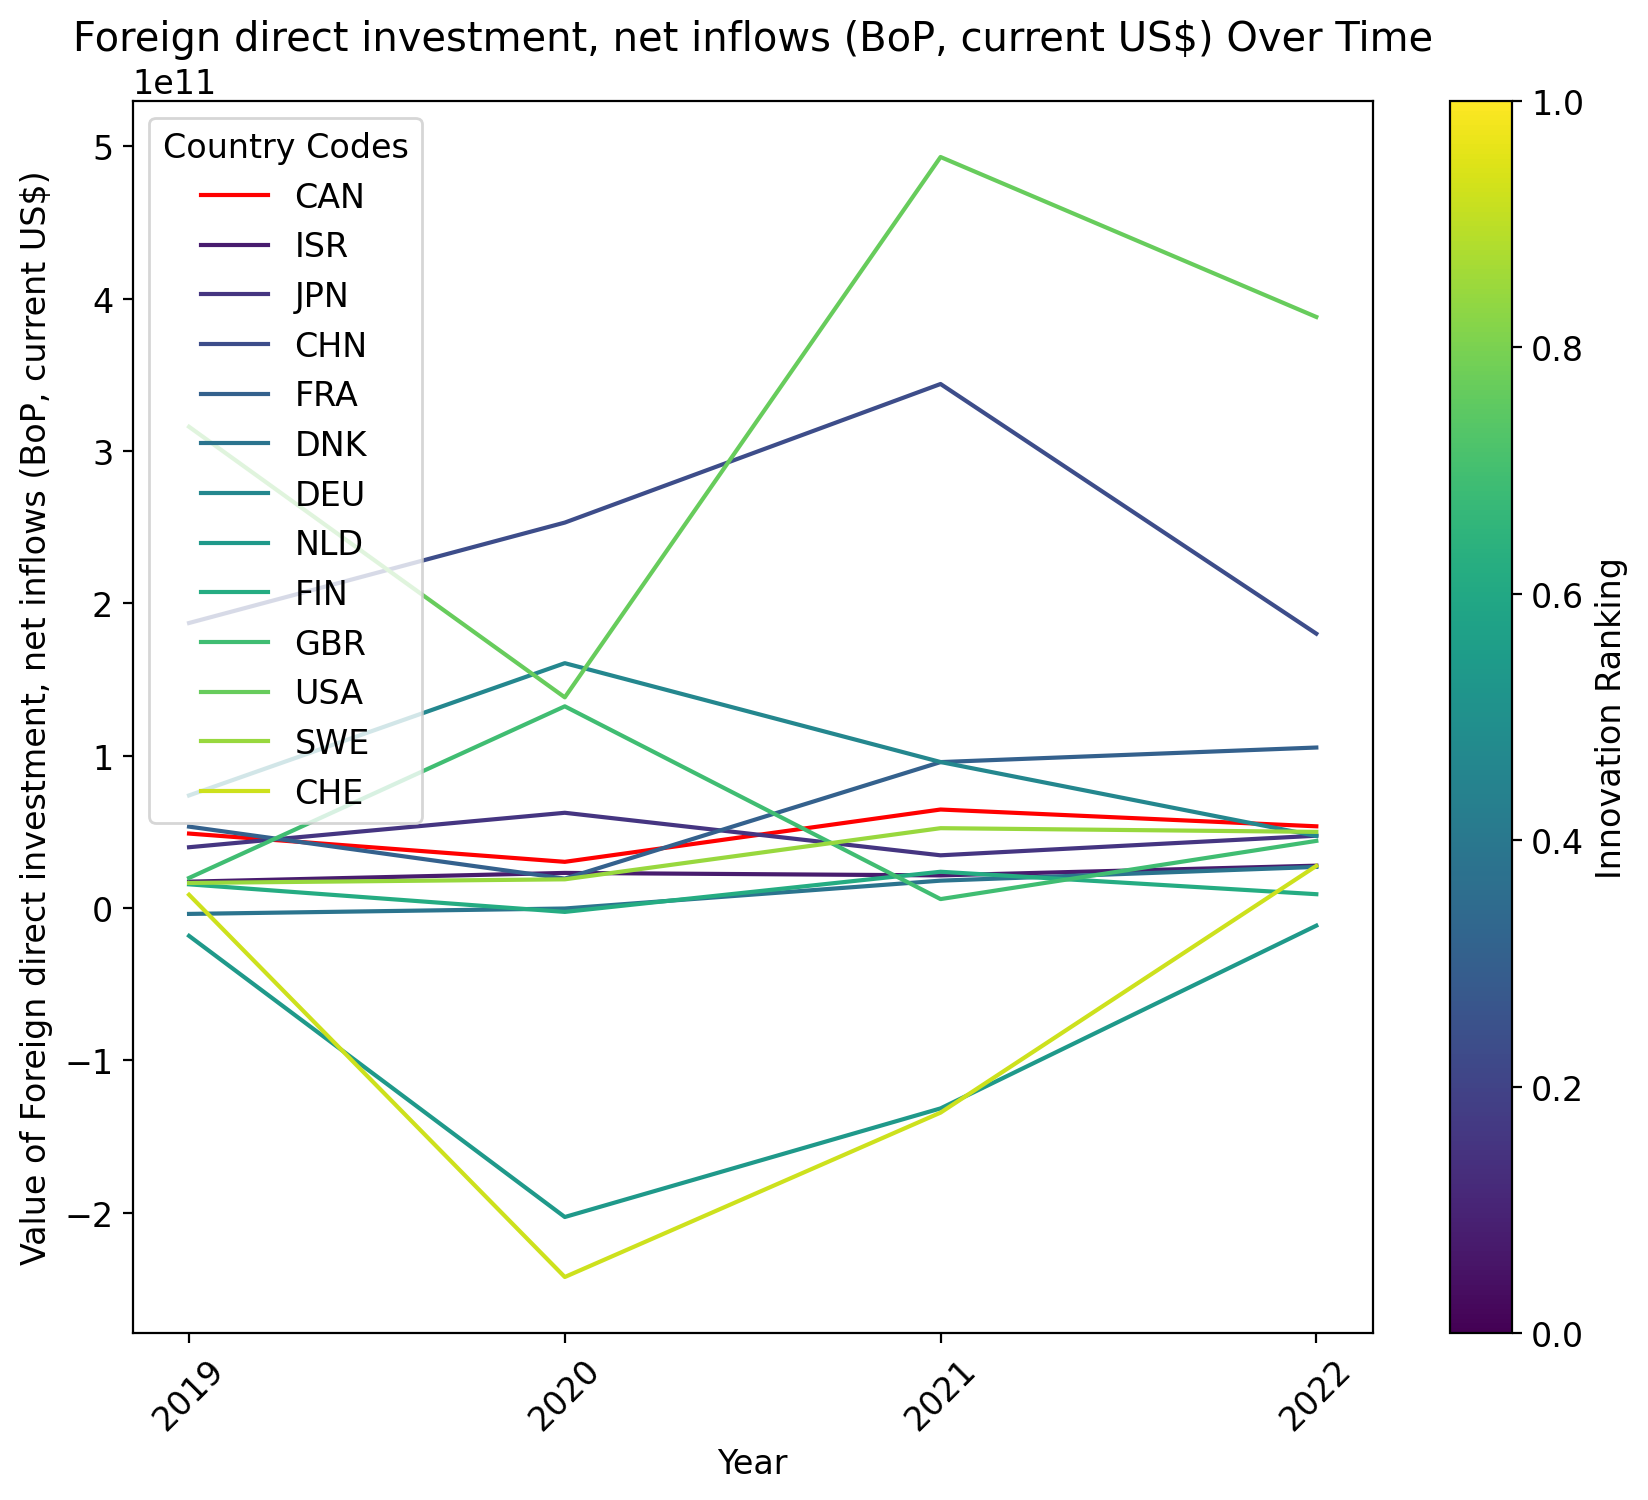

<Figure size 640x480 with 0 Axes>

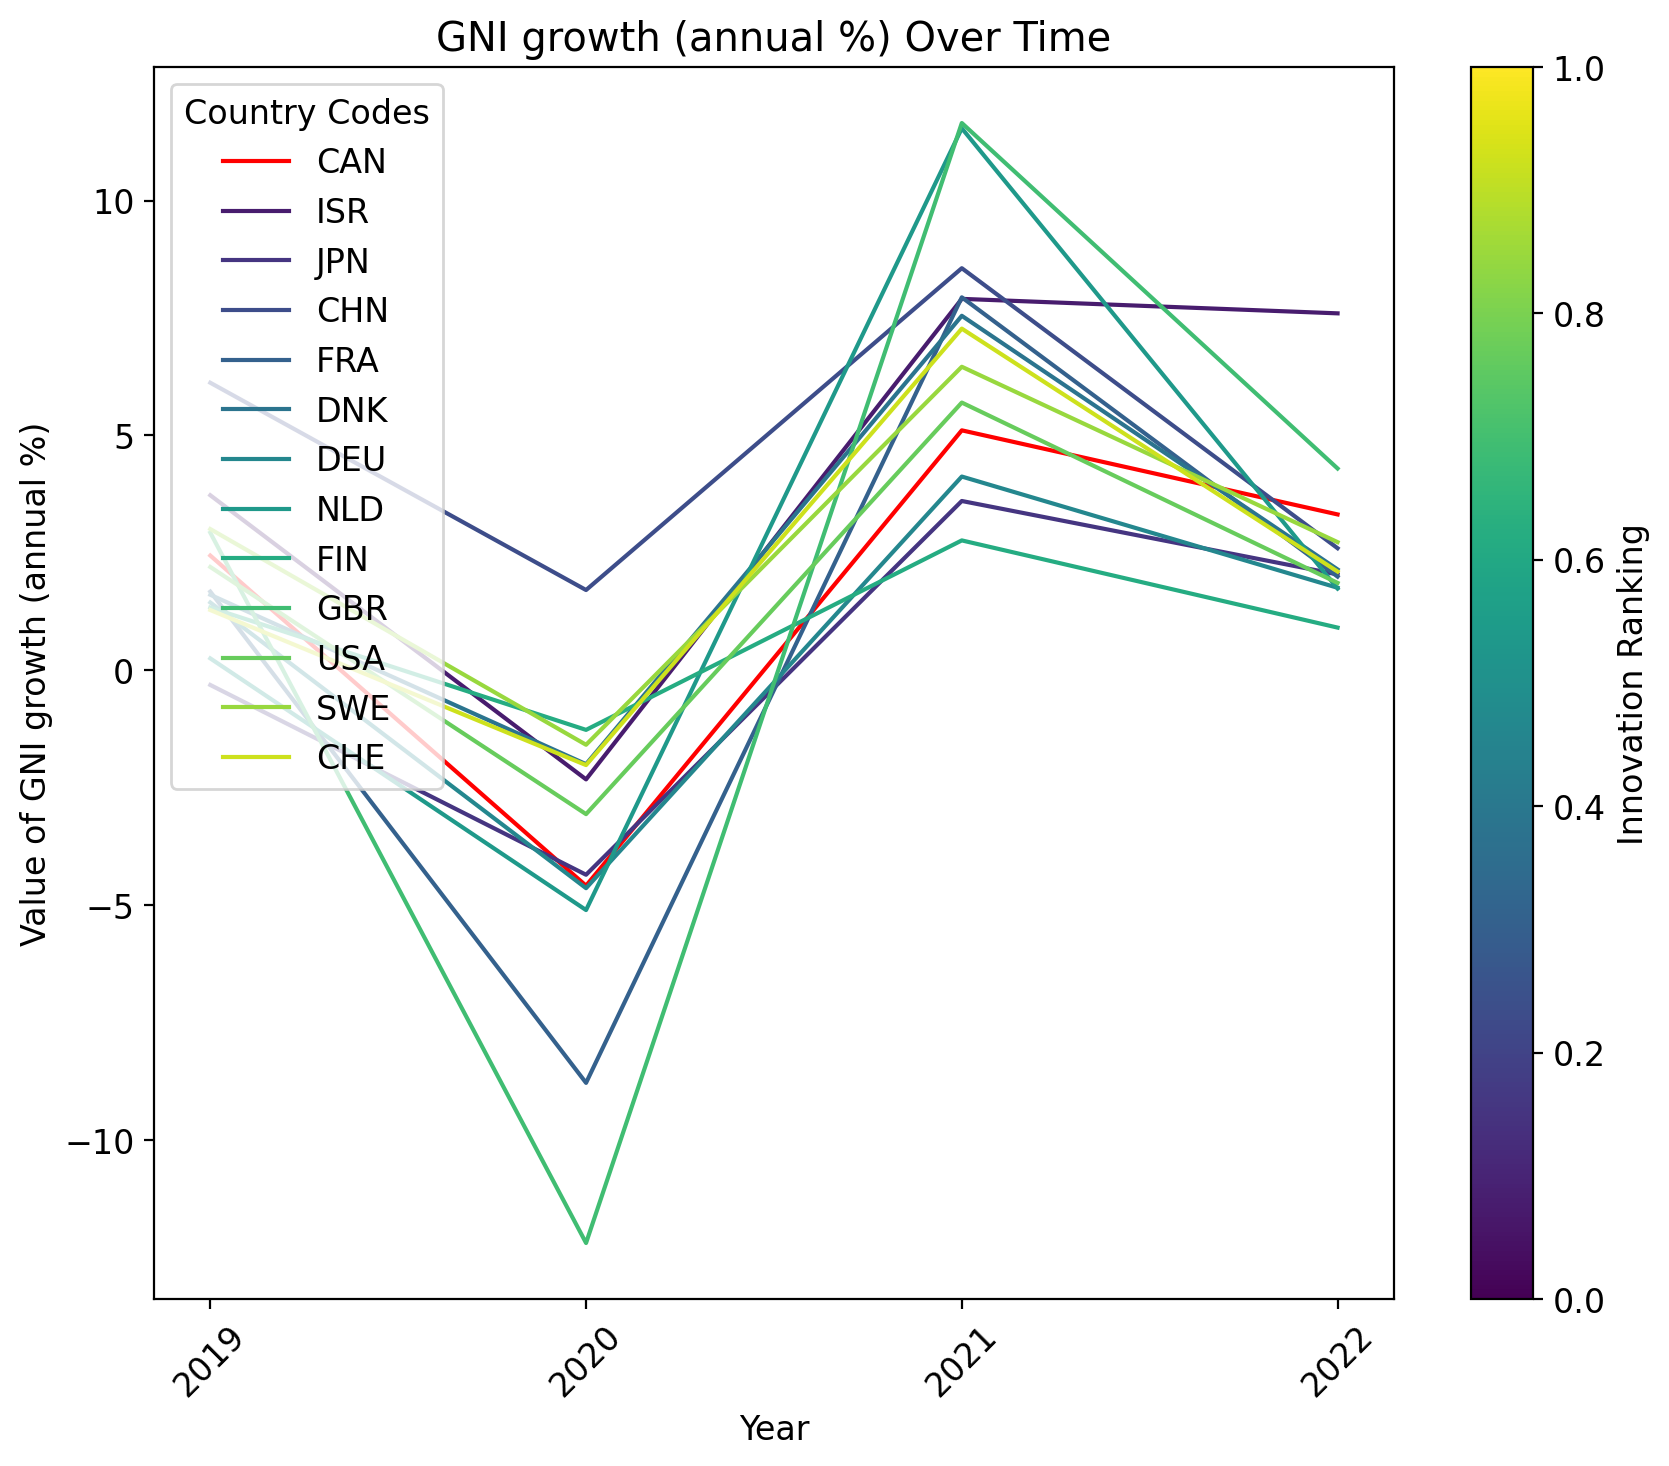

<Figure size 640x480 with 0 Axes>

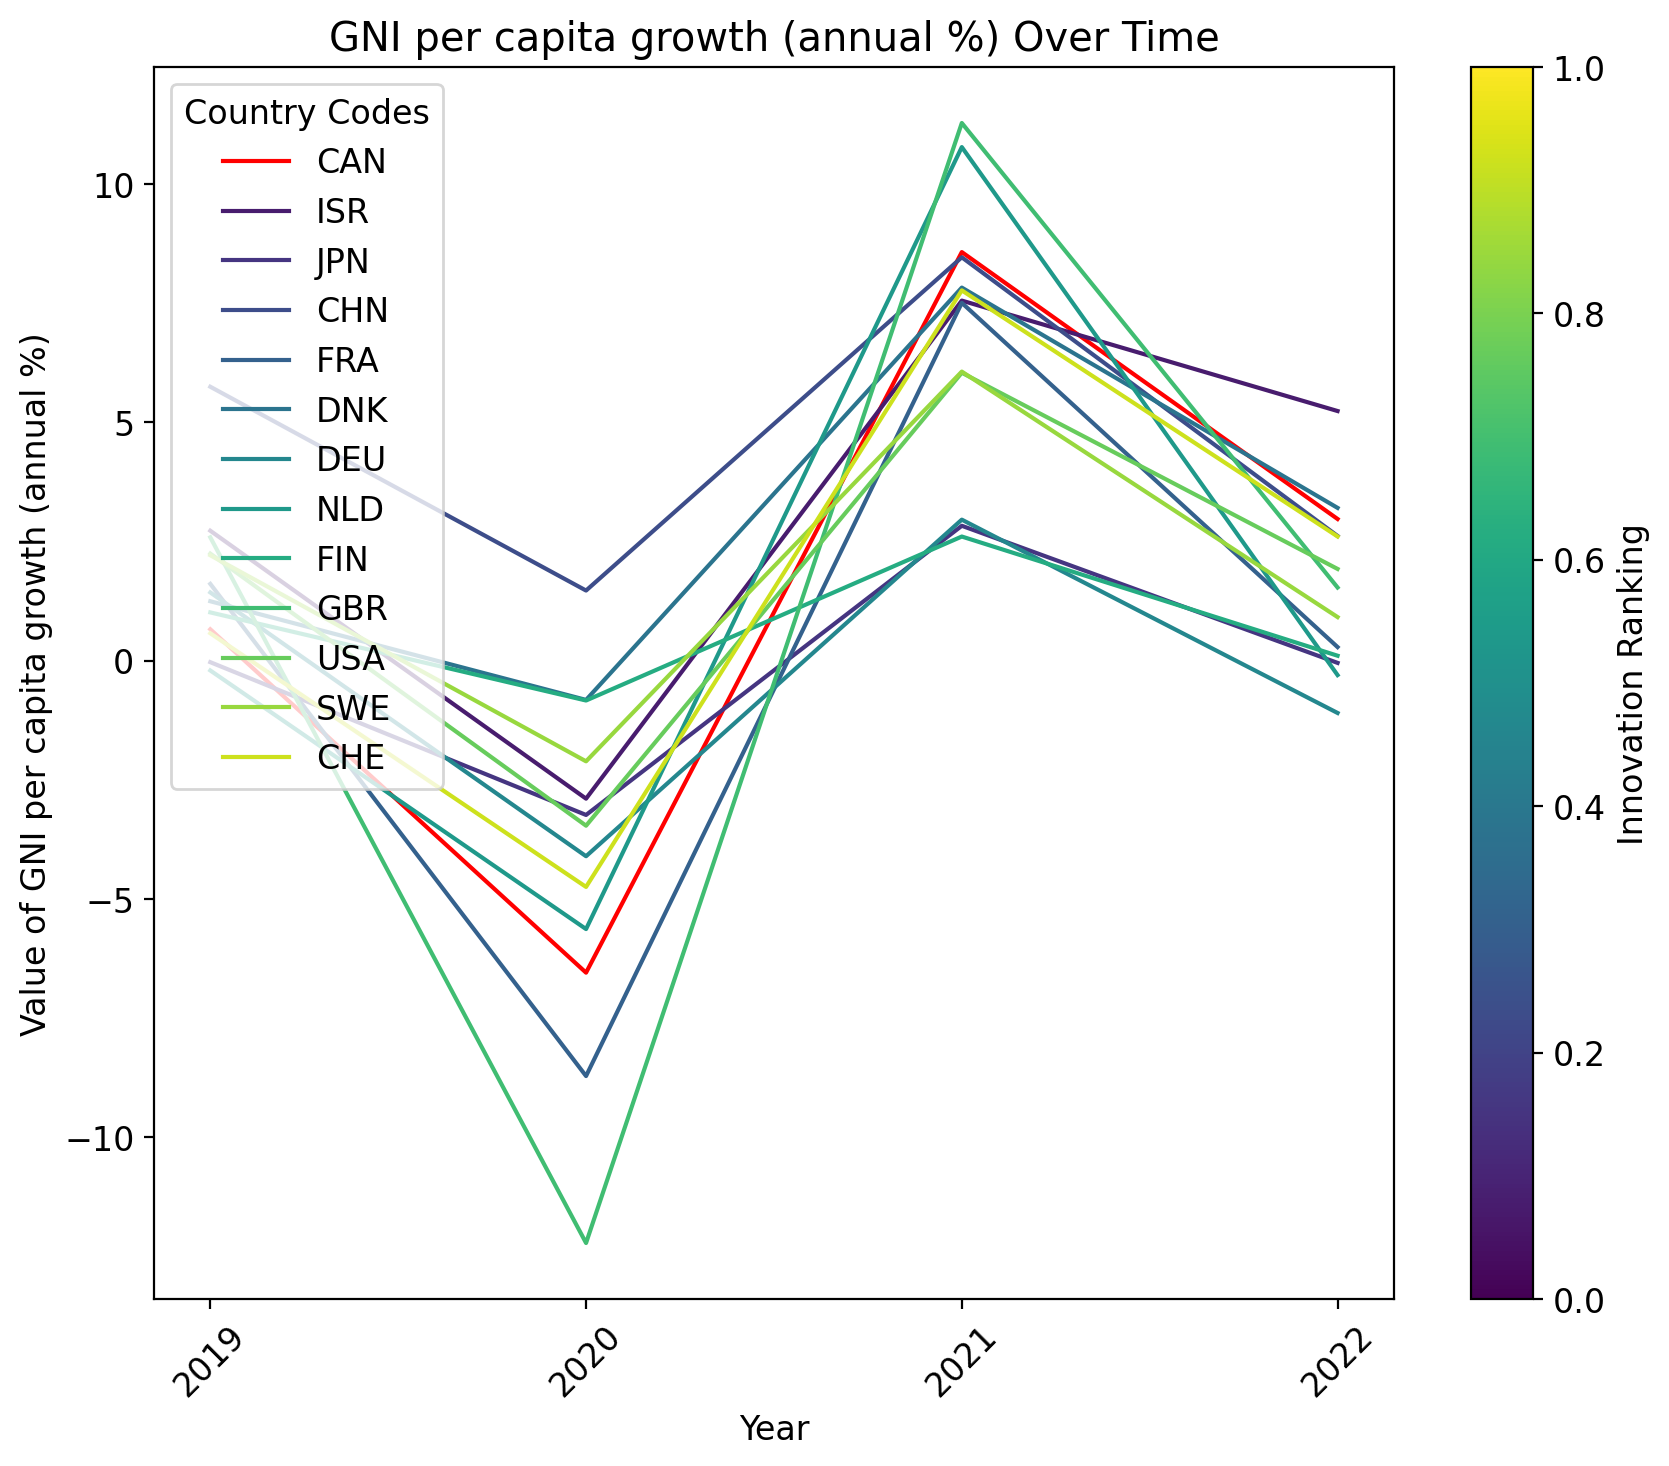

<Figure size 640x480 with 0 Axes>

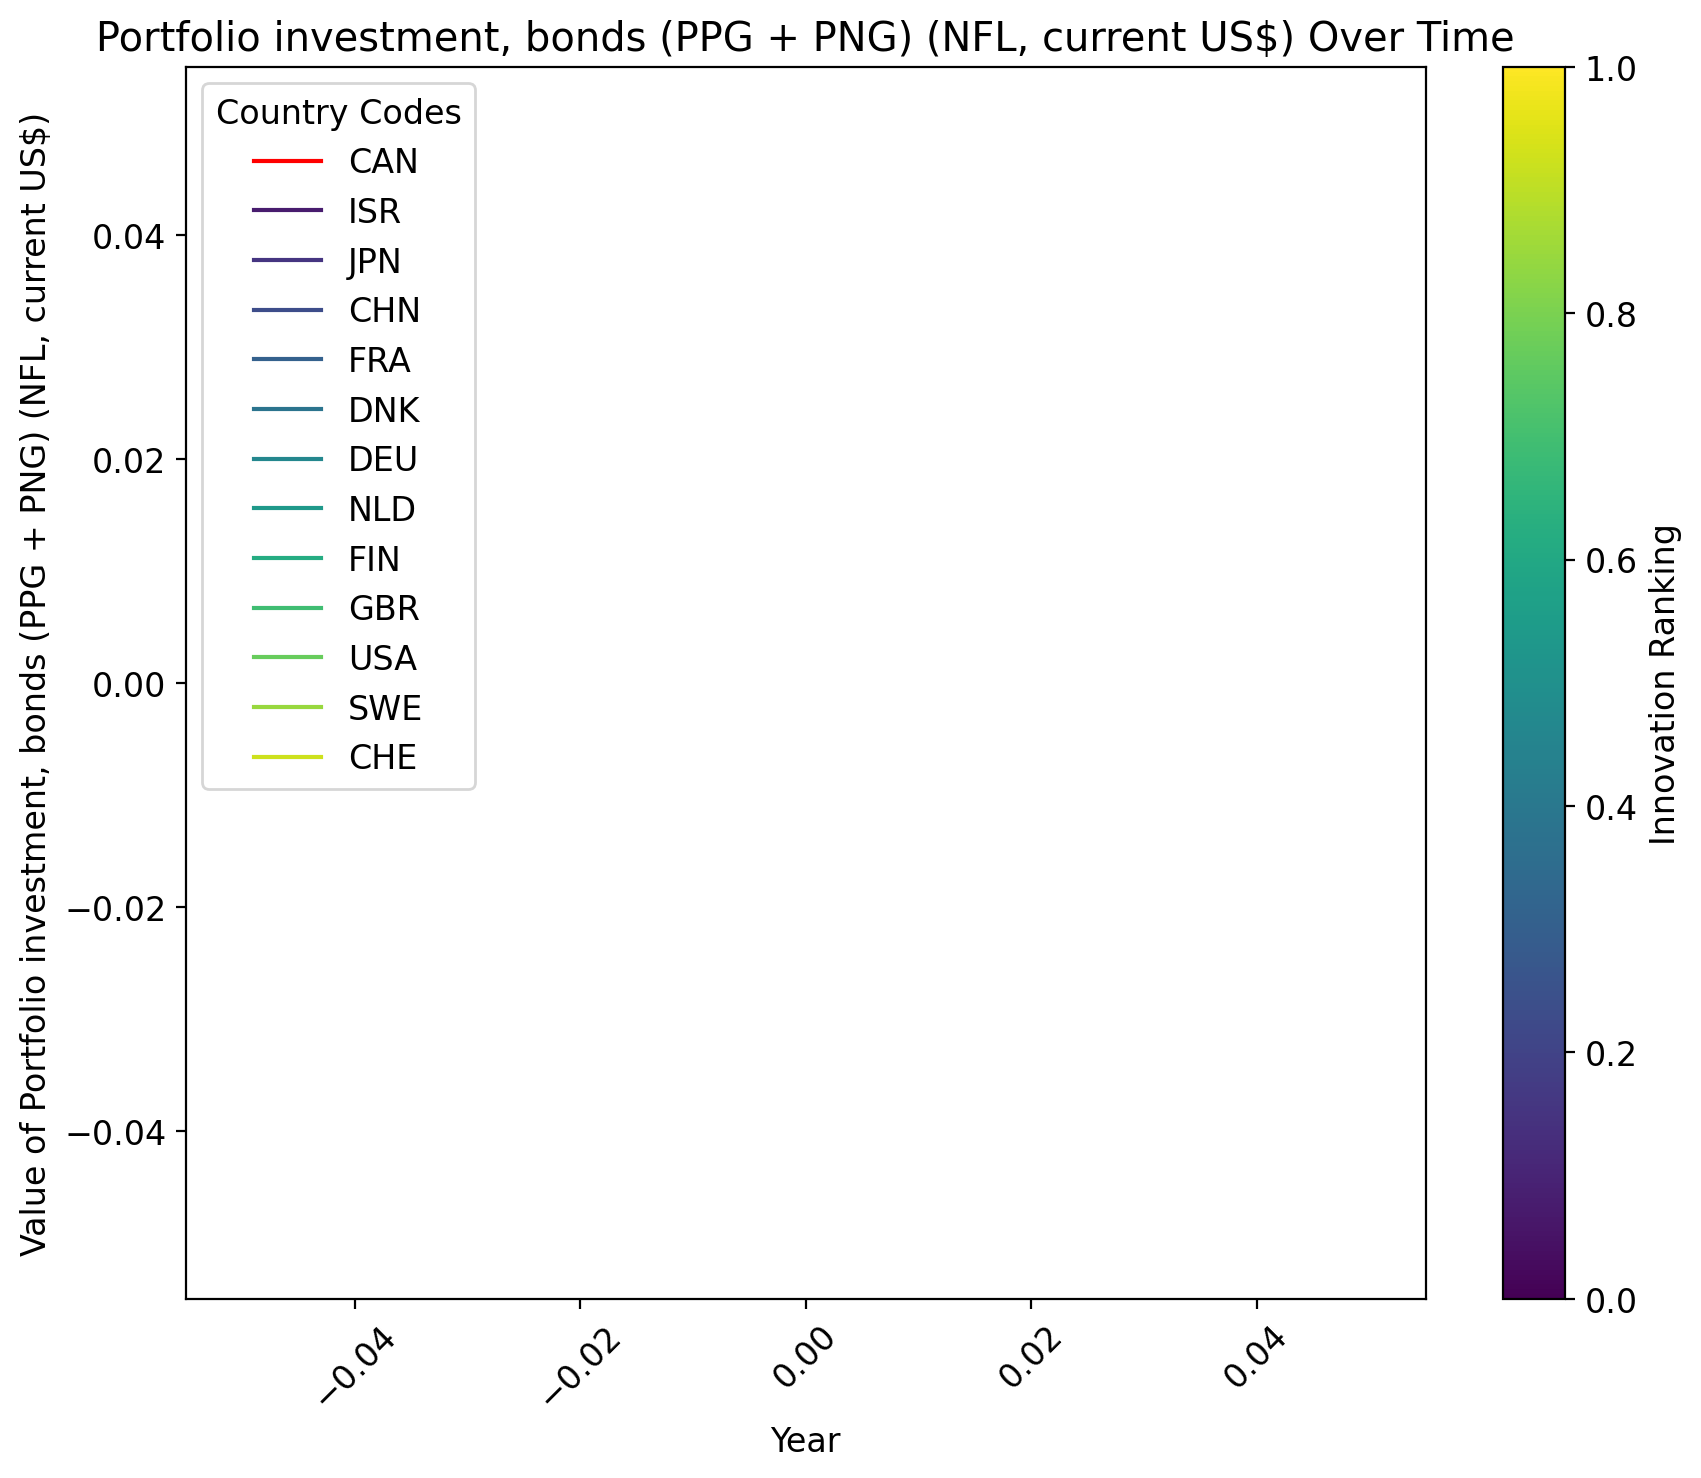

<Figure size 640x480 with 0 Axes>

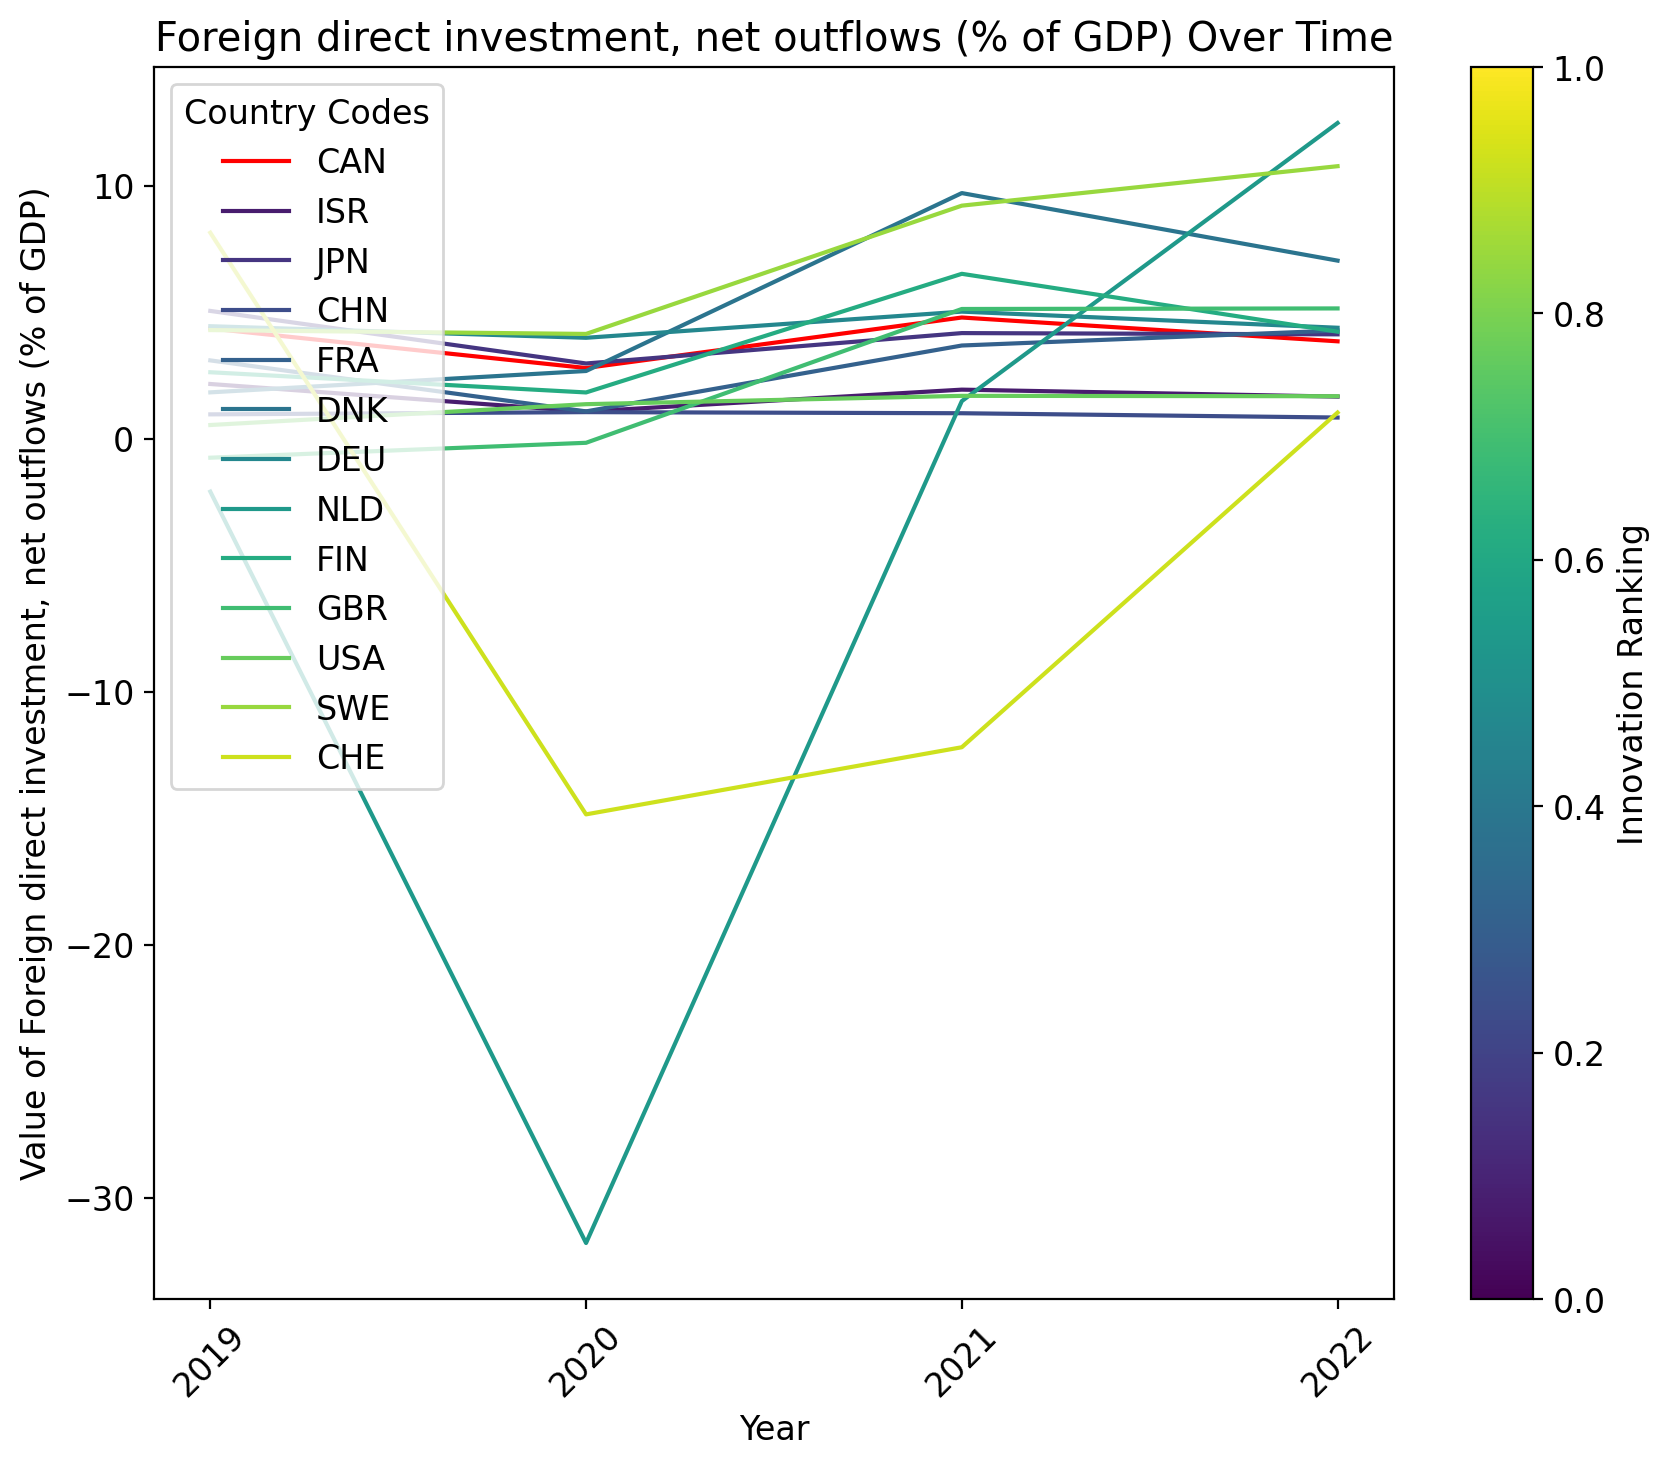

<Figure size 640x480 with 0 Axes>

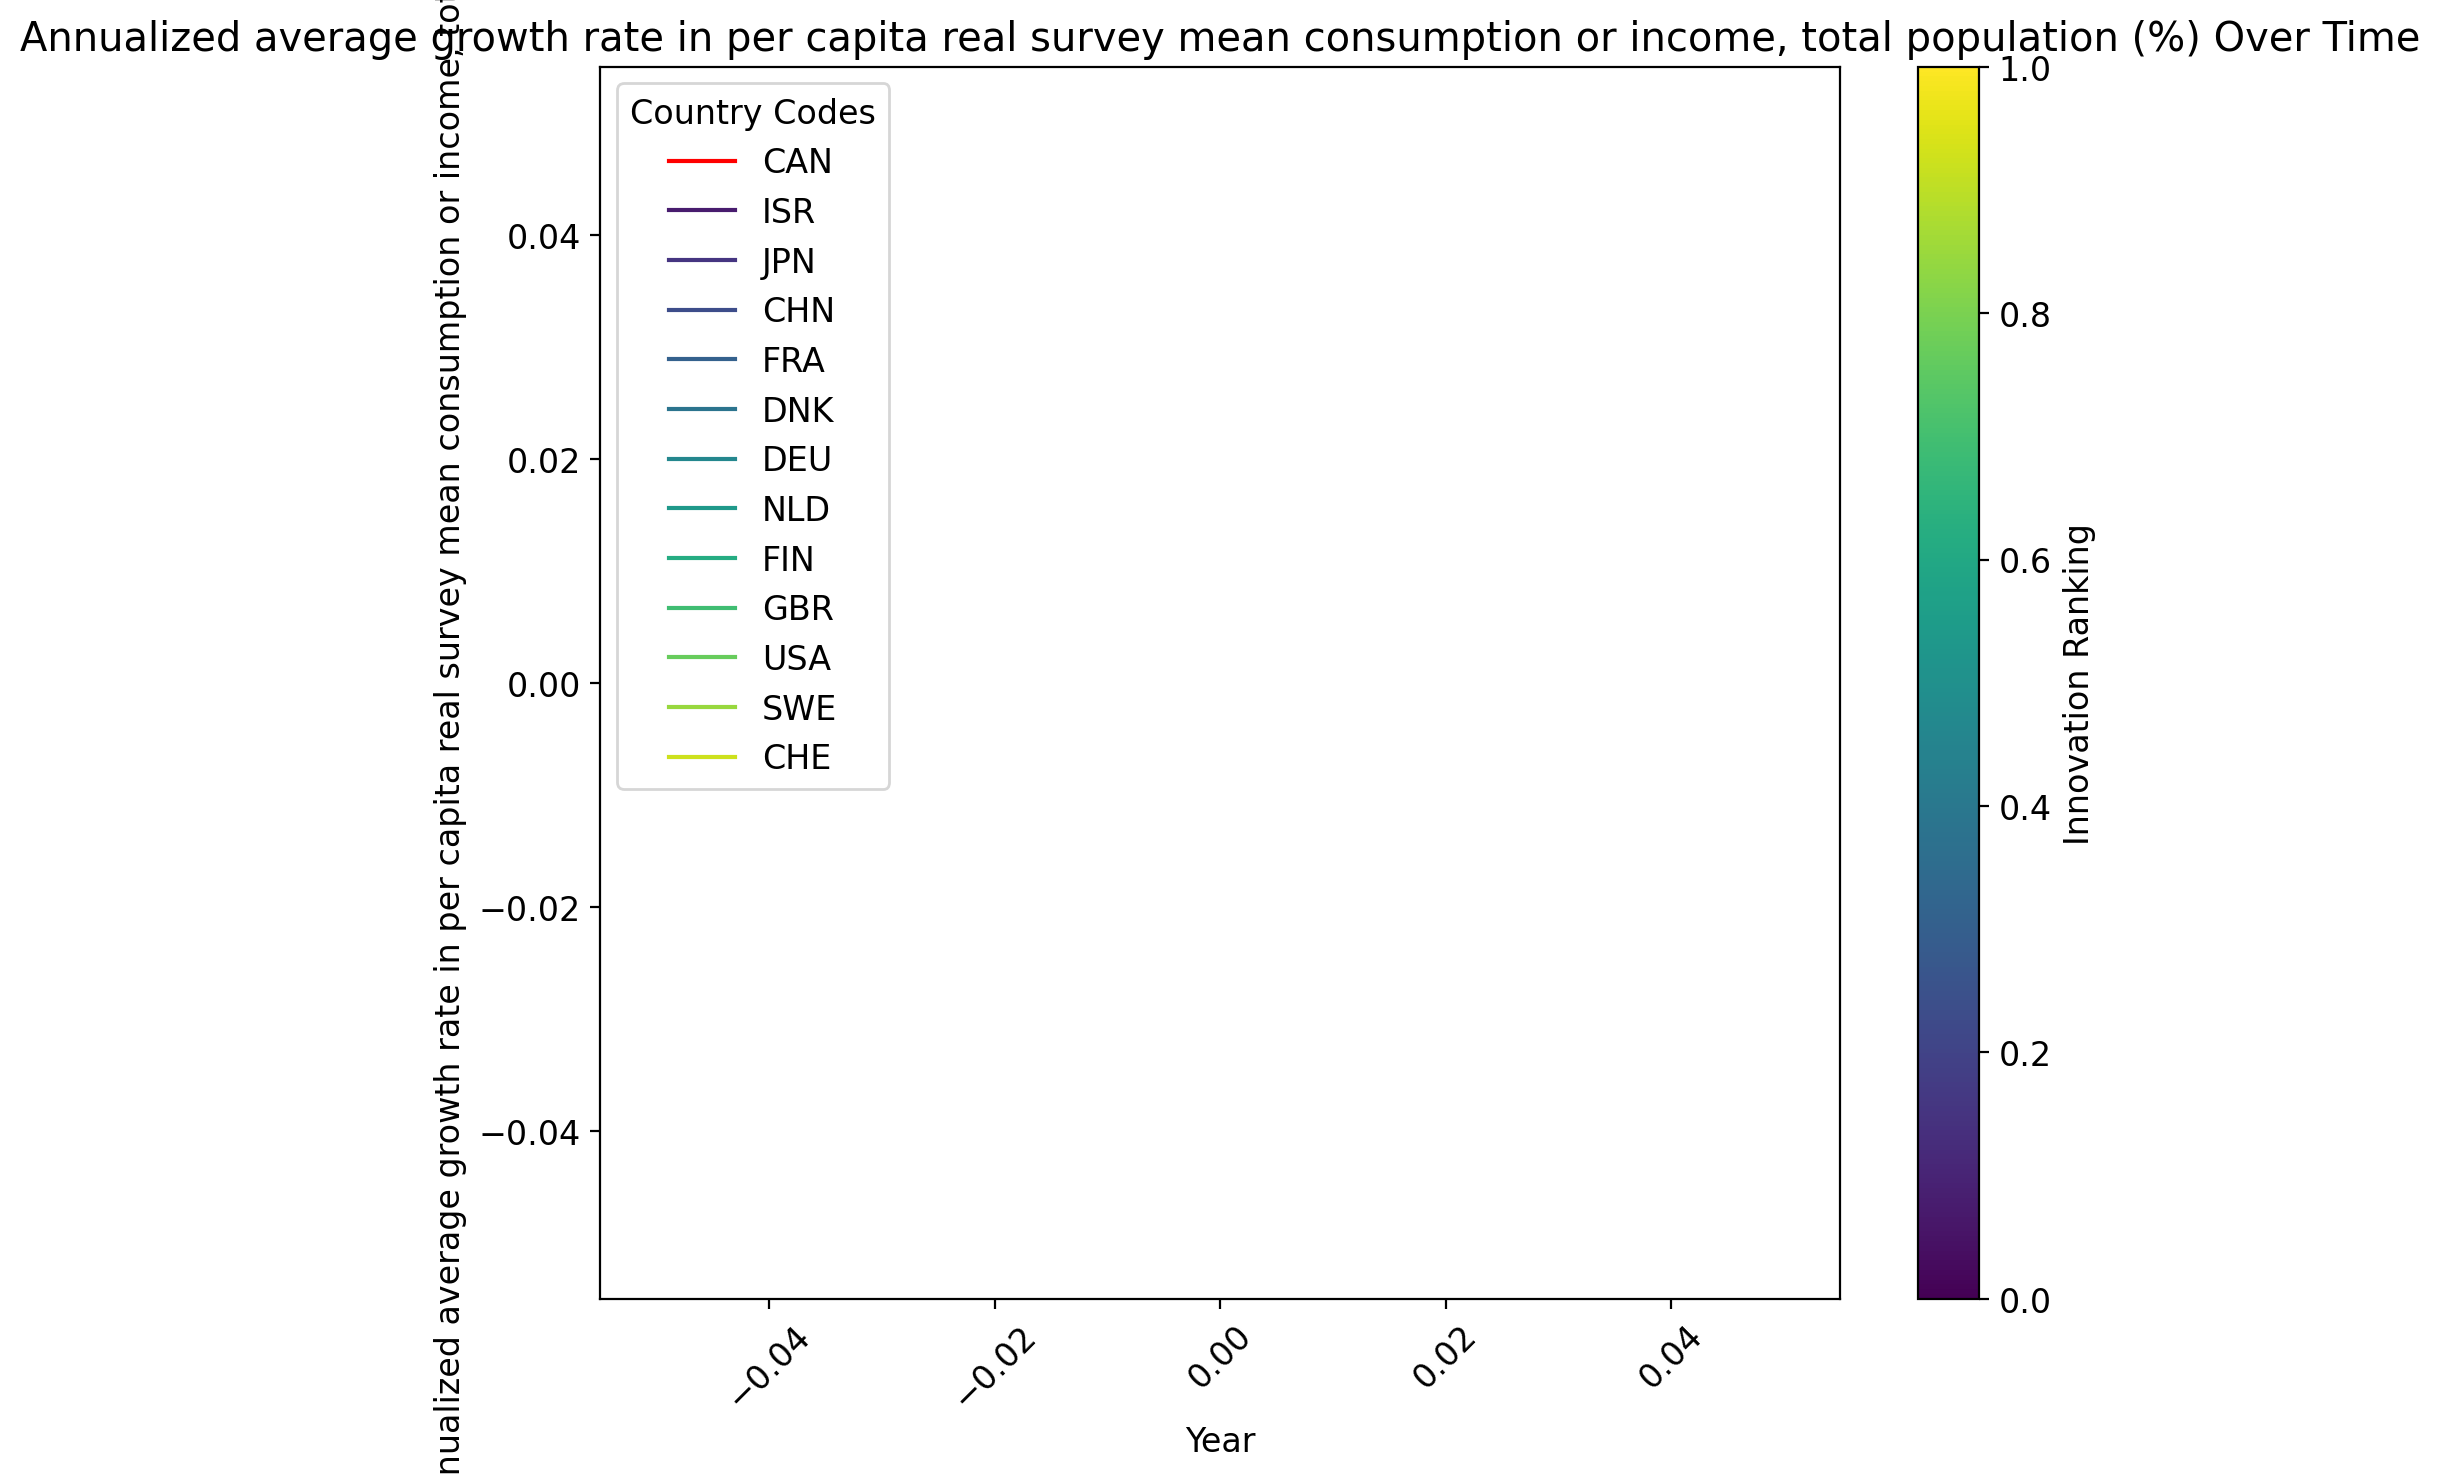

<Figure size 640x480 with 0 Axes>

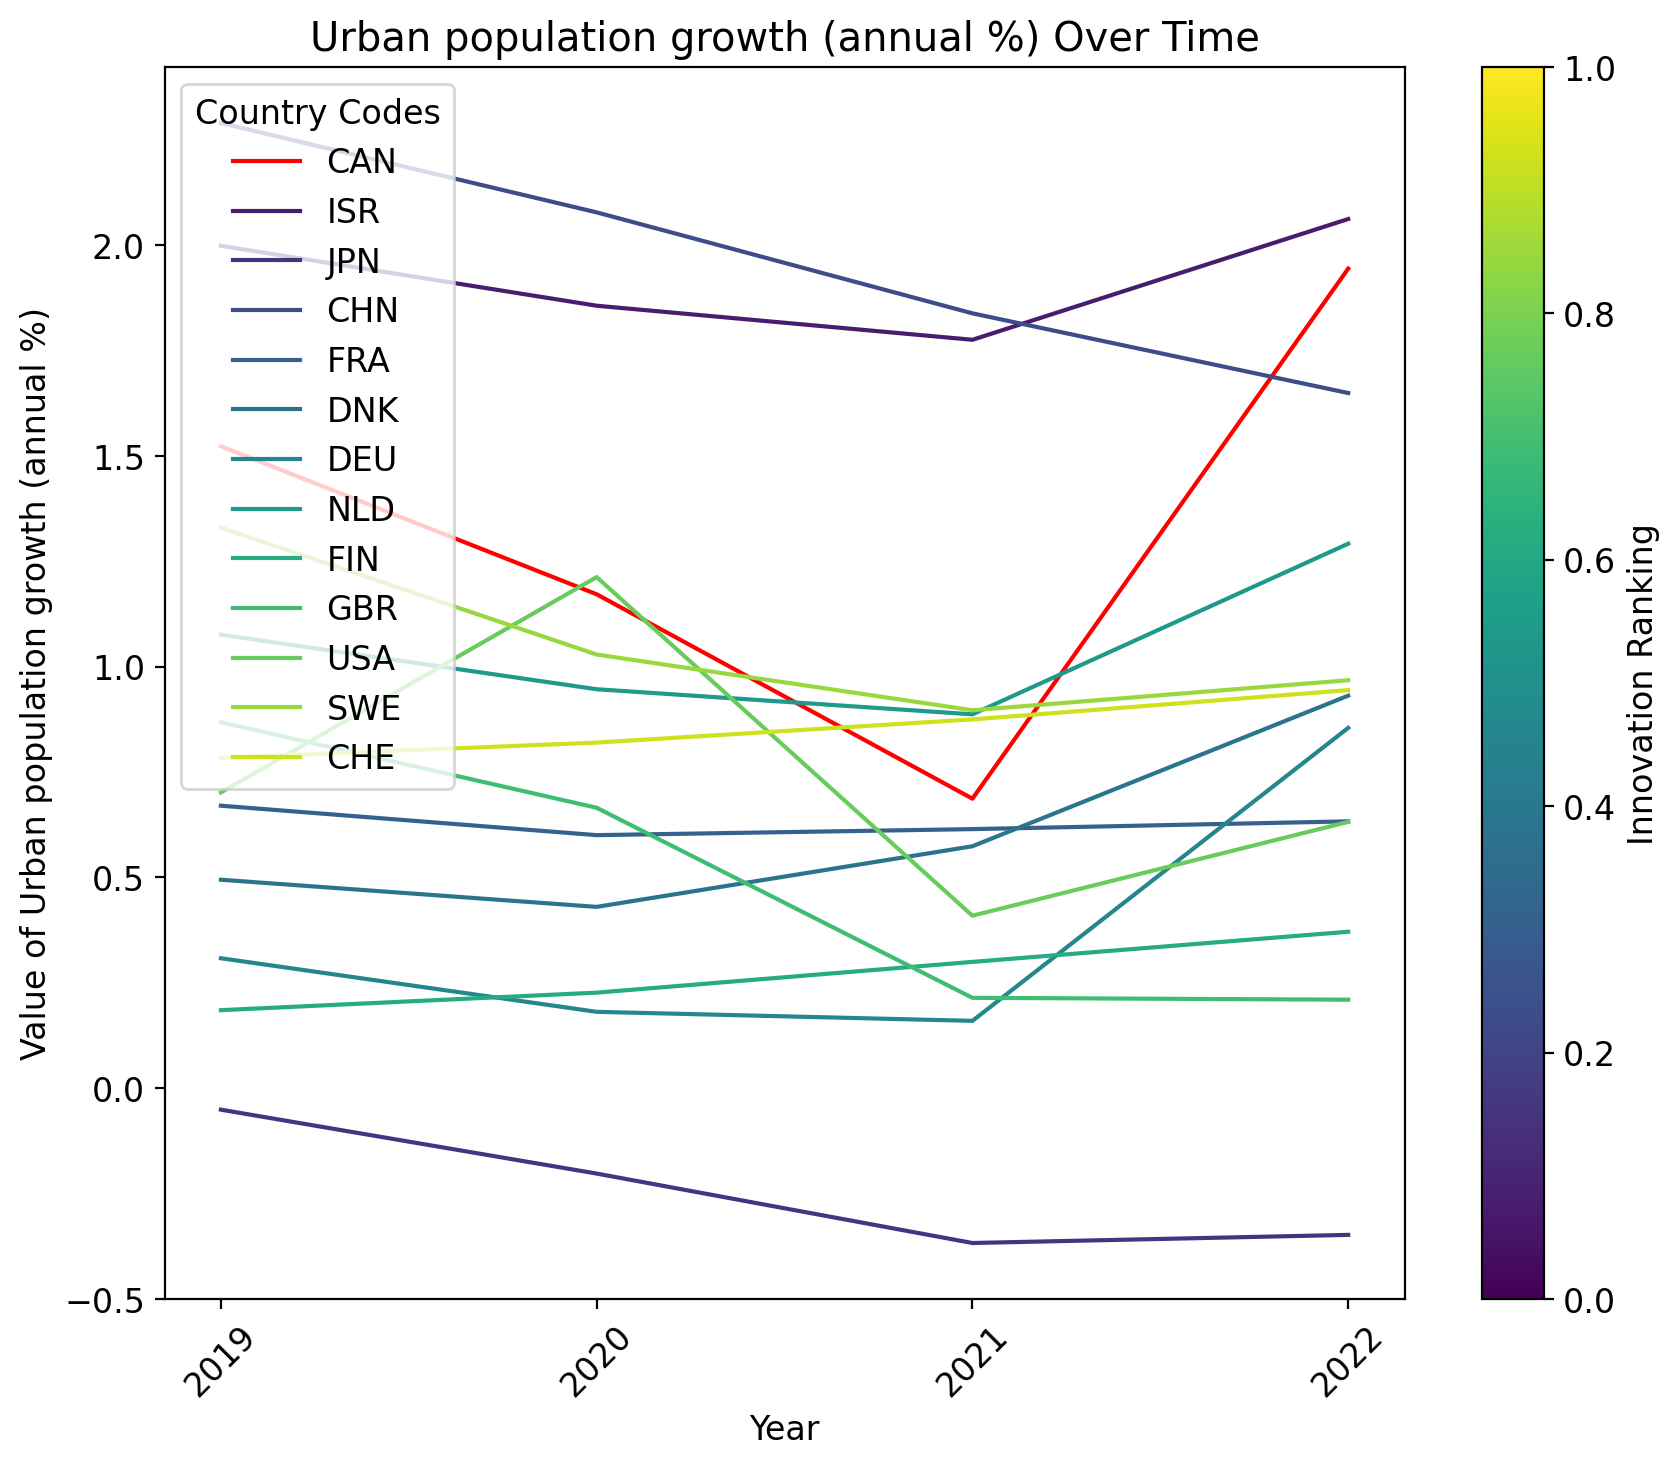

<Figure size 640x480 with 0 Axes>

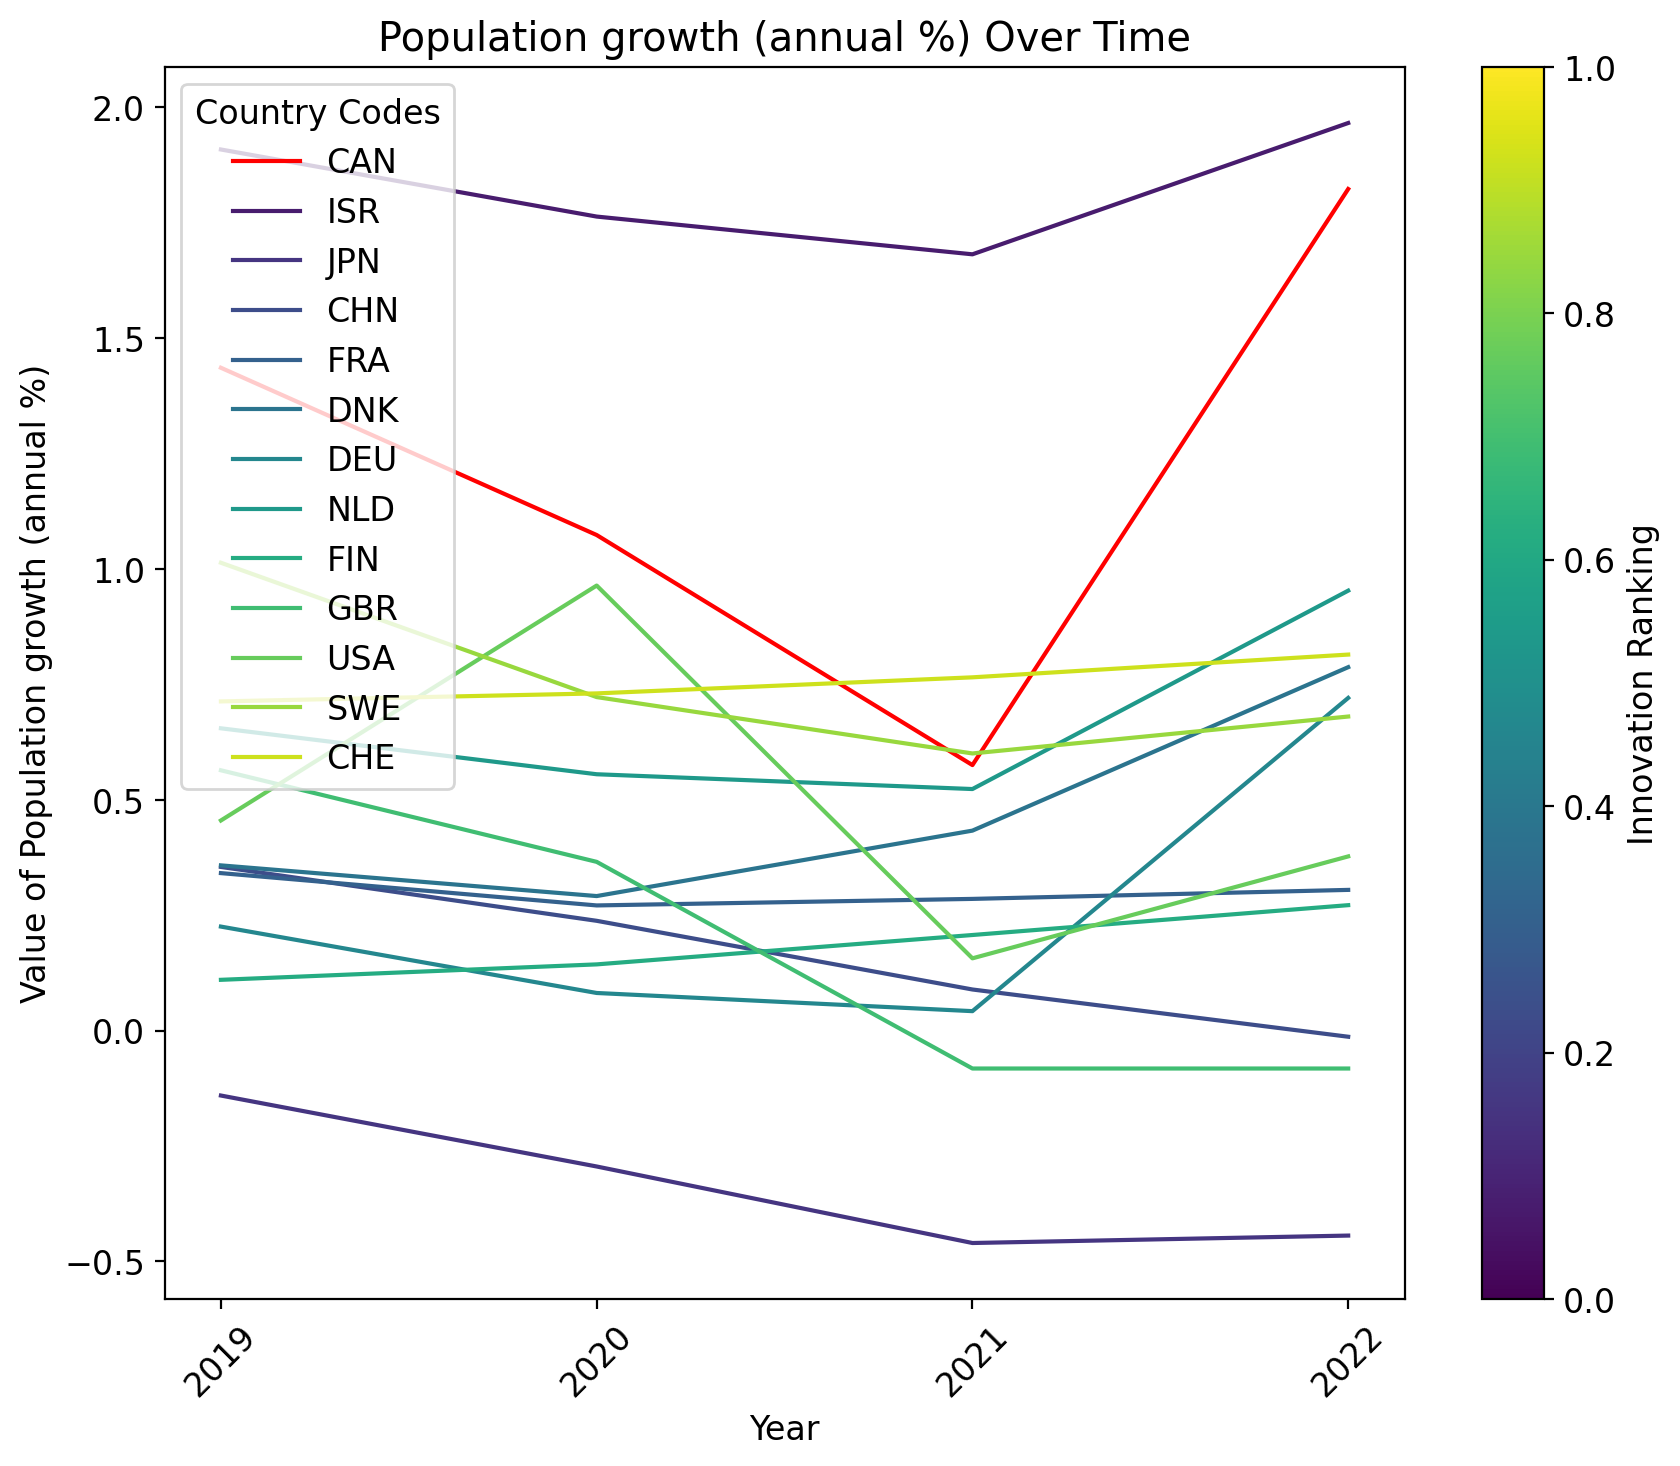

<Figure size 640x480 with 0 Axes>

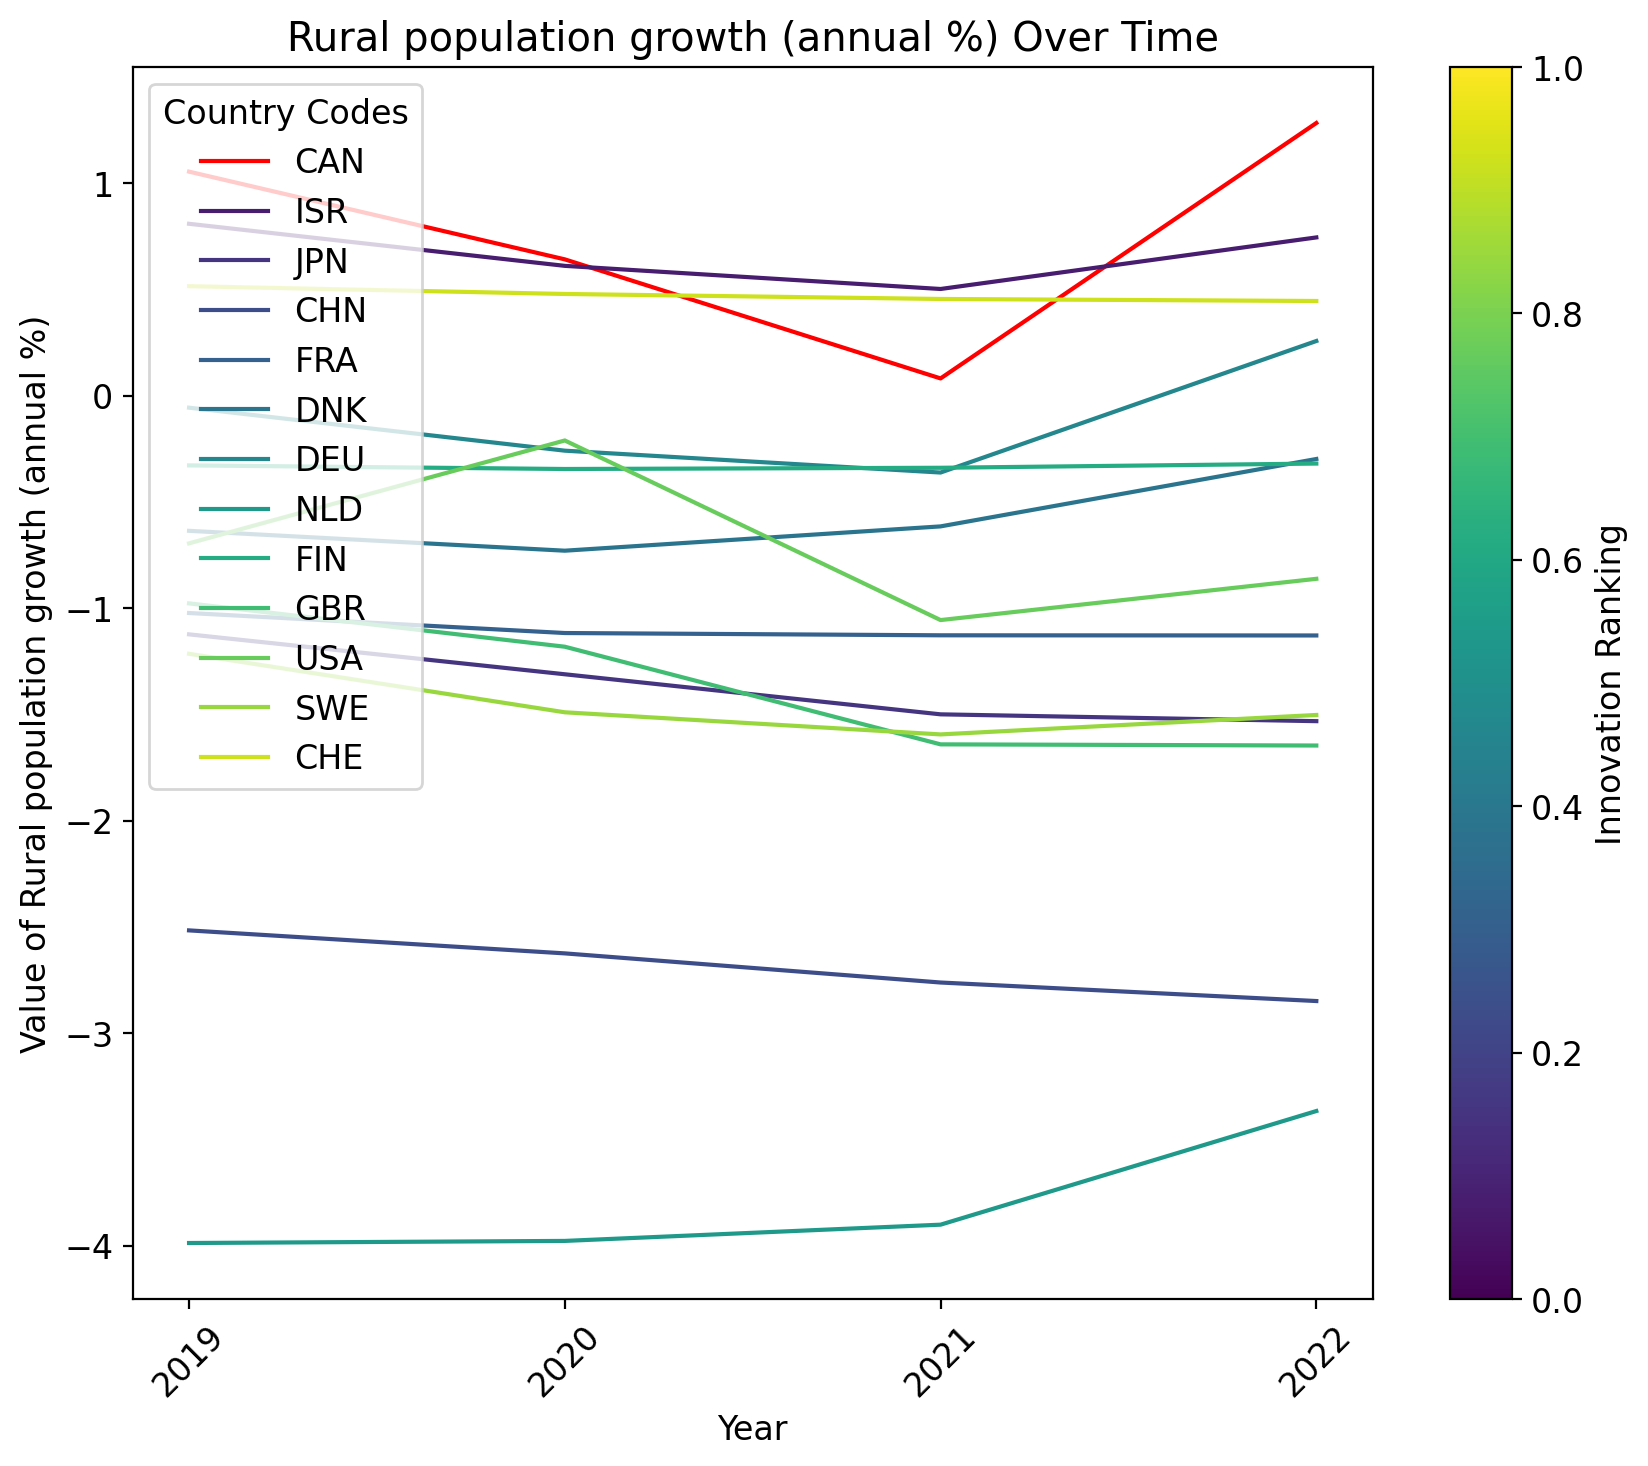

<Figure size 640x480 with 0 Axes>

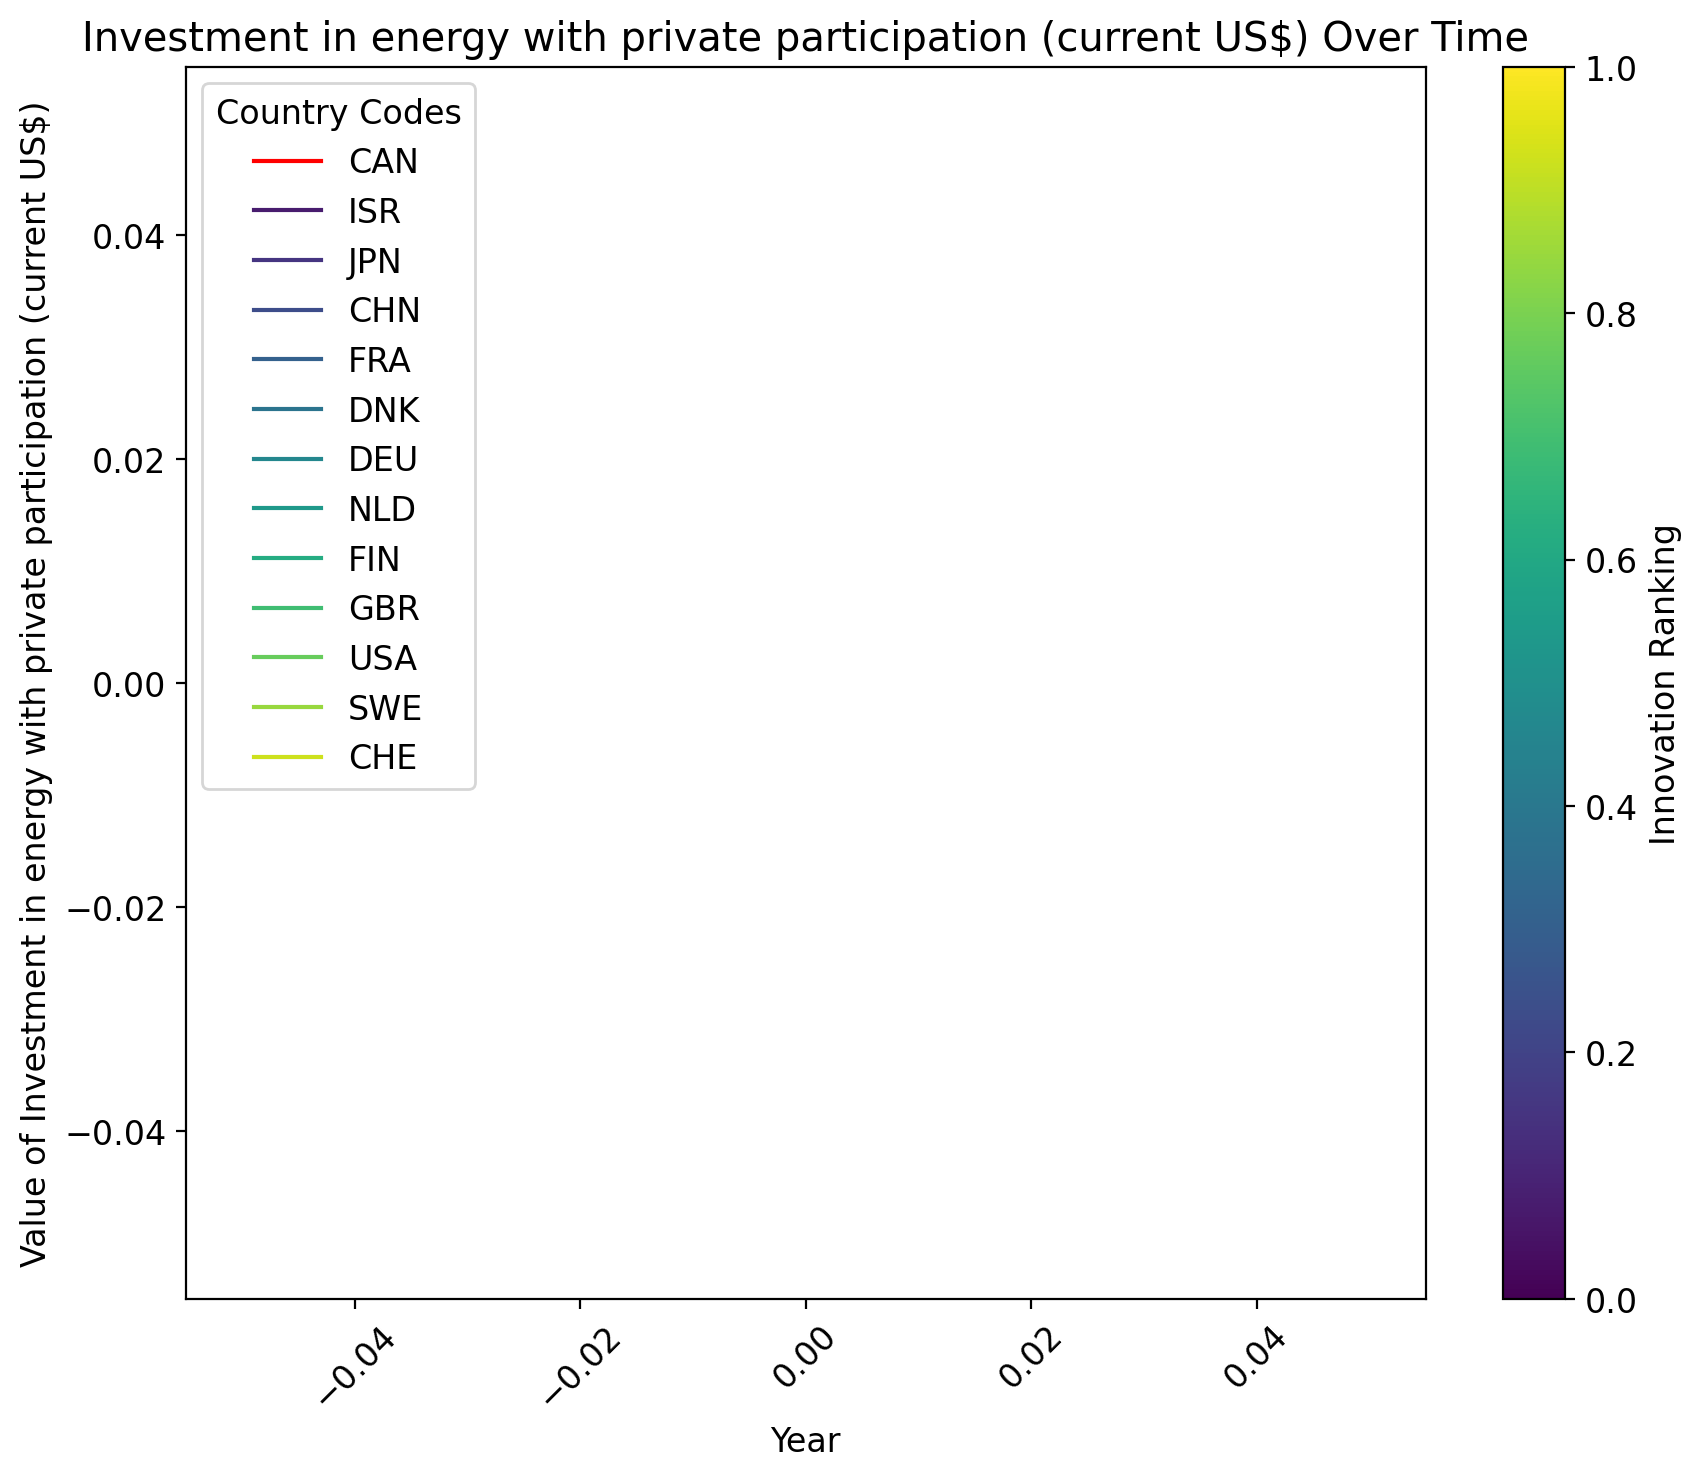

<Figure size 640x480 with 0 Axes>

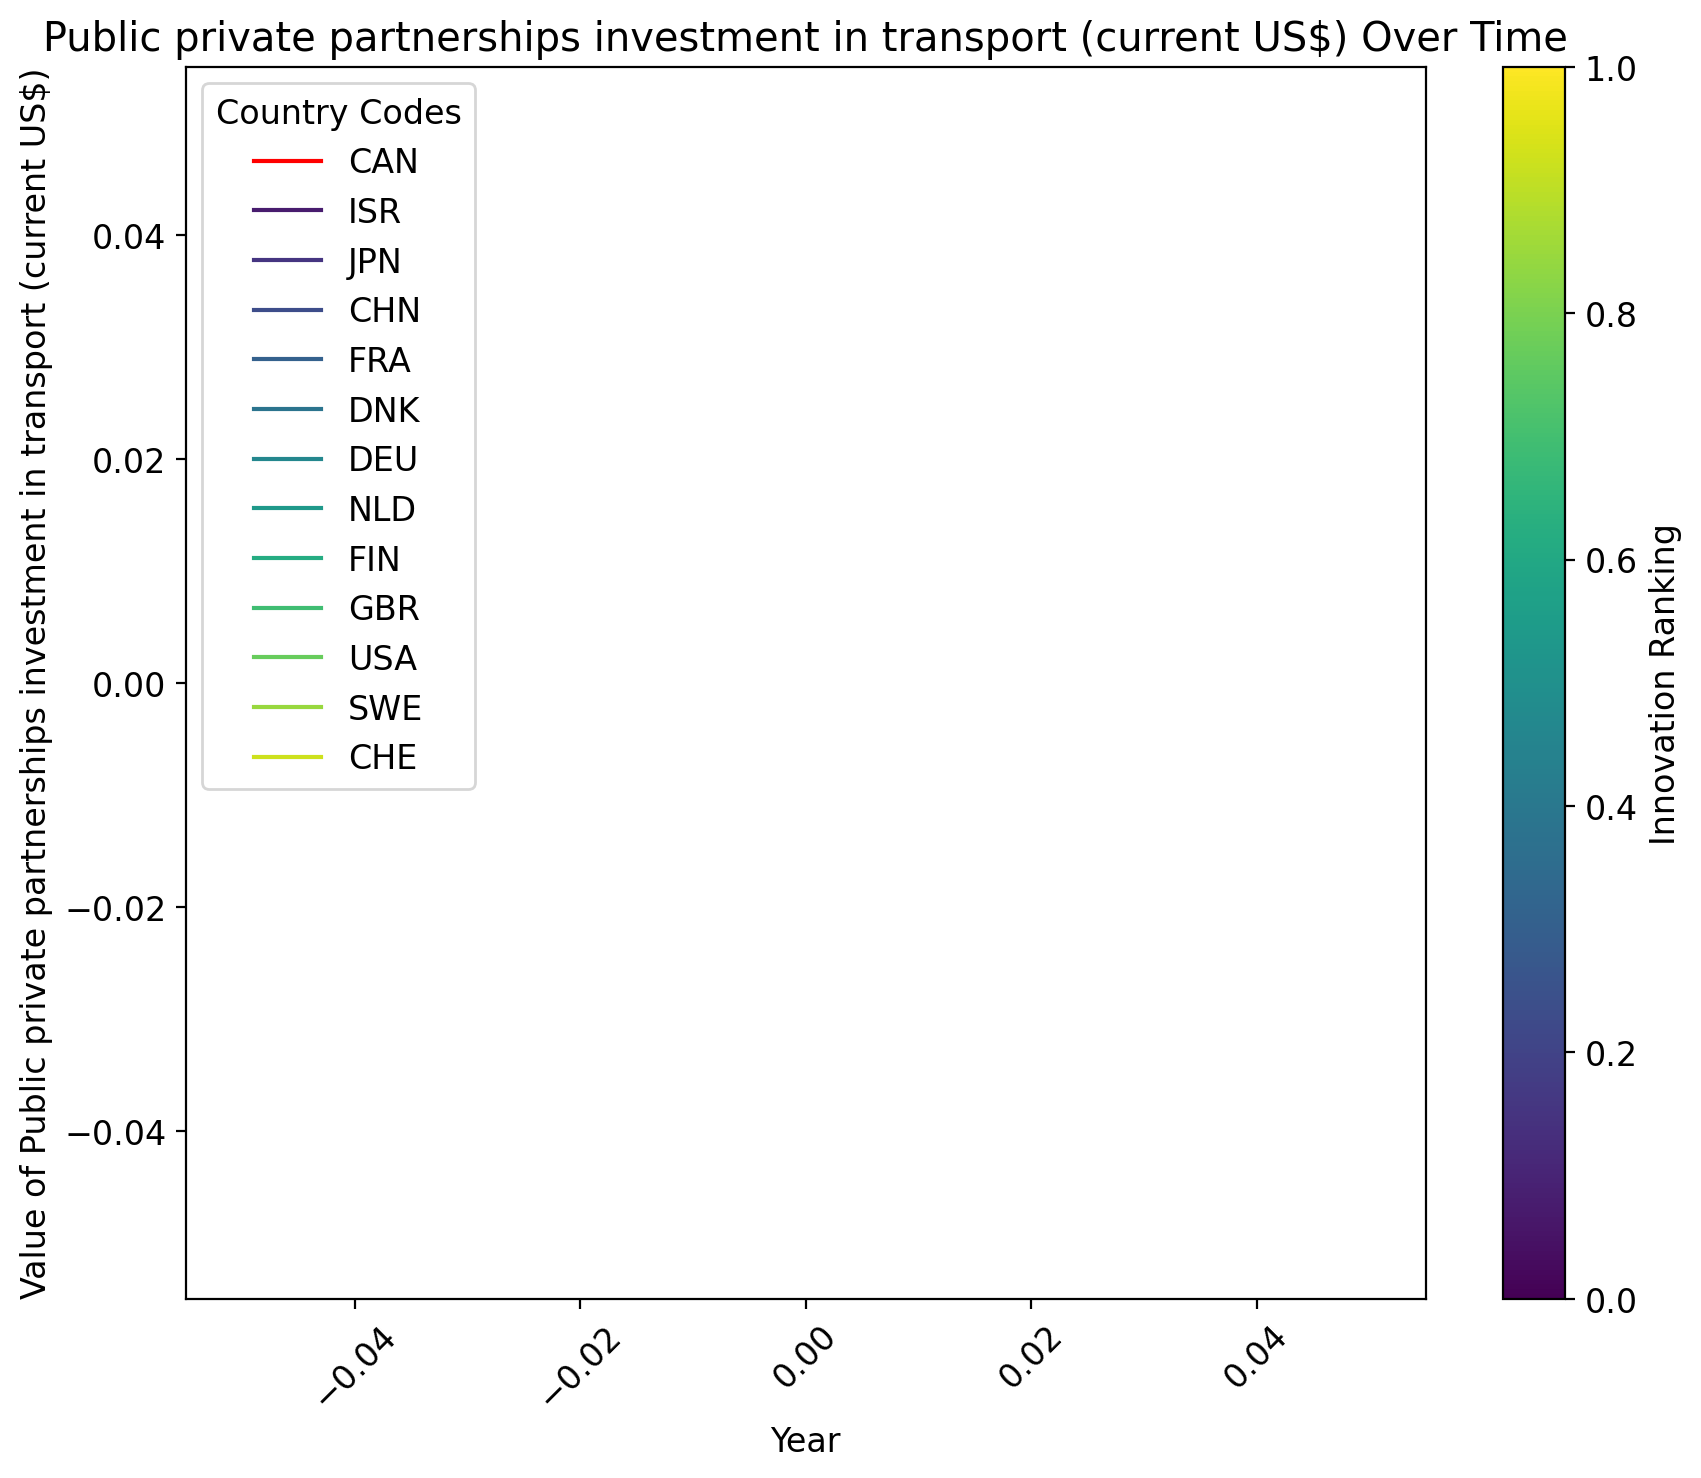

<Figure size 640x480 with 0 Axes>

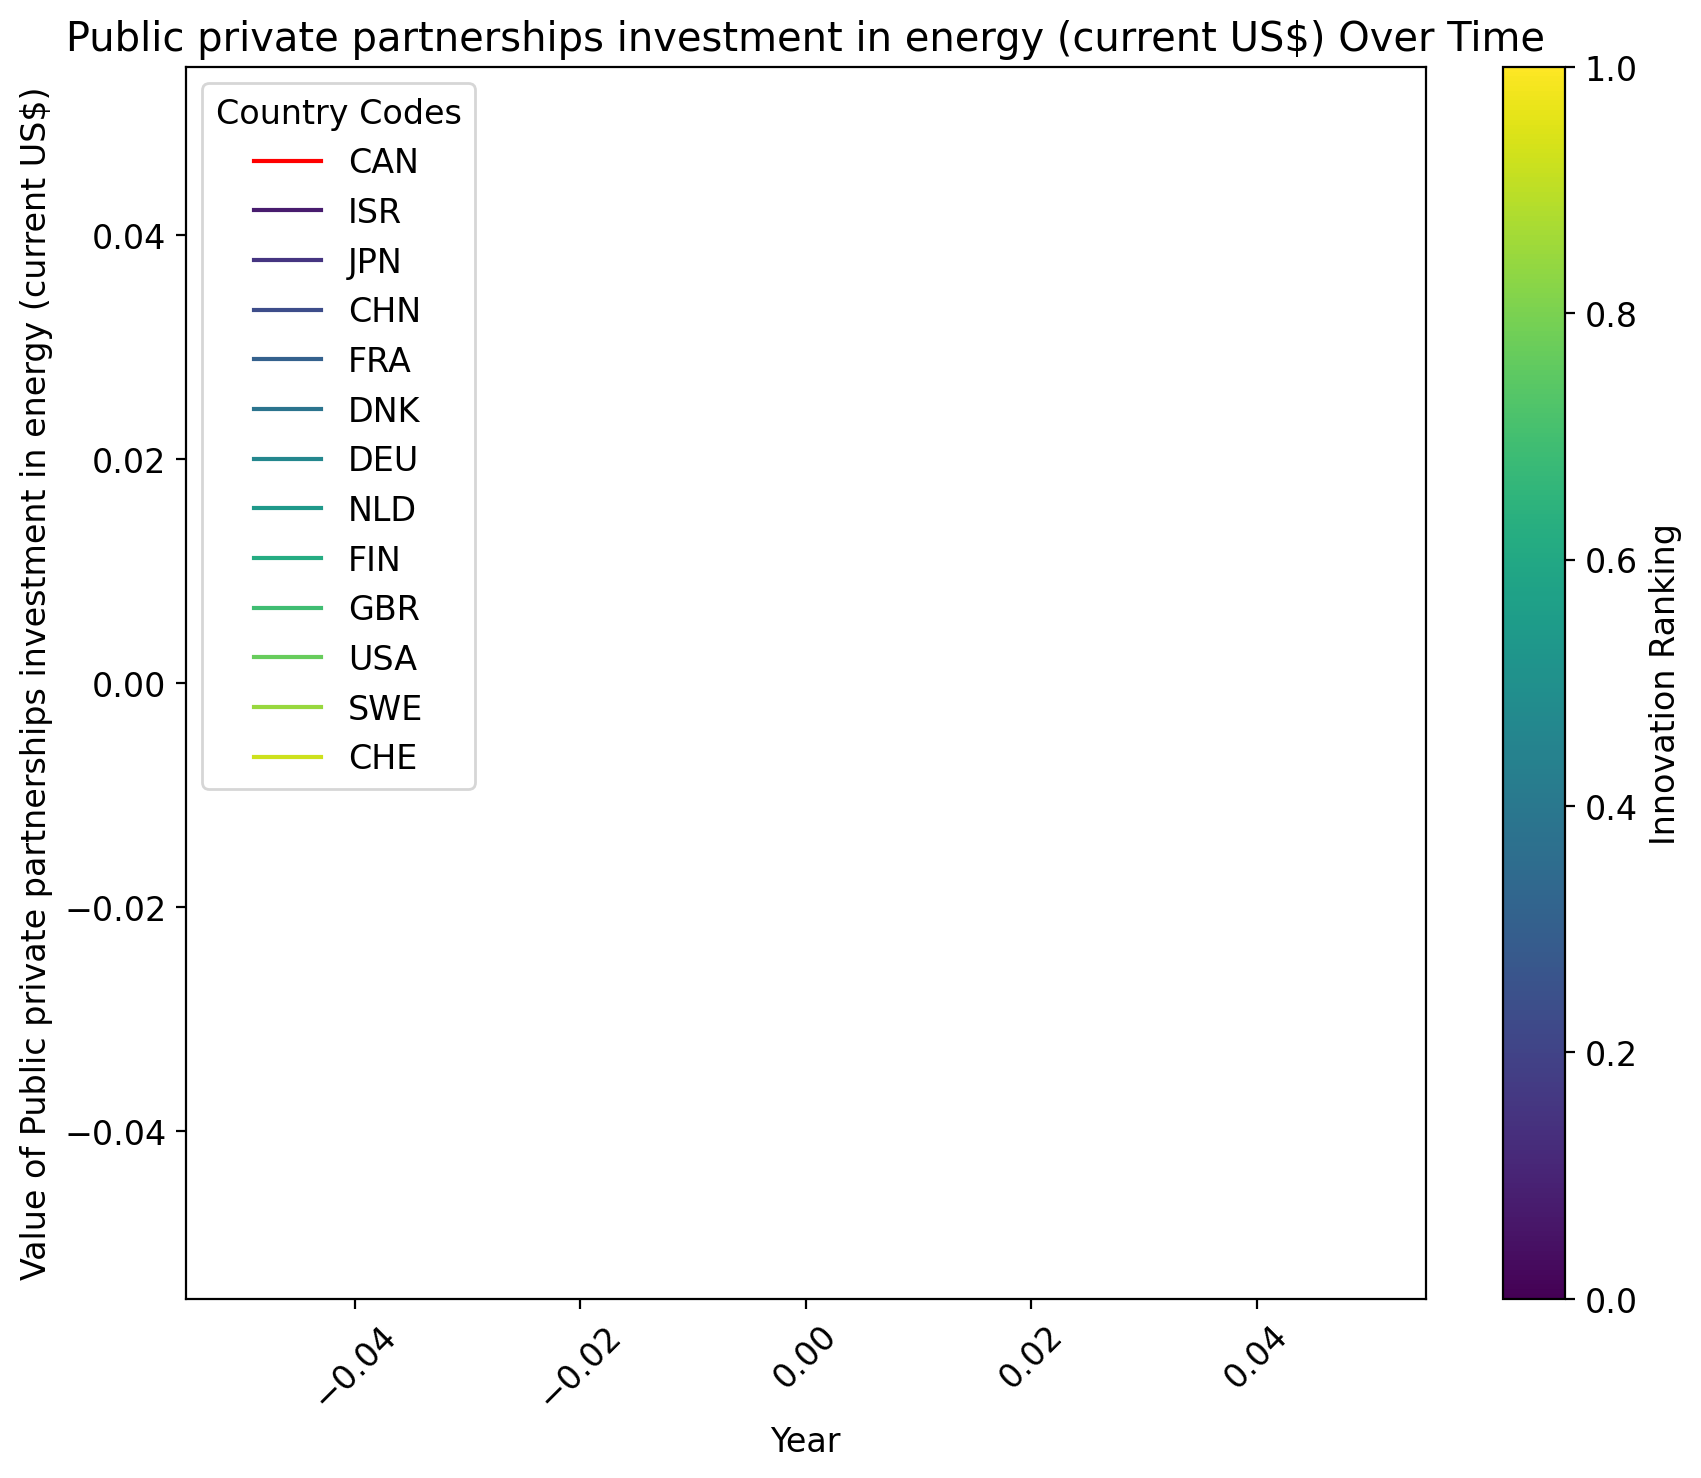

<Figure size 640x480 with 0 Axes>

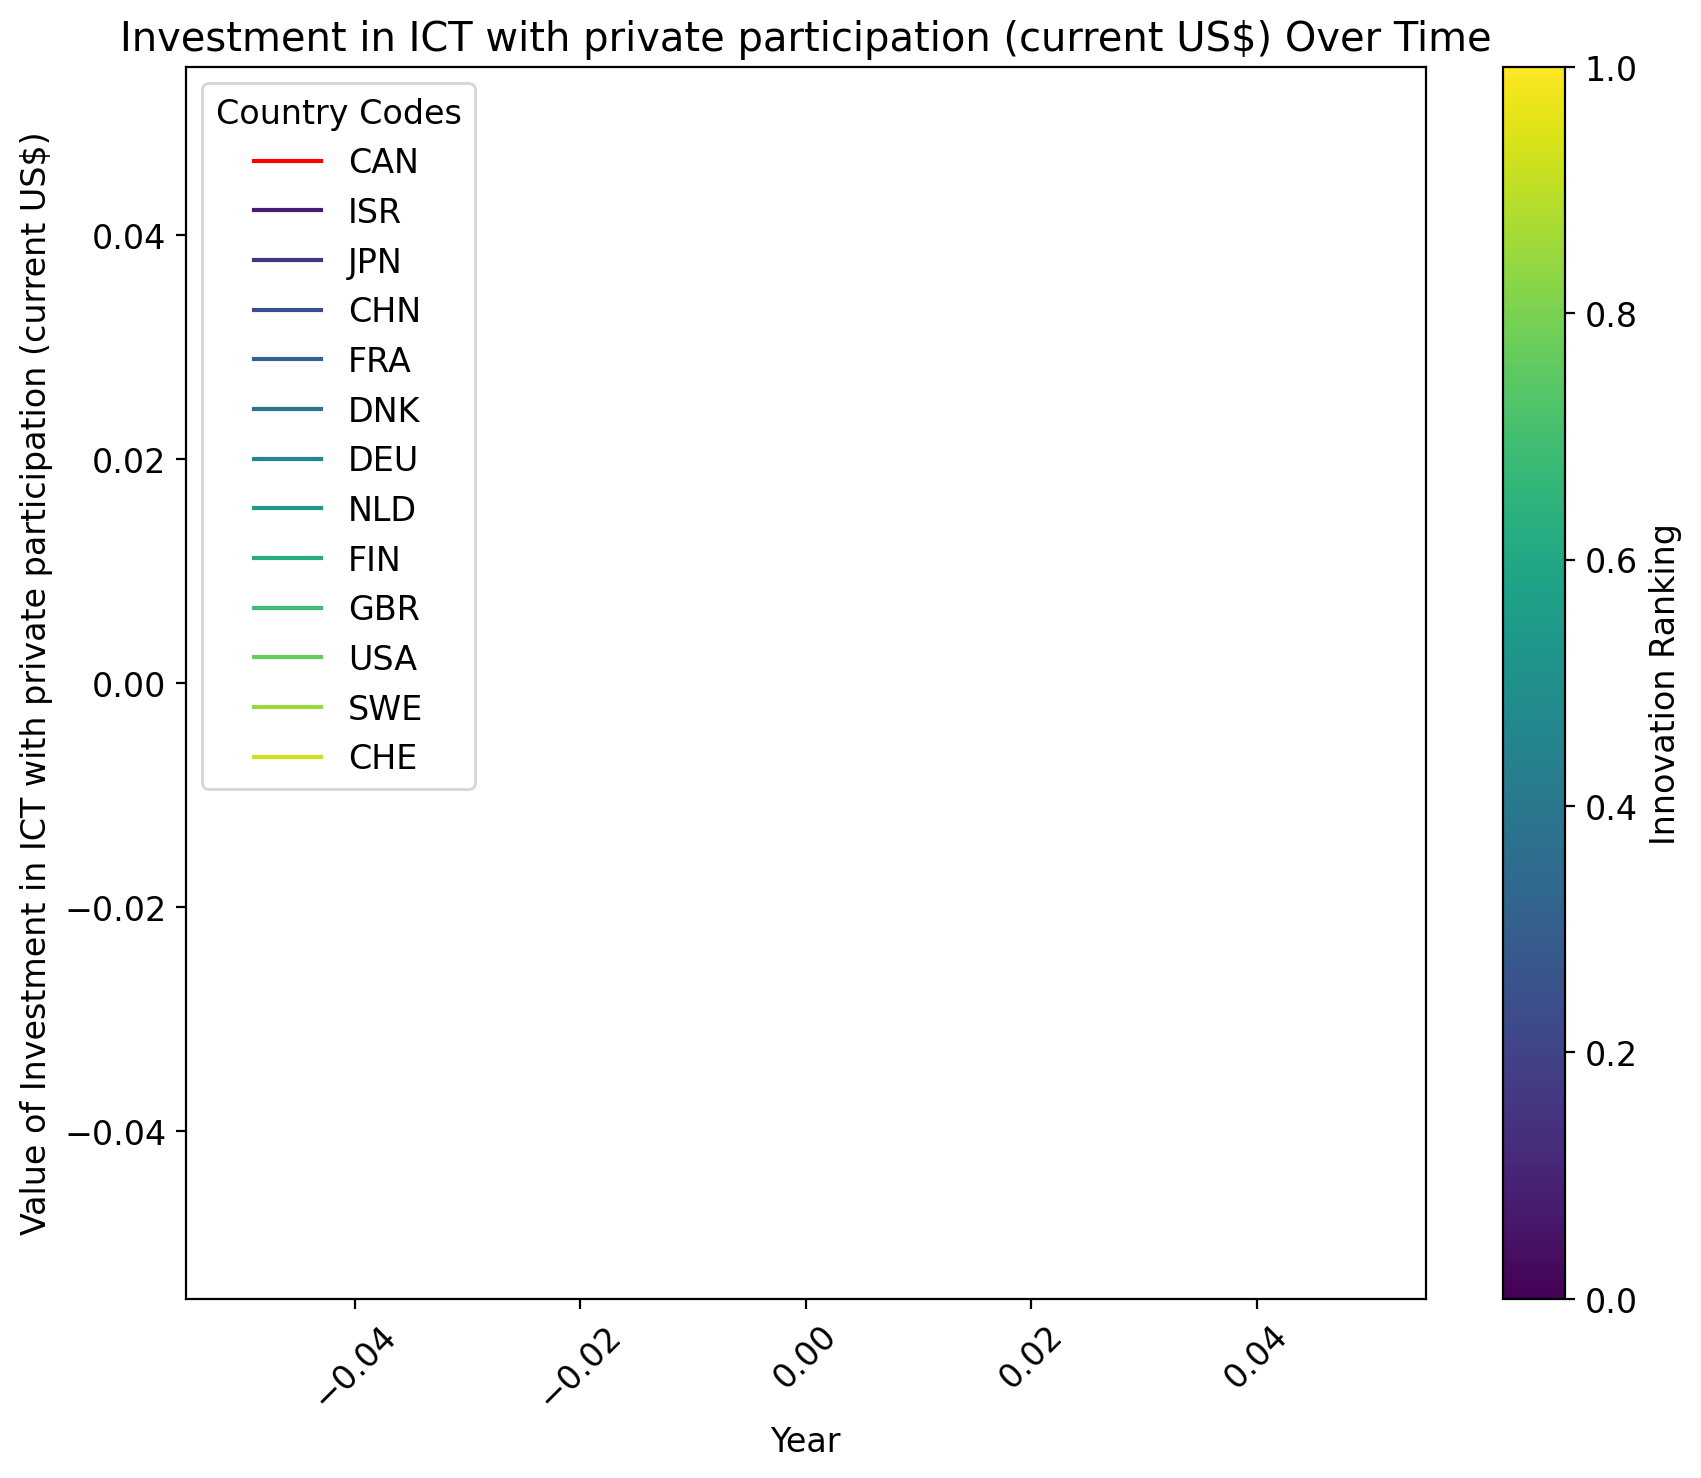

<Figure size 640x480 with 0 Axes>

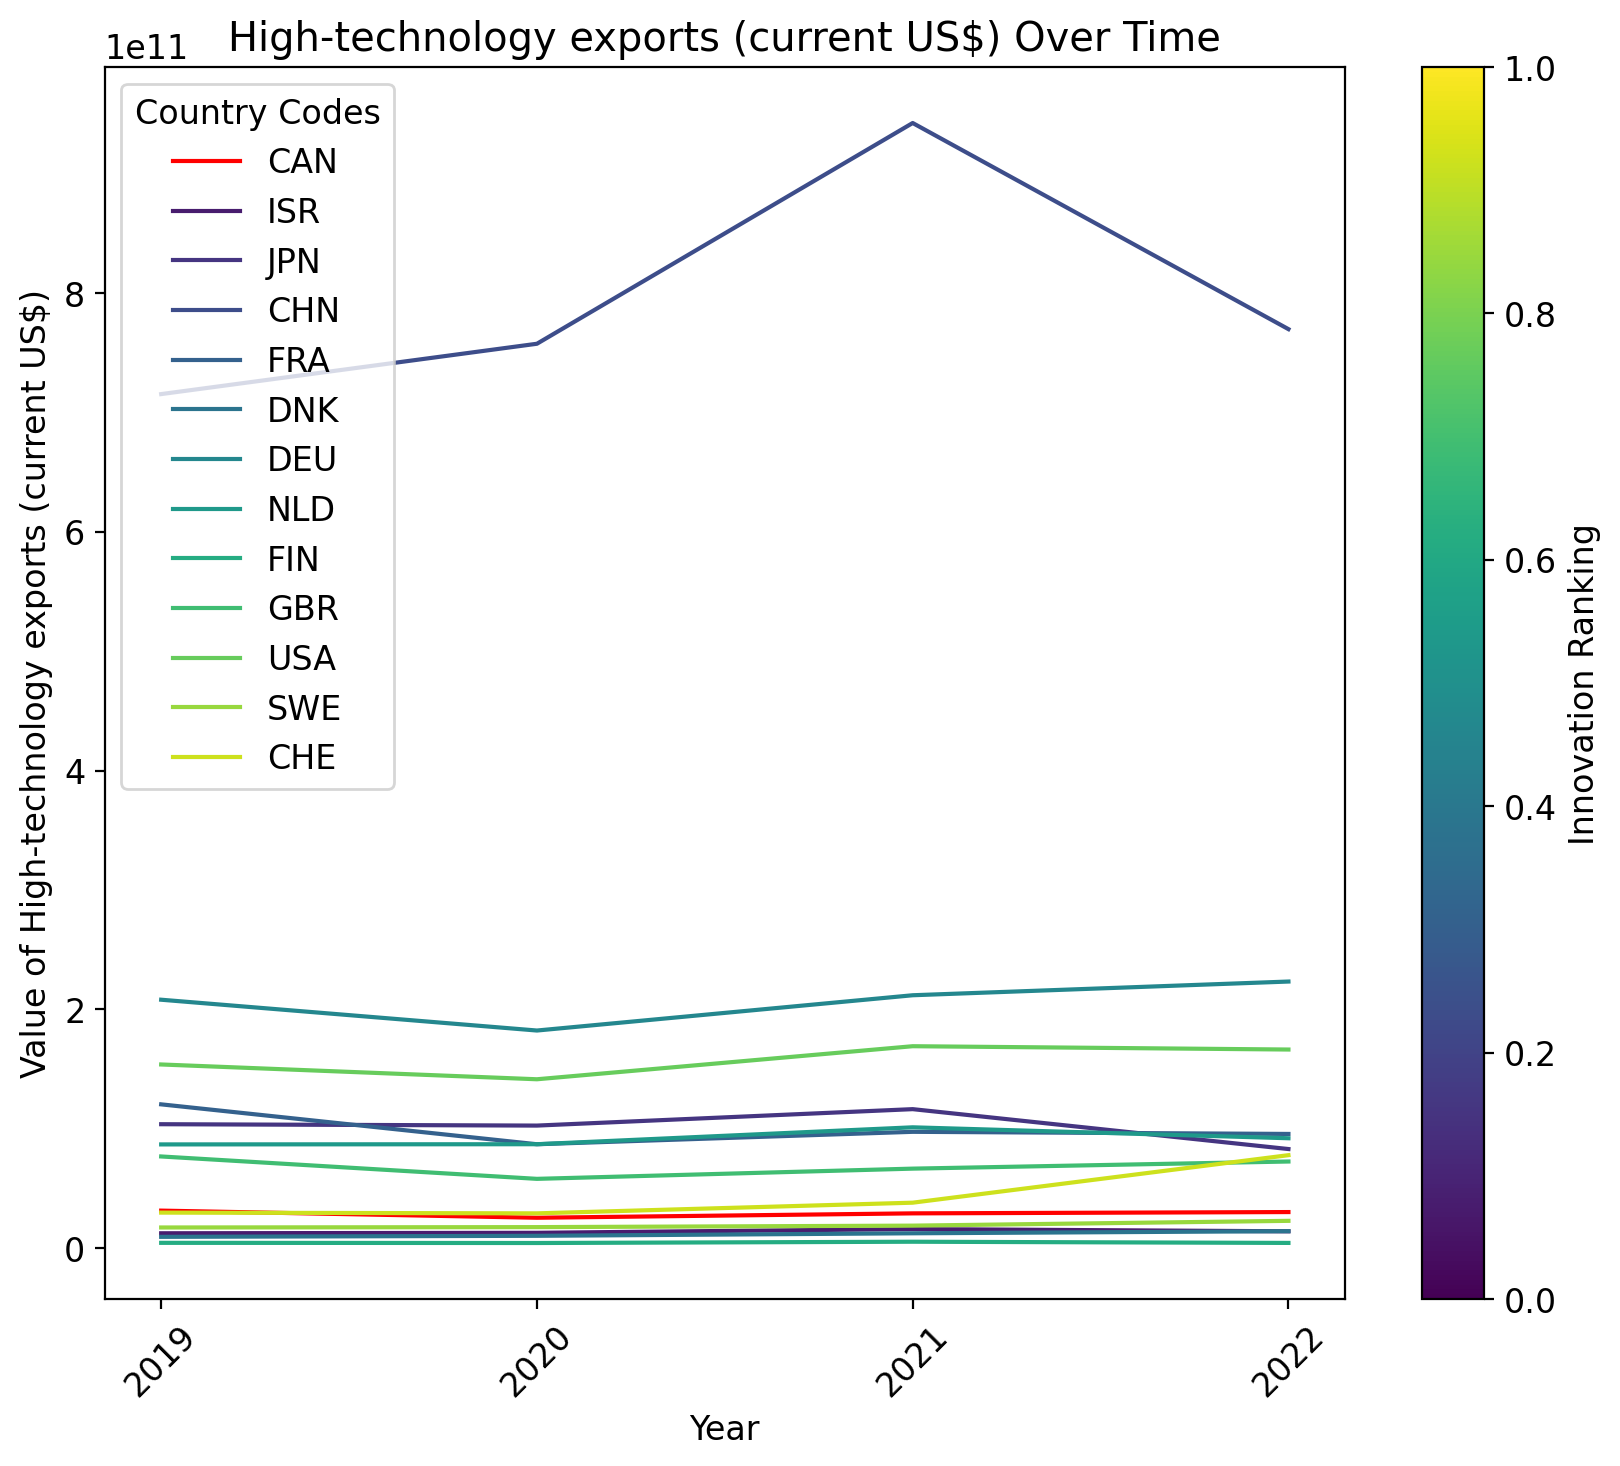

<Figure size 640x480 with 0 Axes>

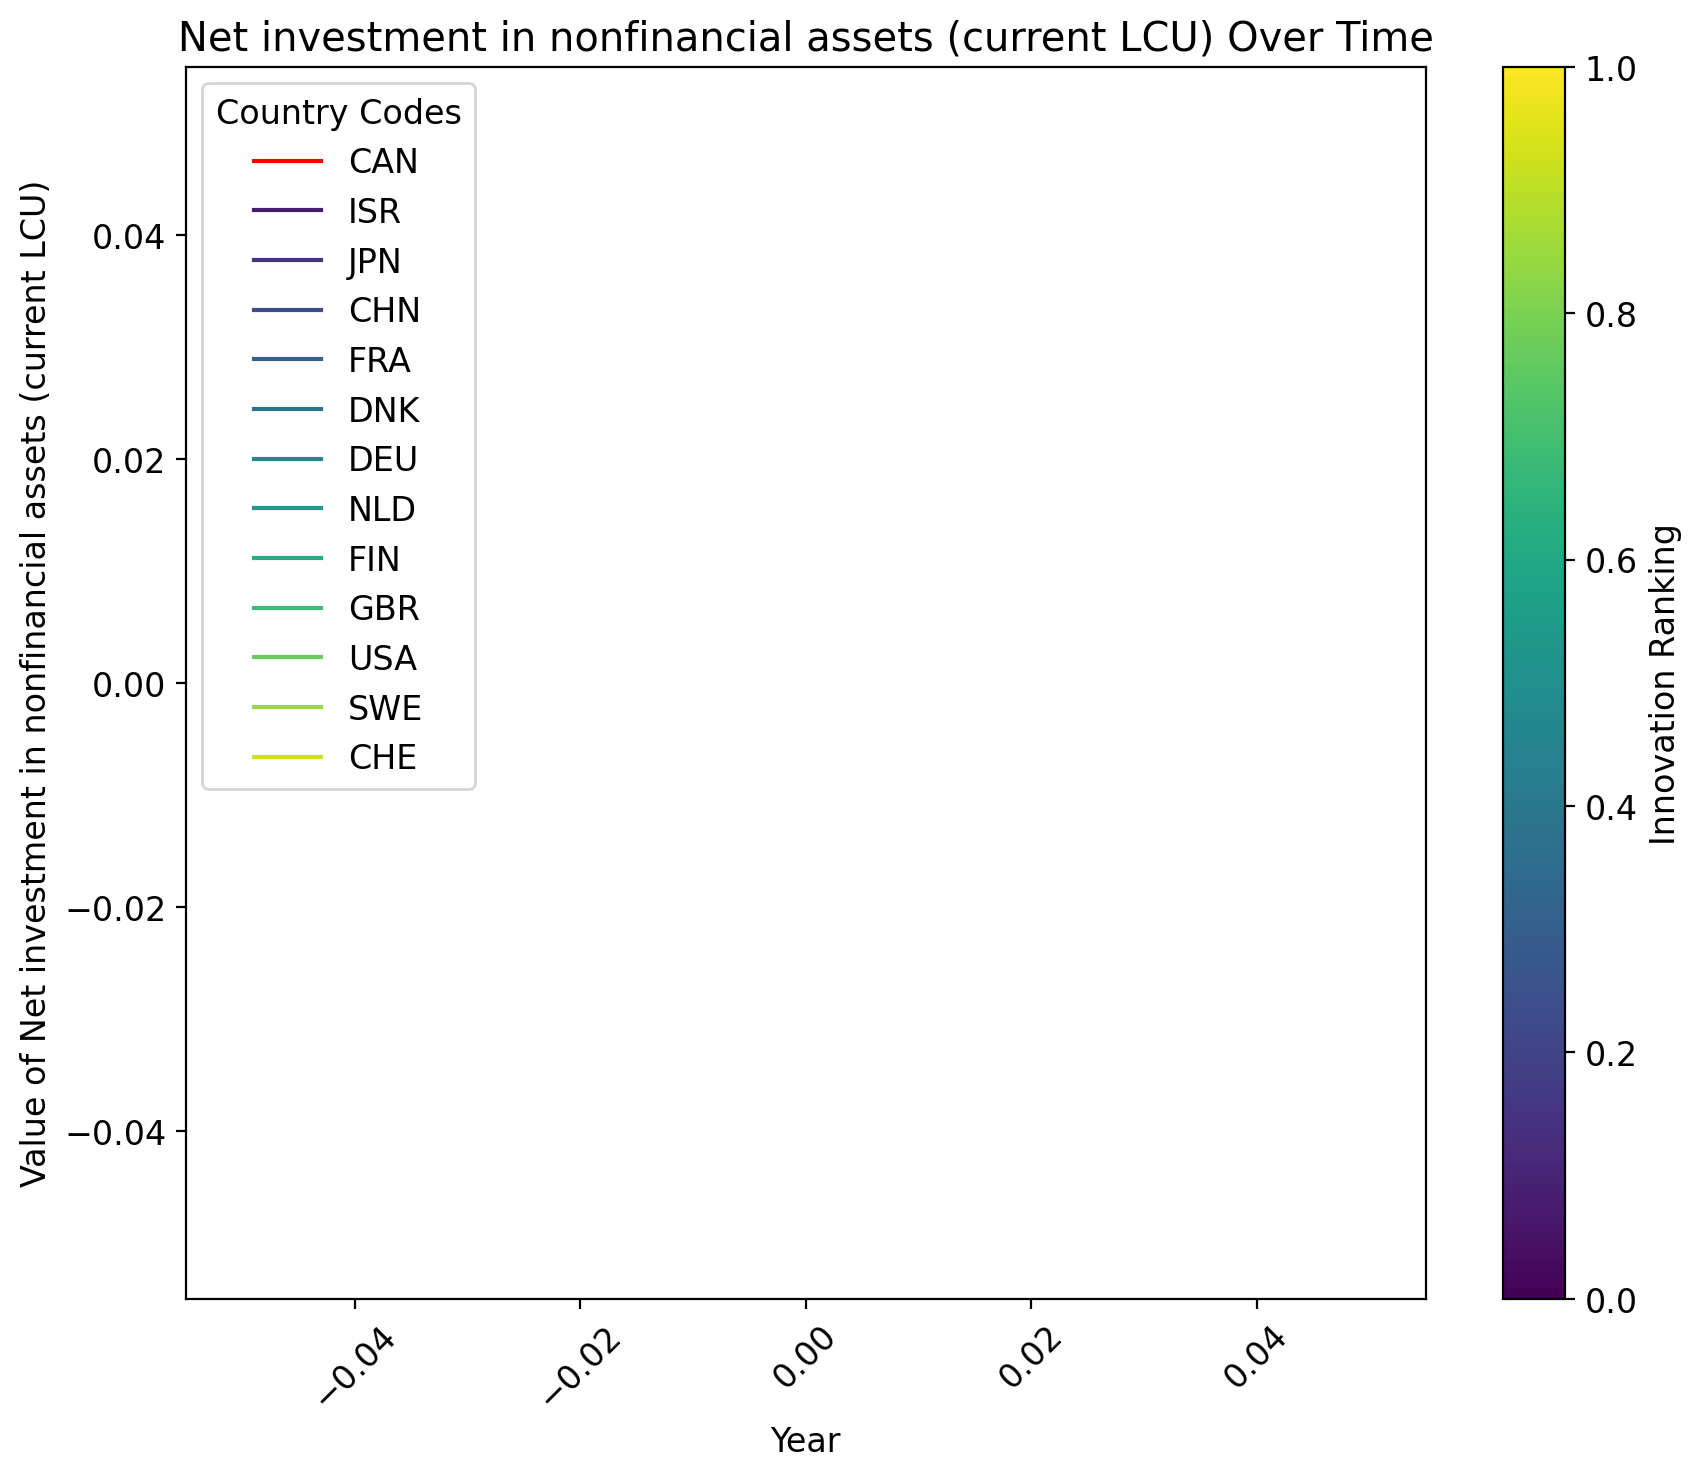

<Figure size 640x480 with 0 Axes>

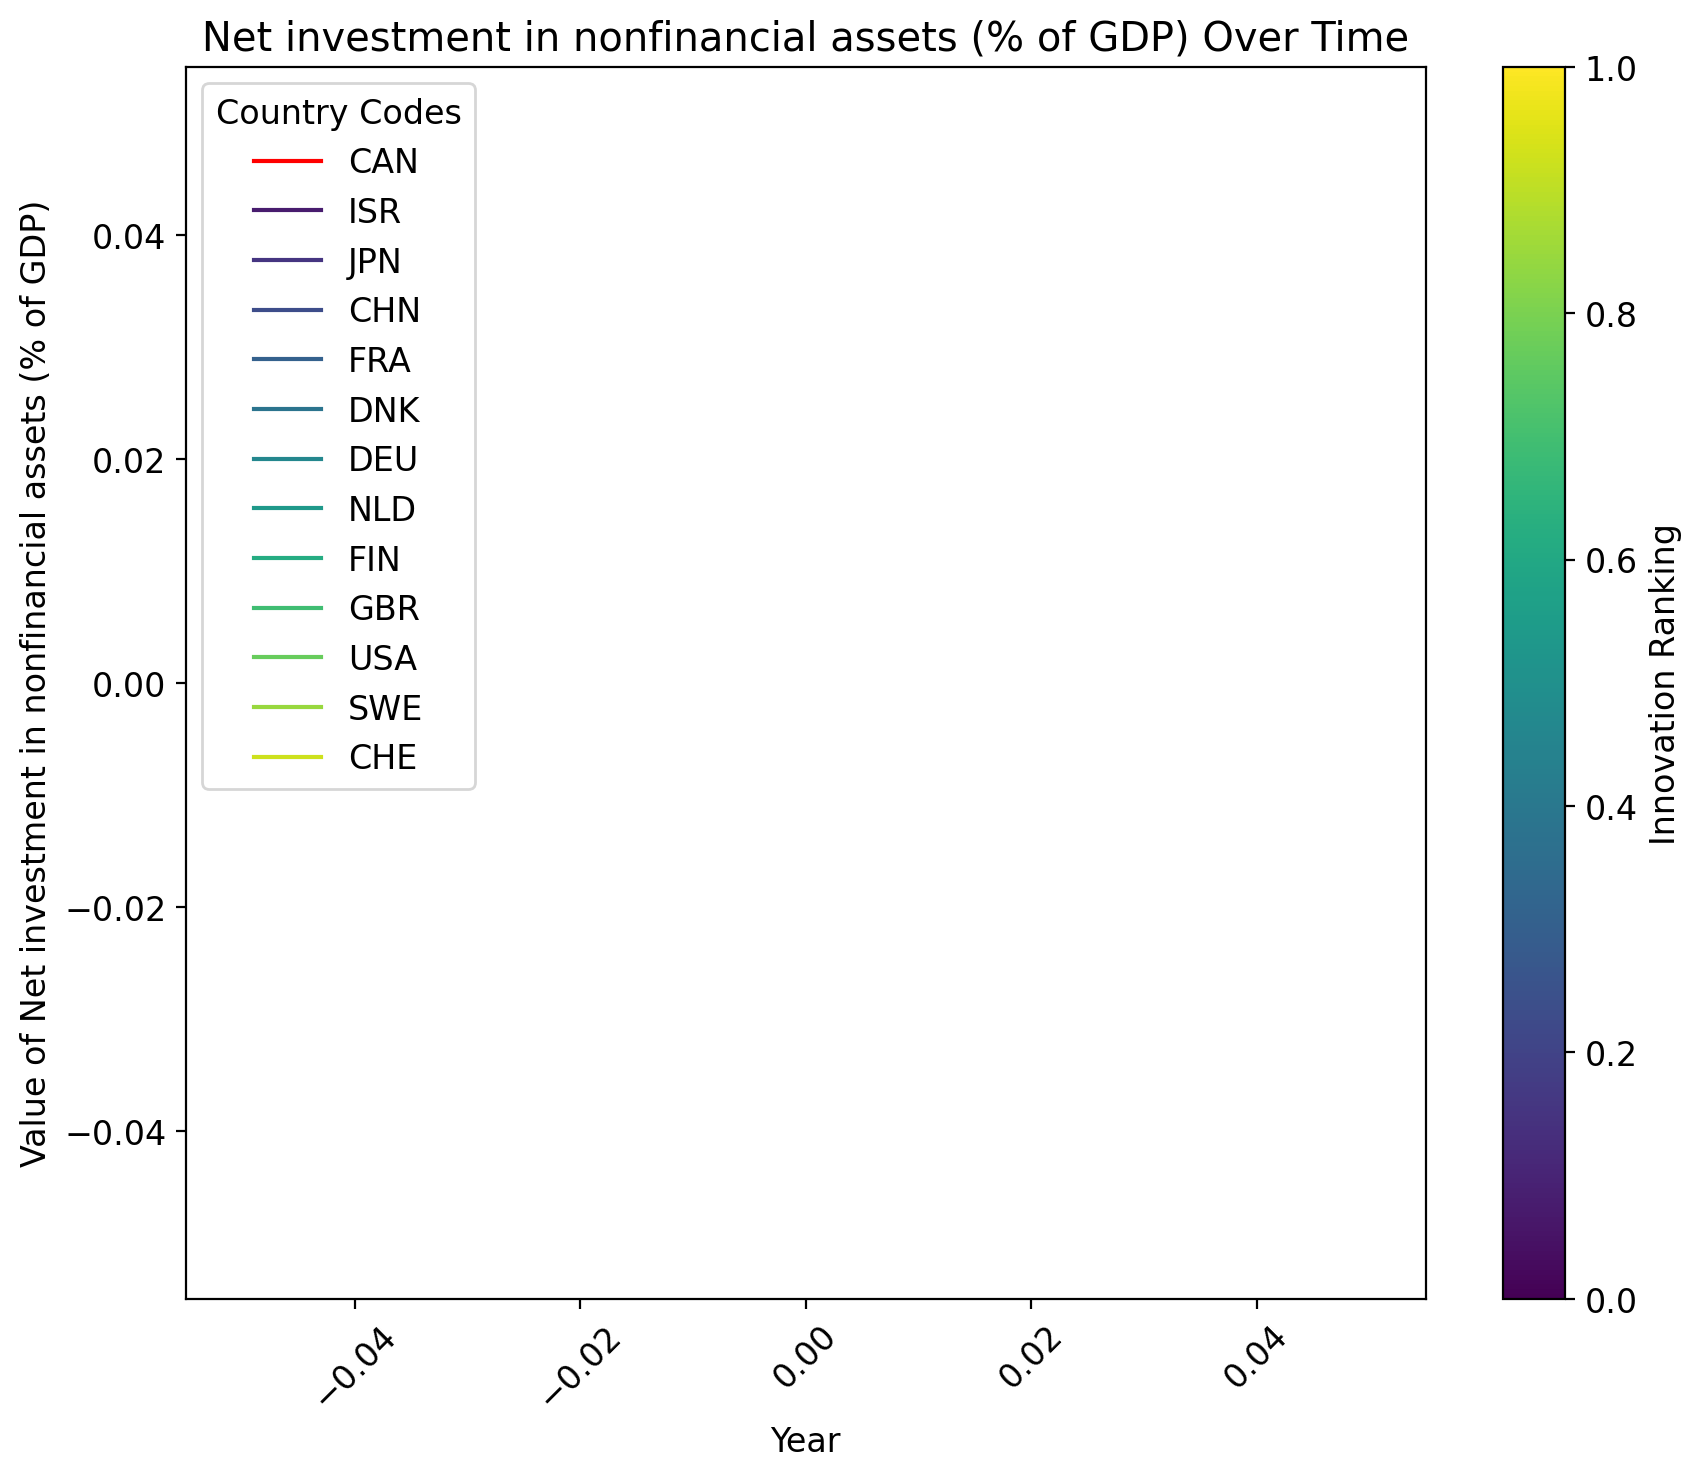

<Figure size 640x480 with 0 Axes>

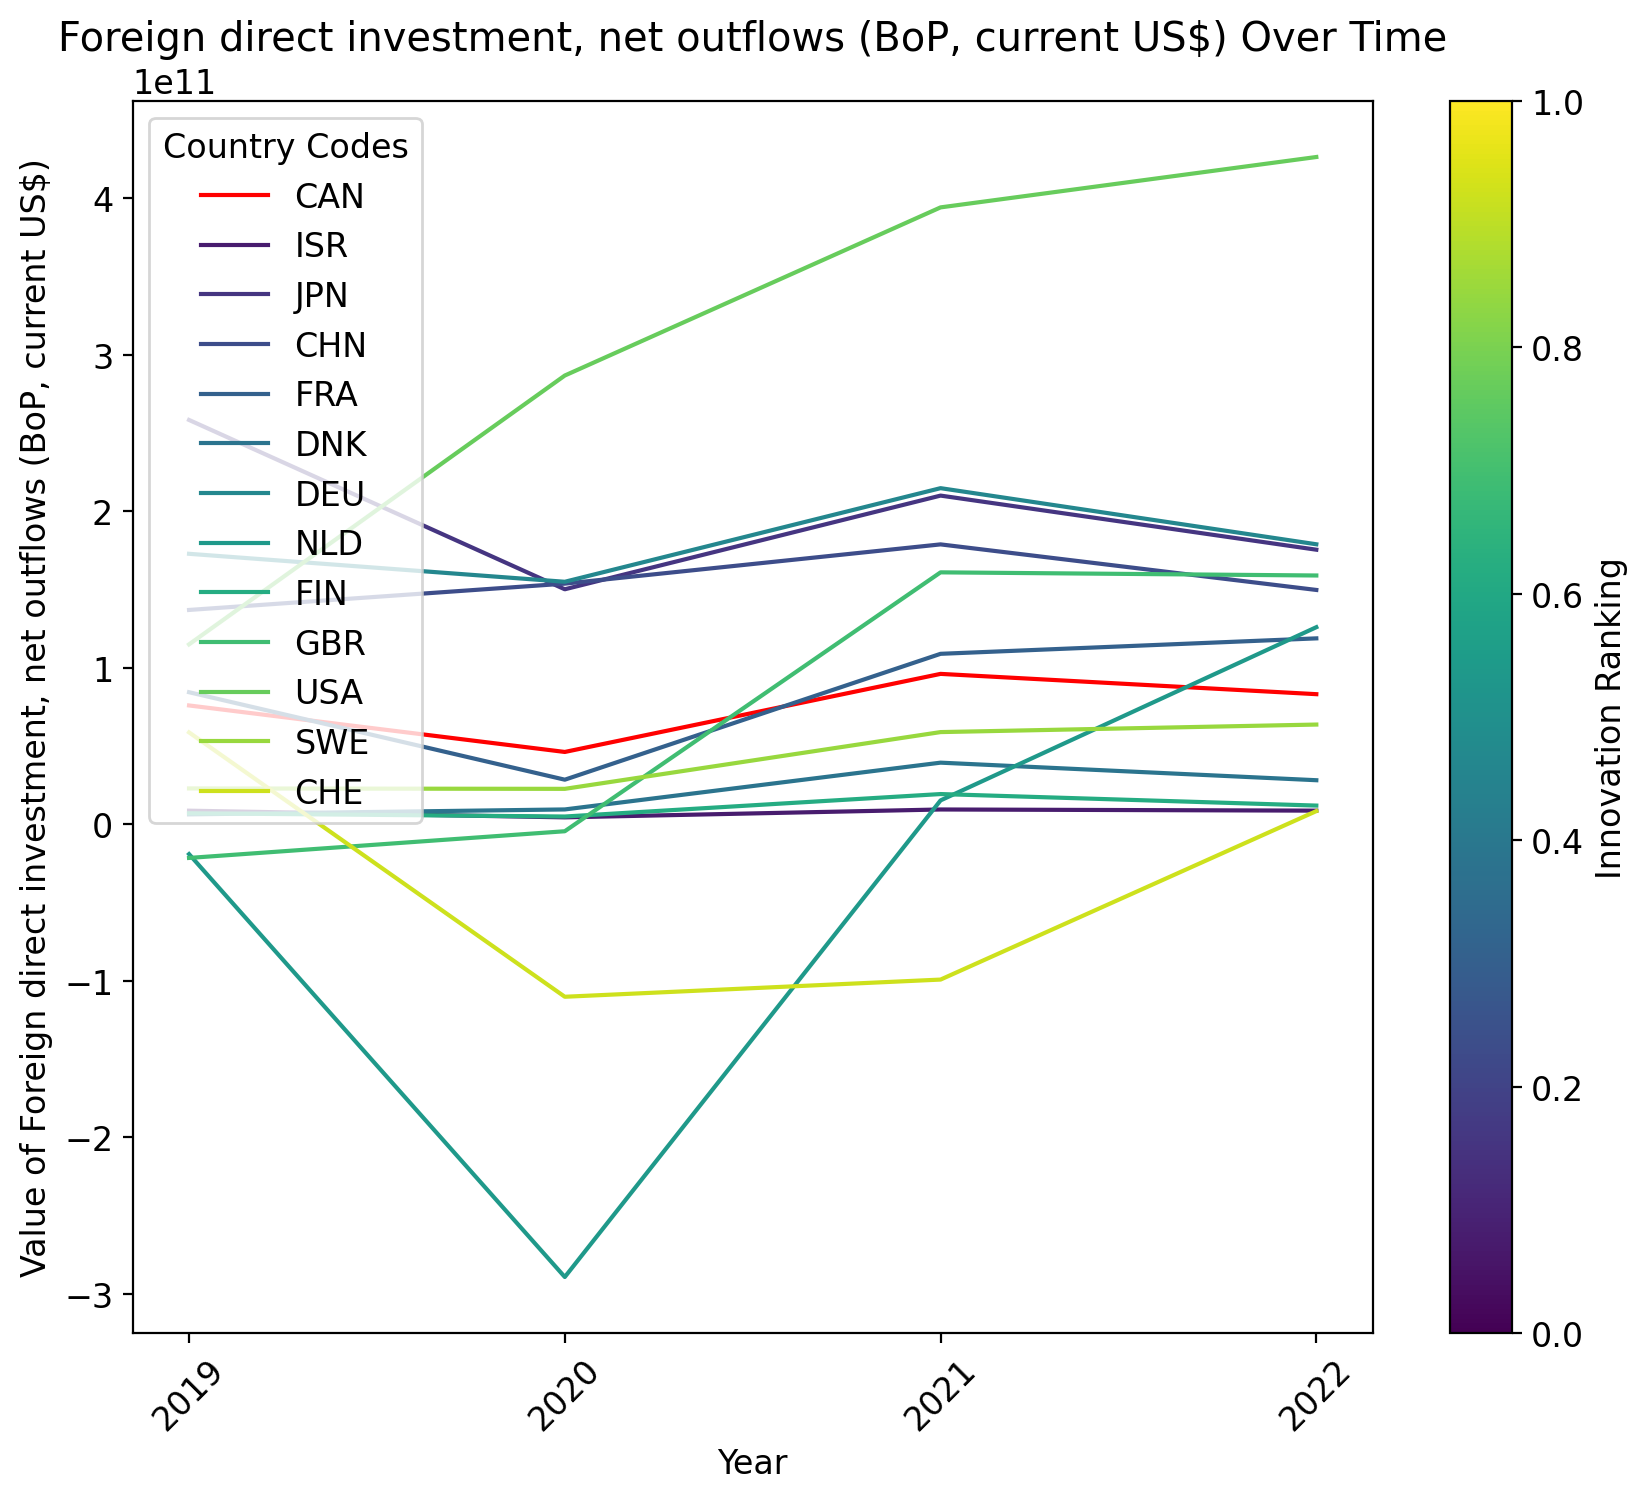

<Figure size 640x480 with 0 Axes>

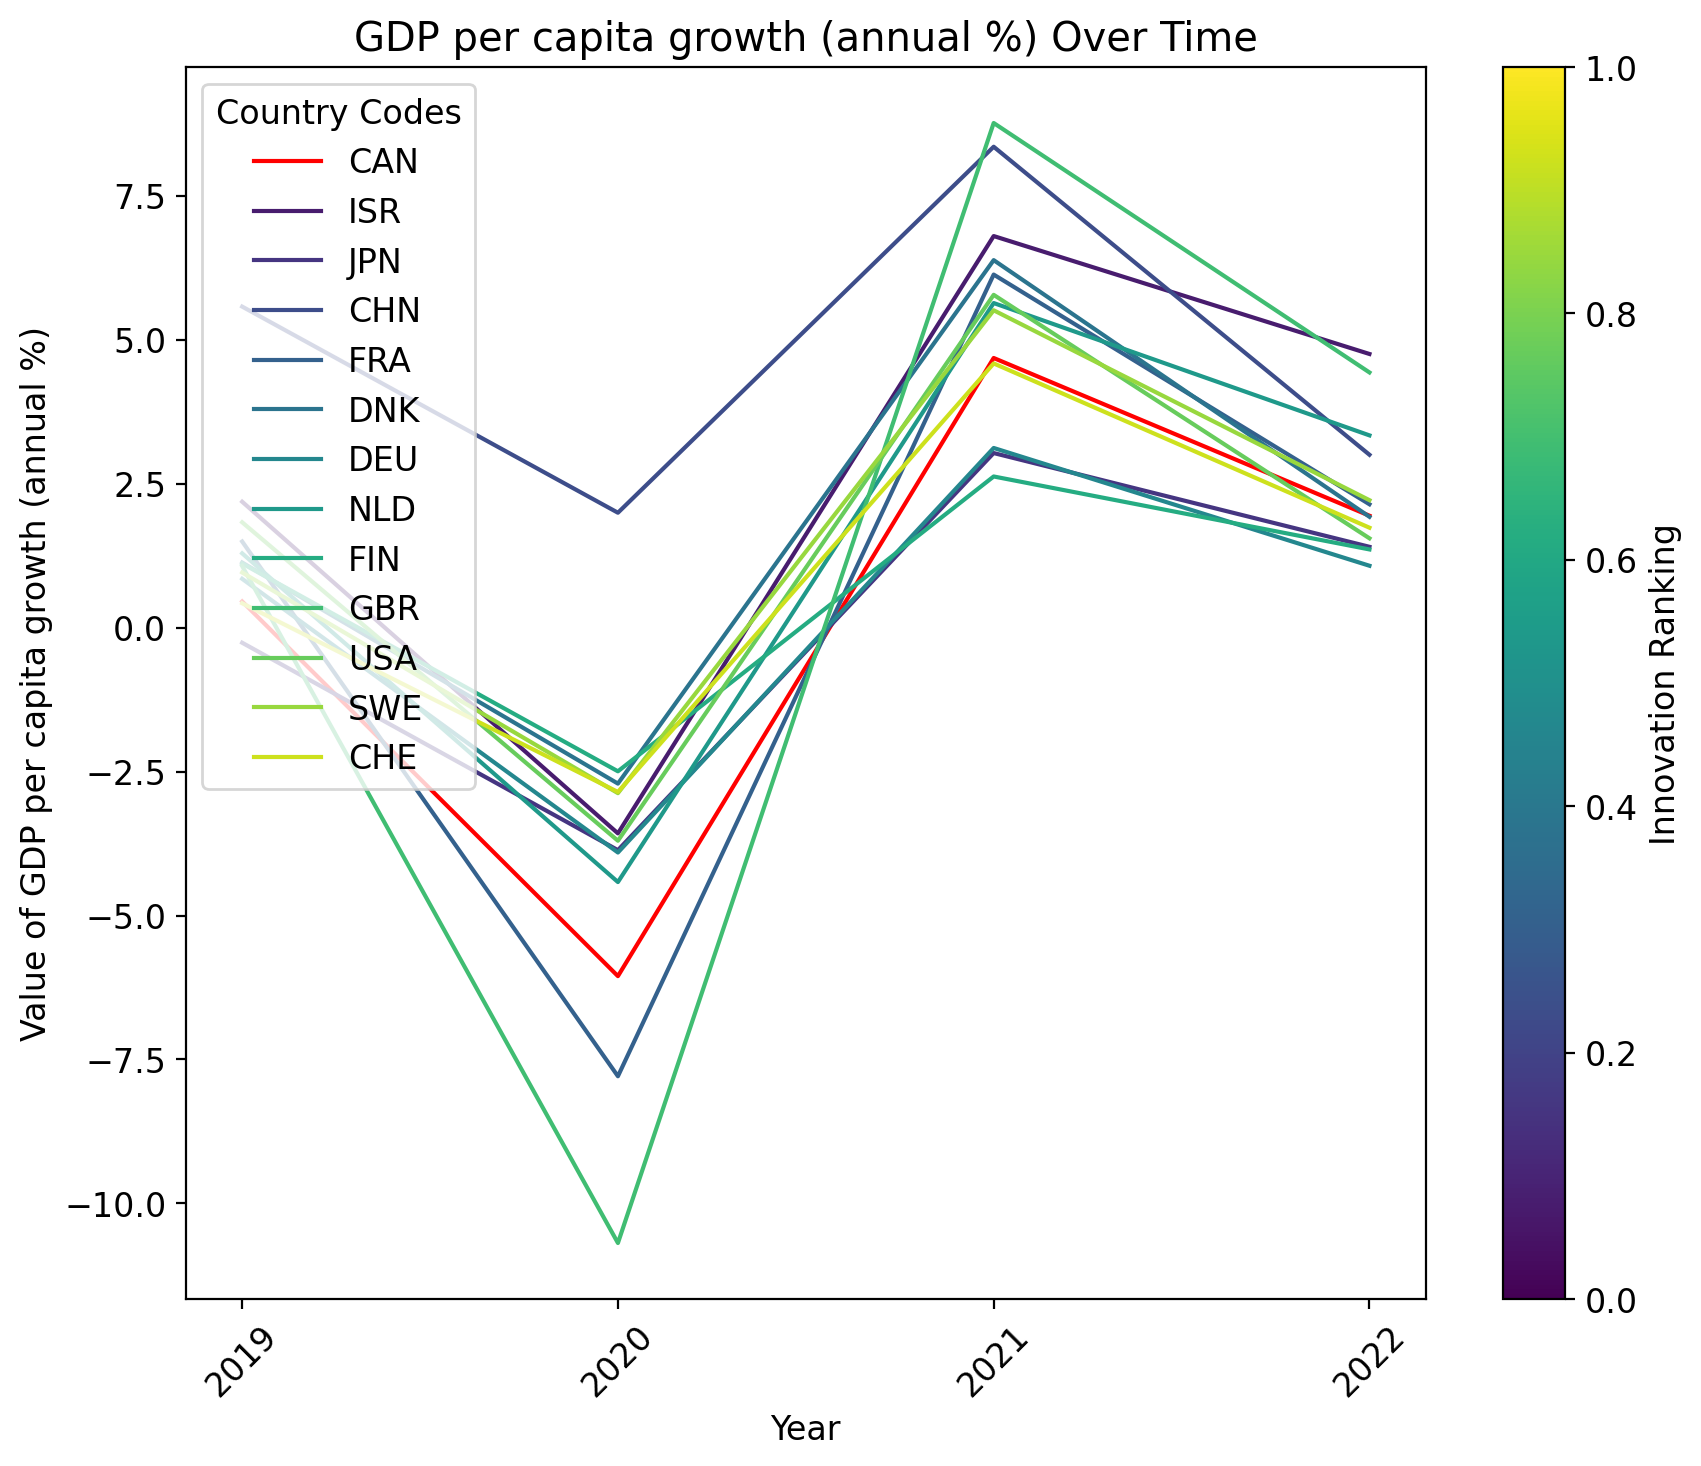

<Figure size 640x480 with 0 Axes>

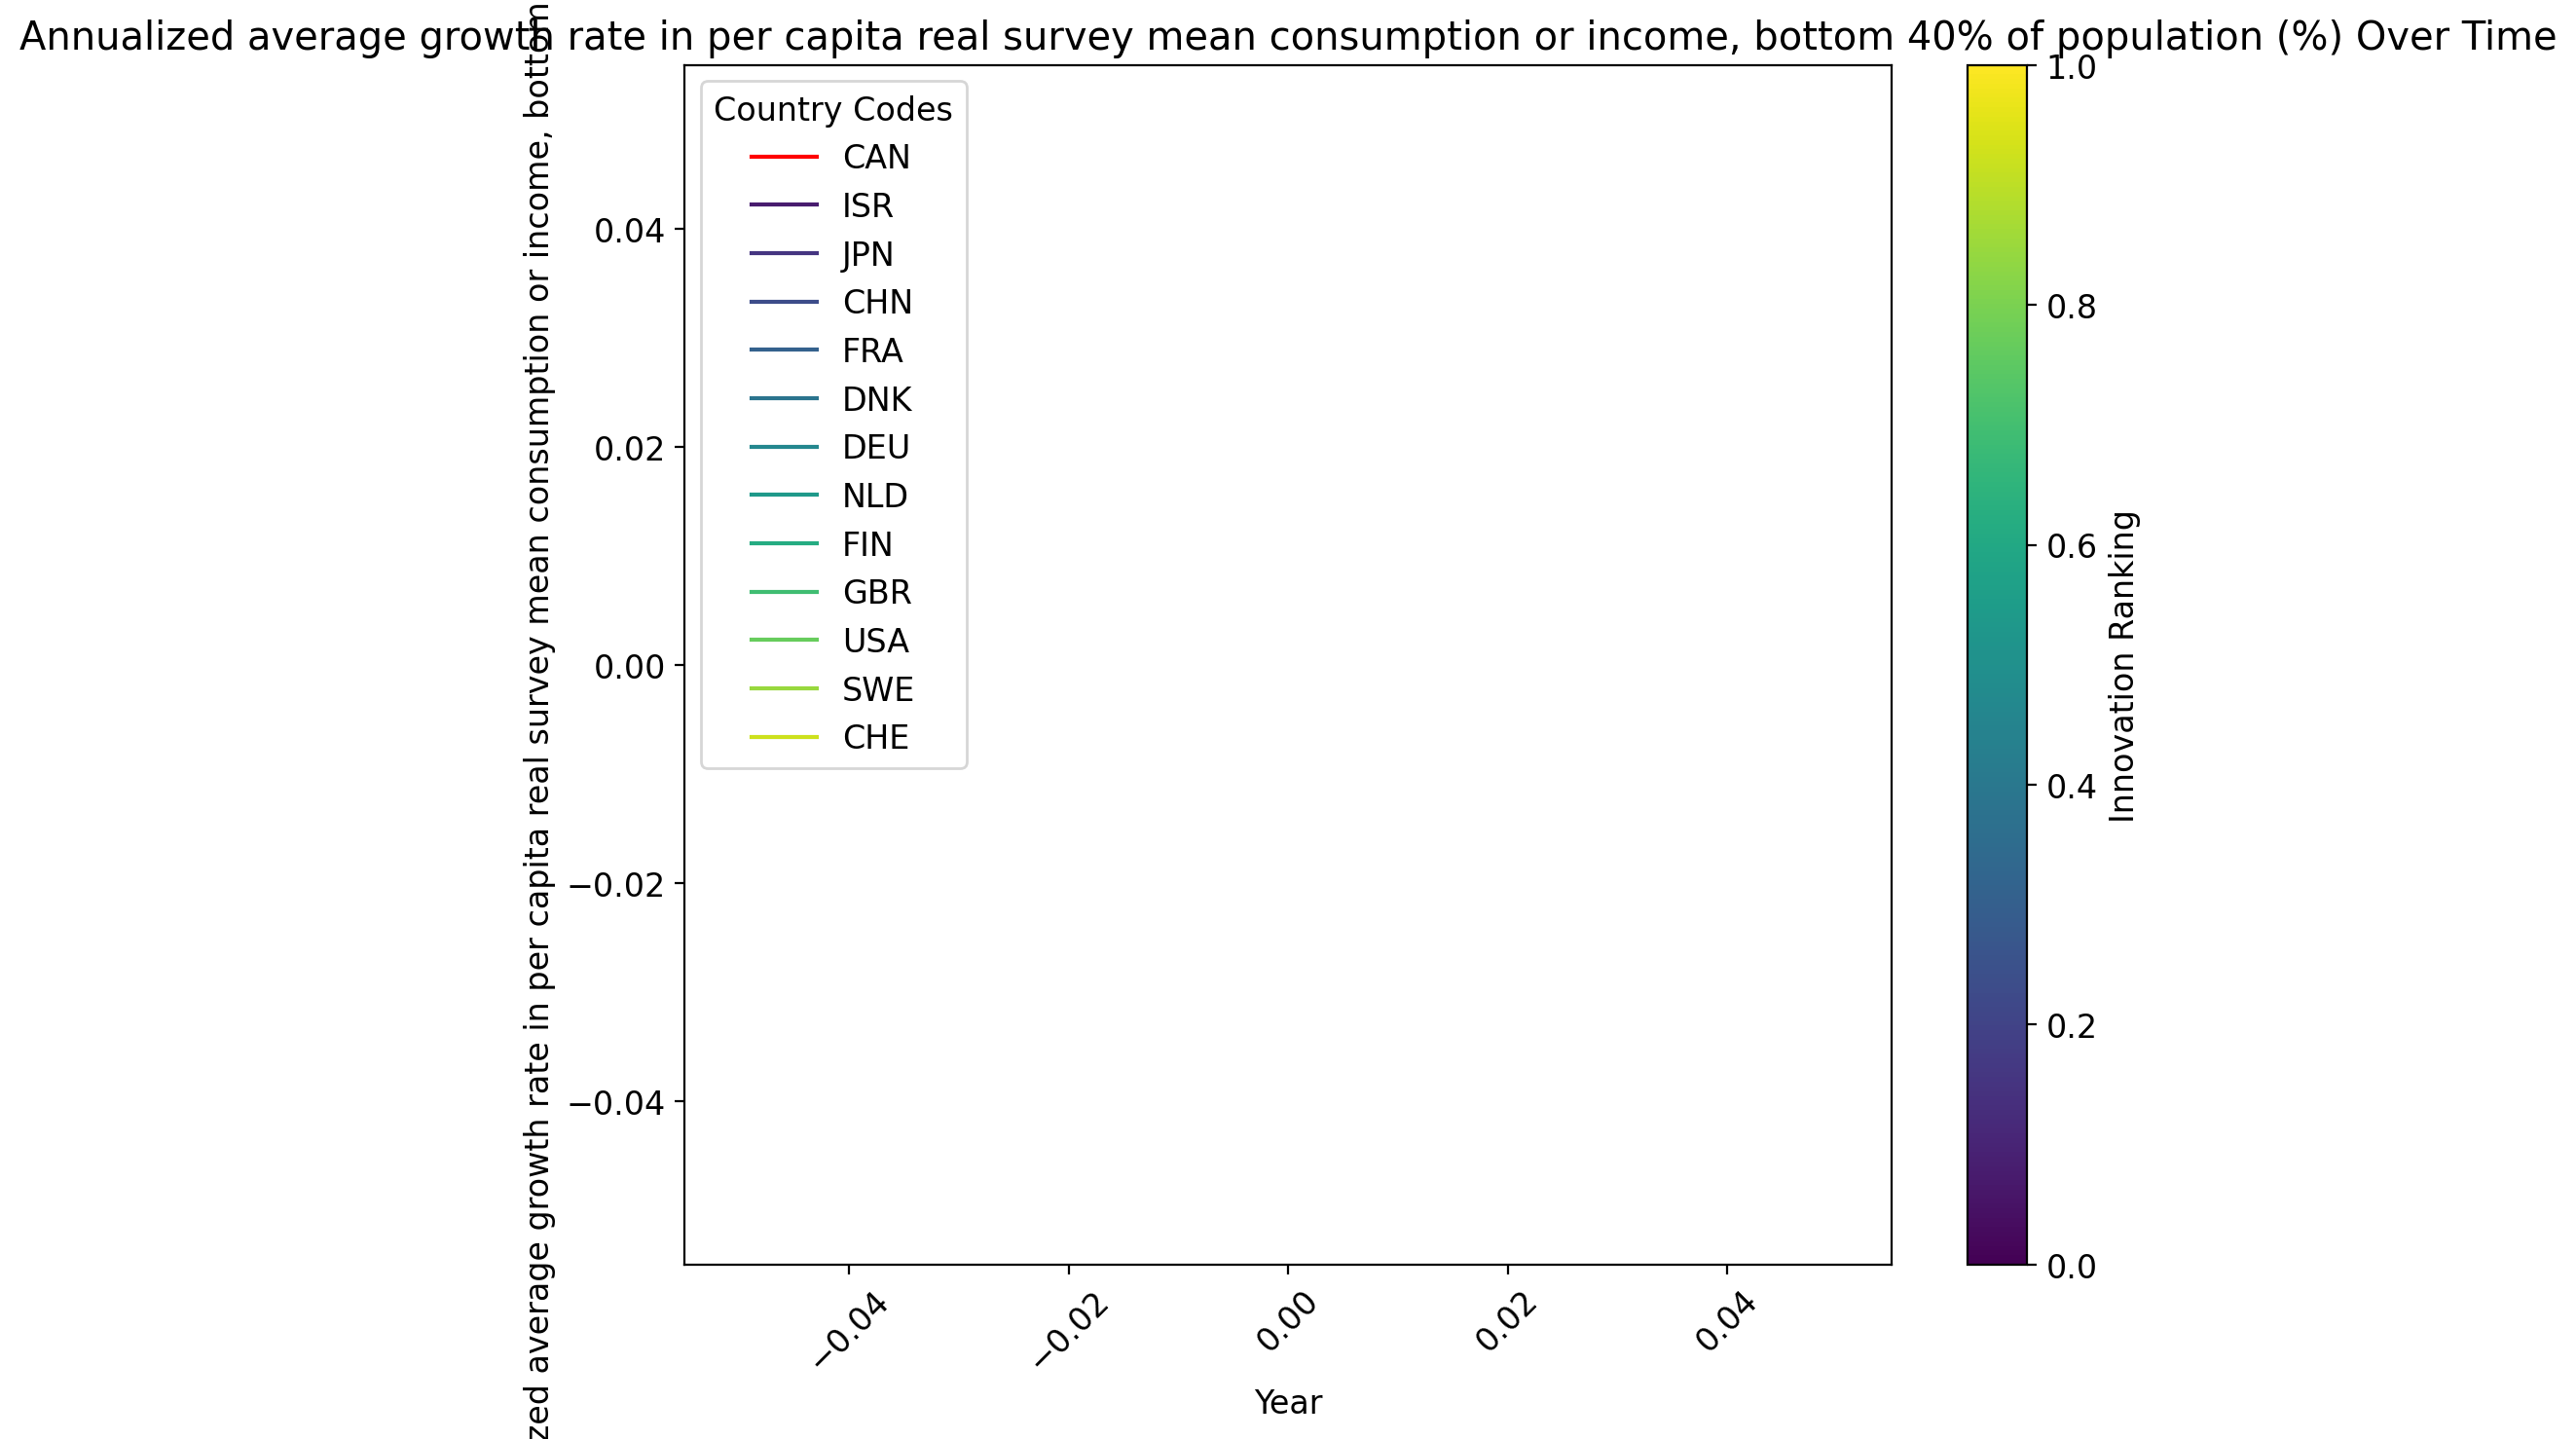

<Figure size 640x480 with 0 Axes>

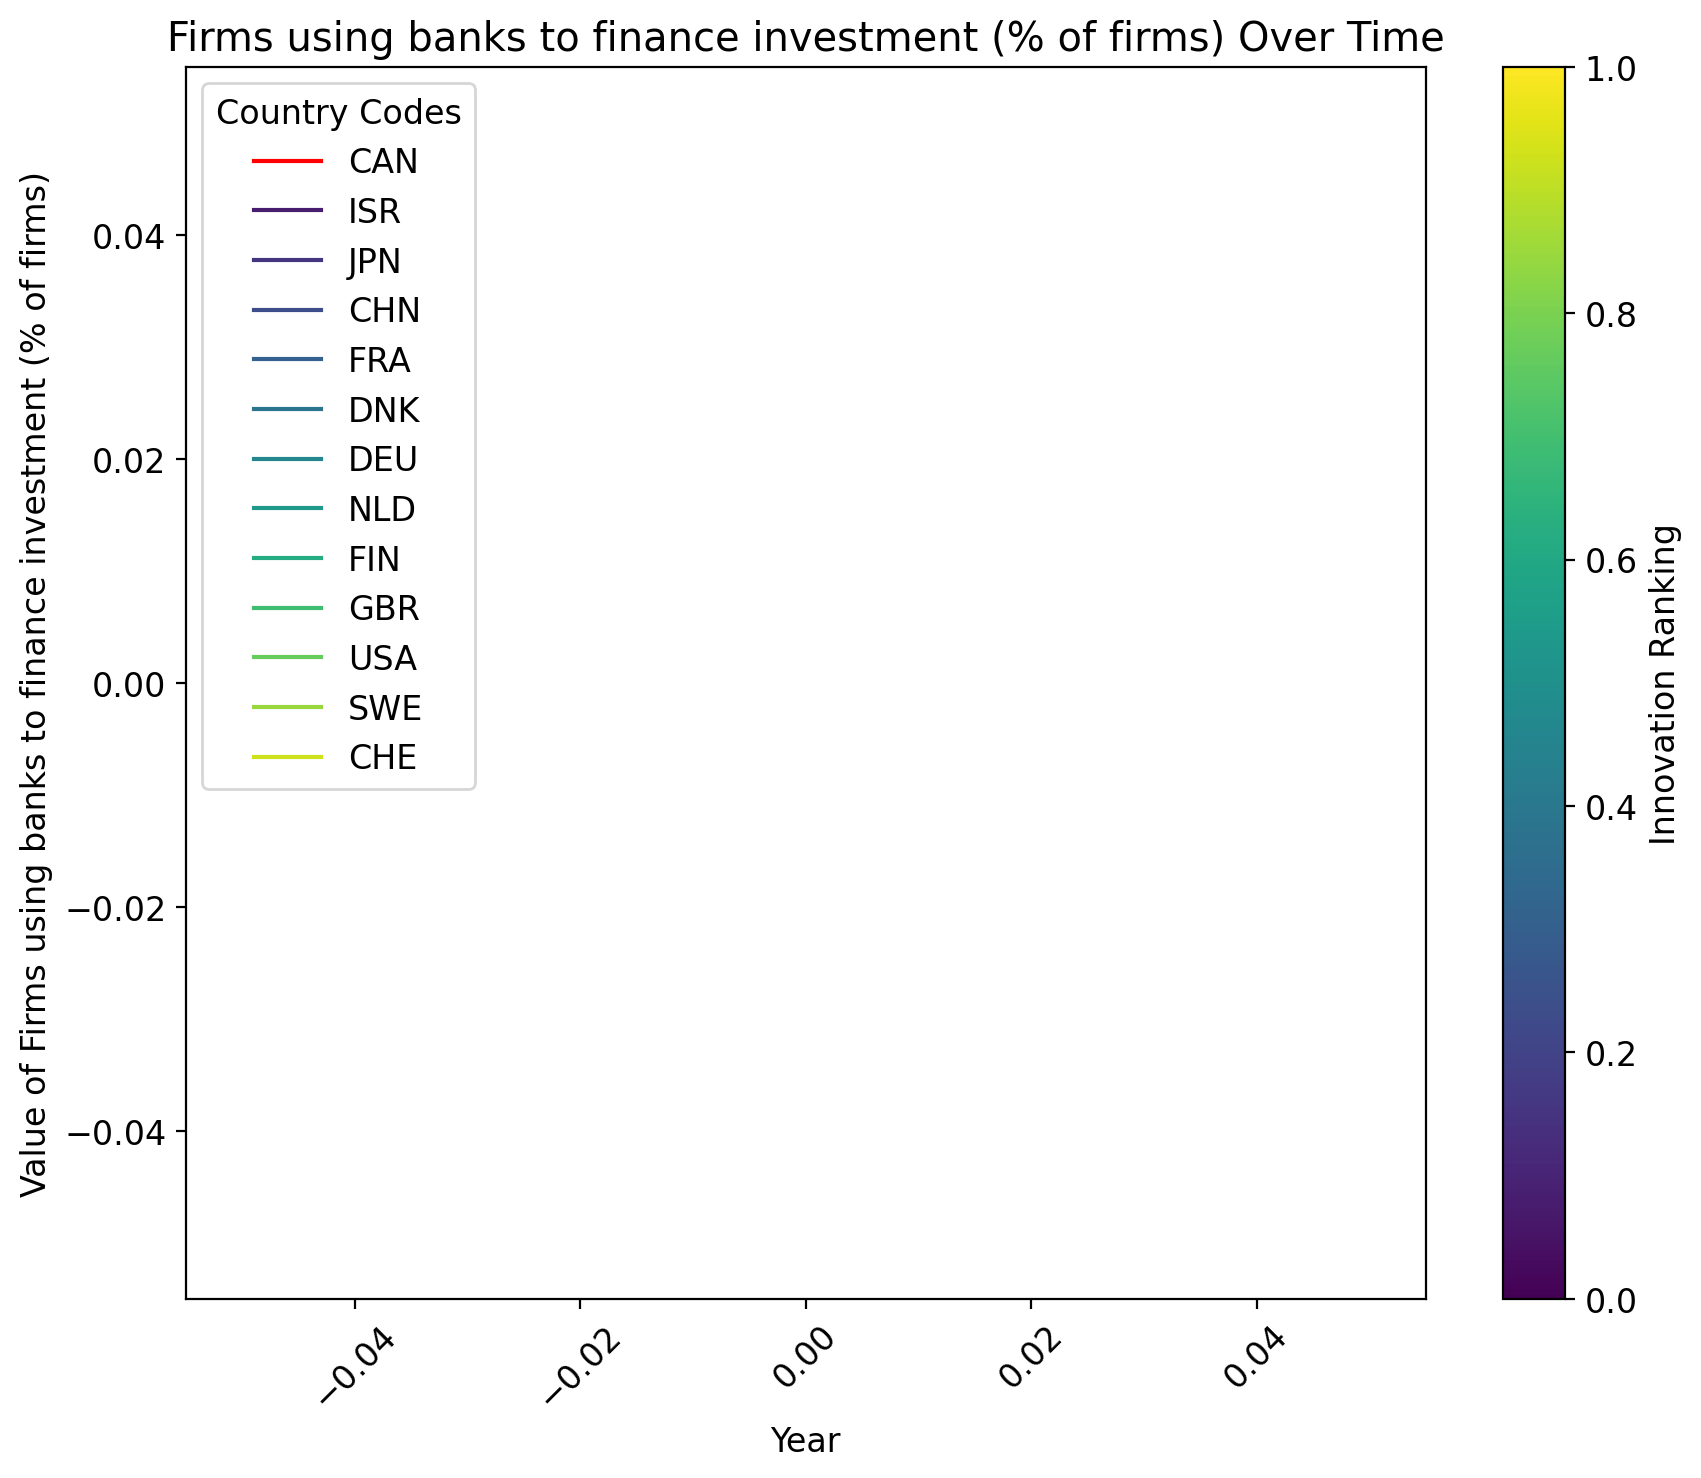

<Figure size 640x480 with 0 Axes>

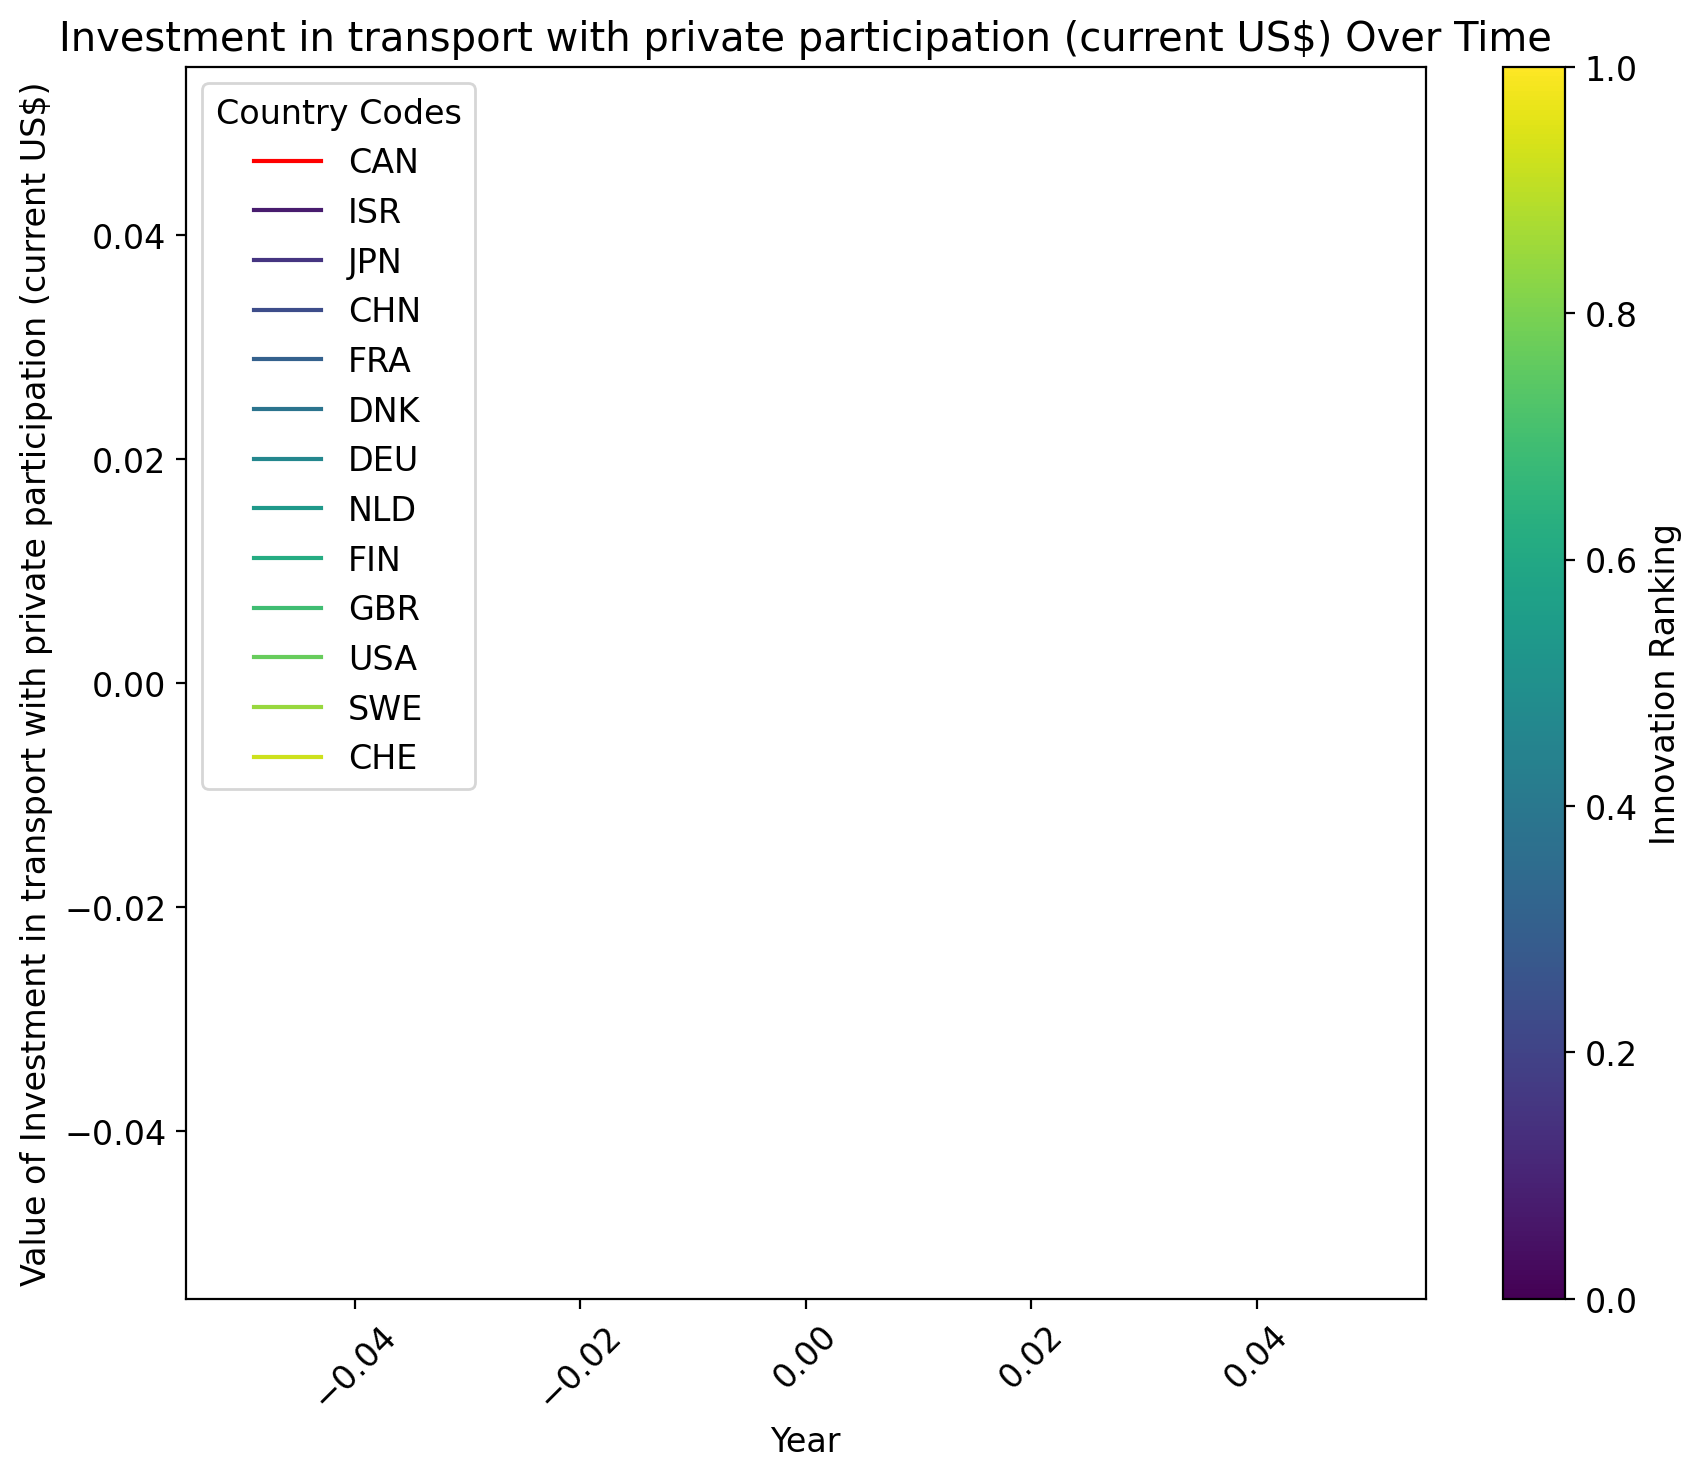

<Figure size 640x480 with 0 Axes>

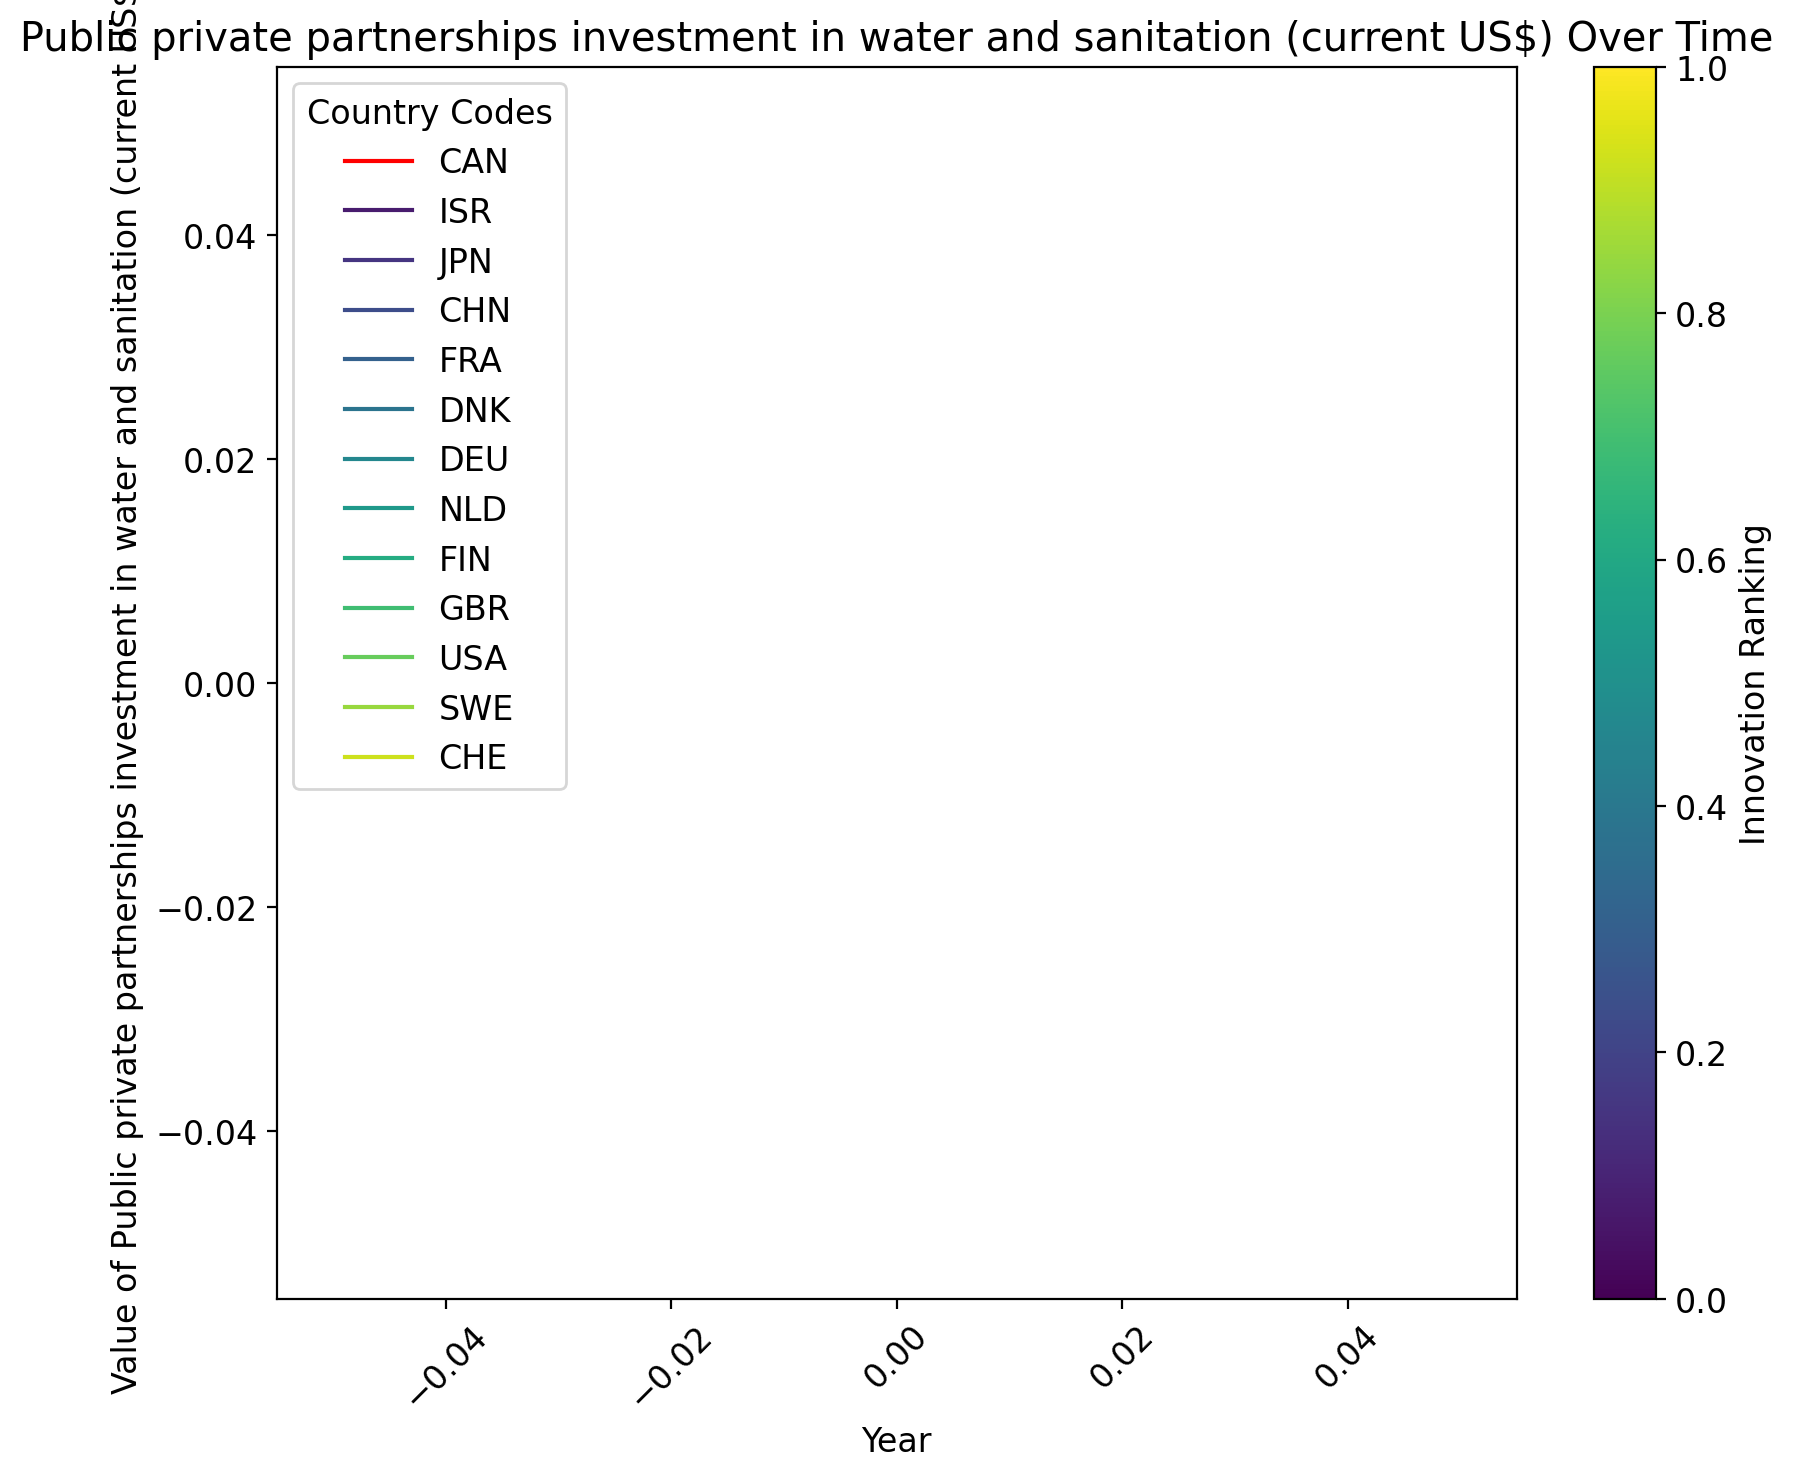

<Figure size 640x480 with 0 Axes>

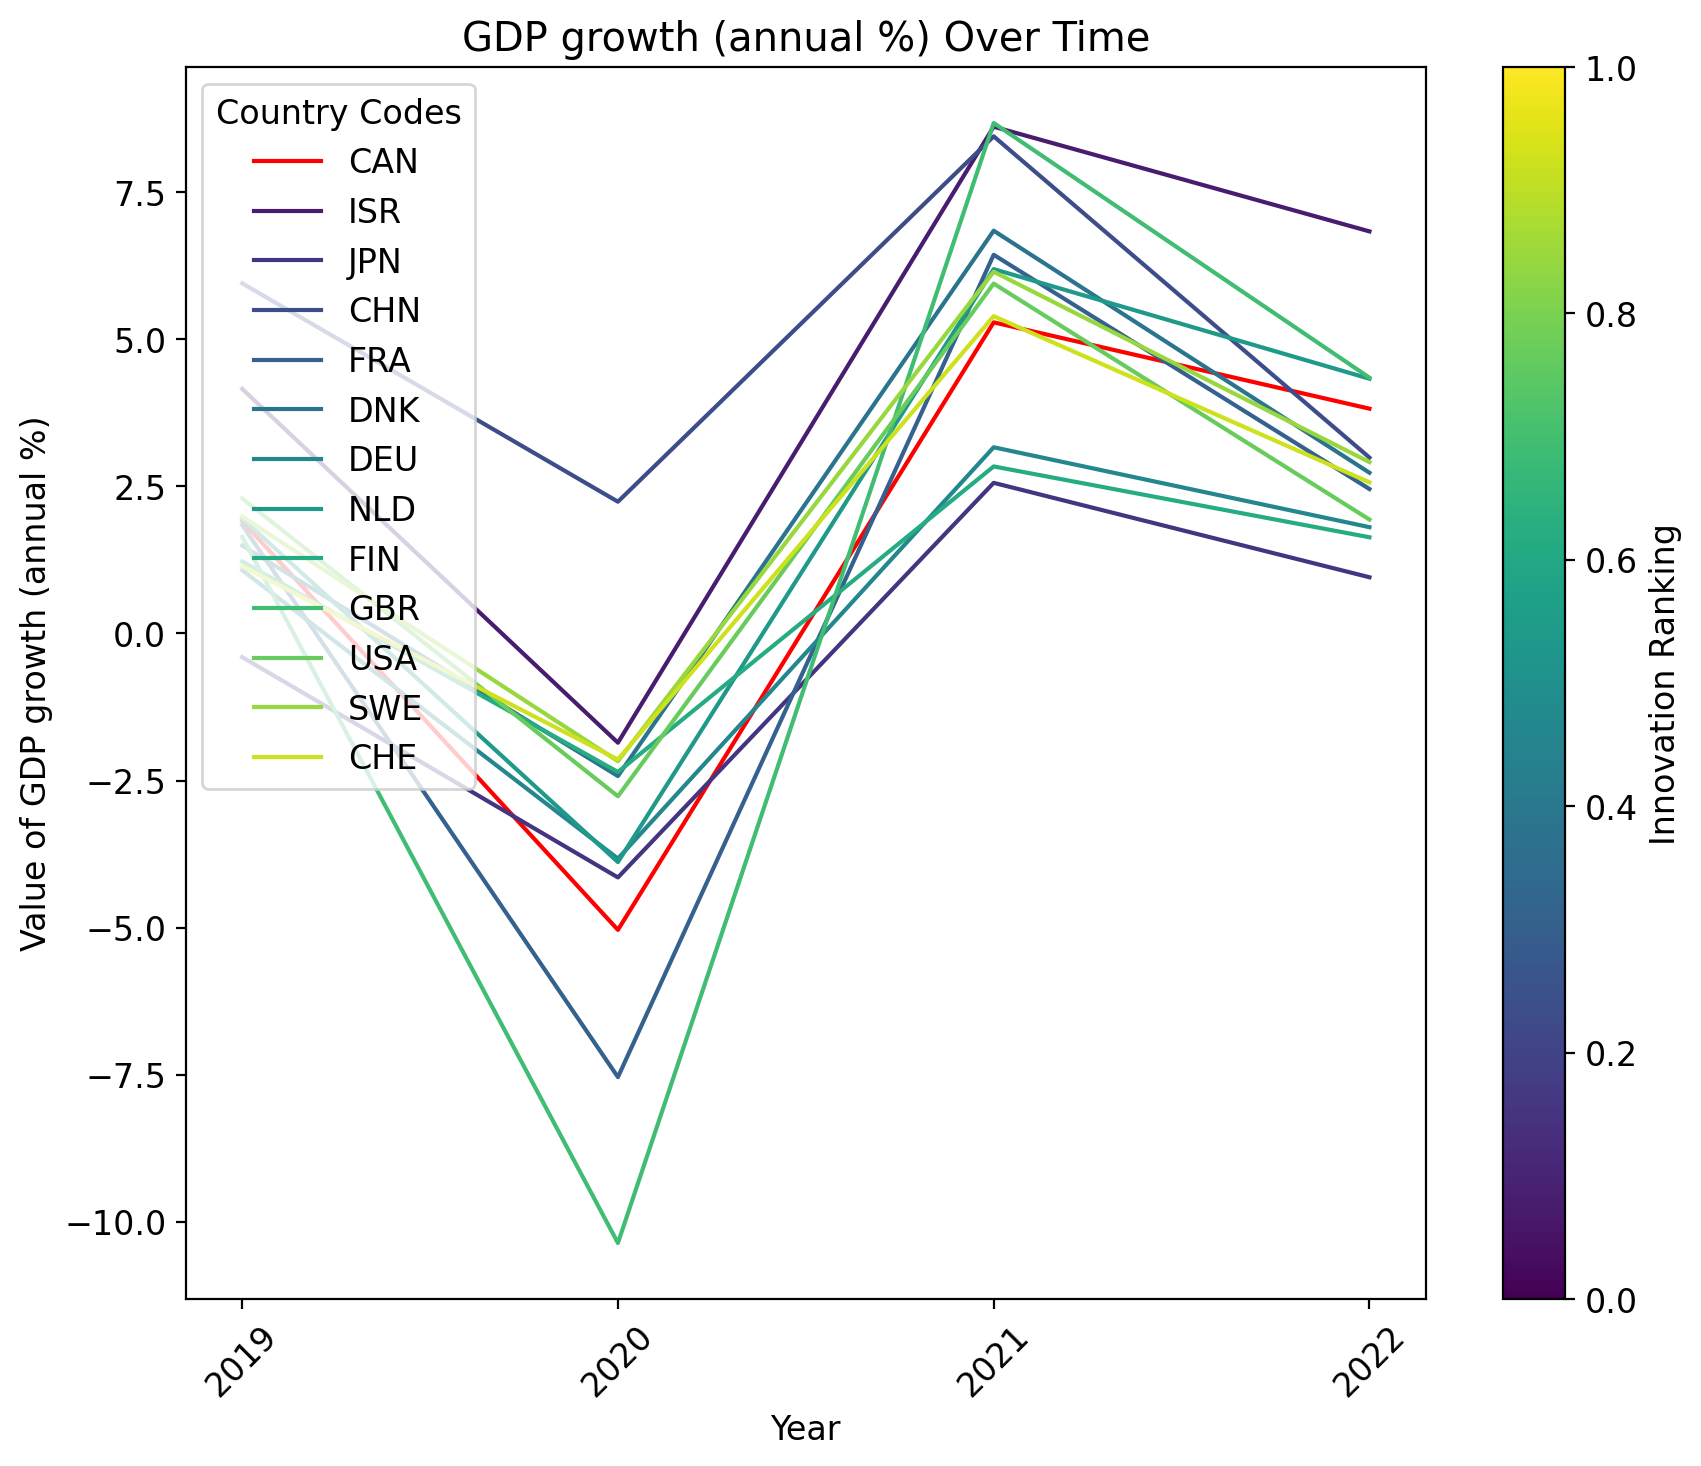

<Figure size 640x480 with 0 Axes>

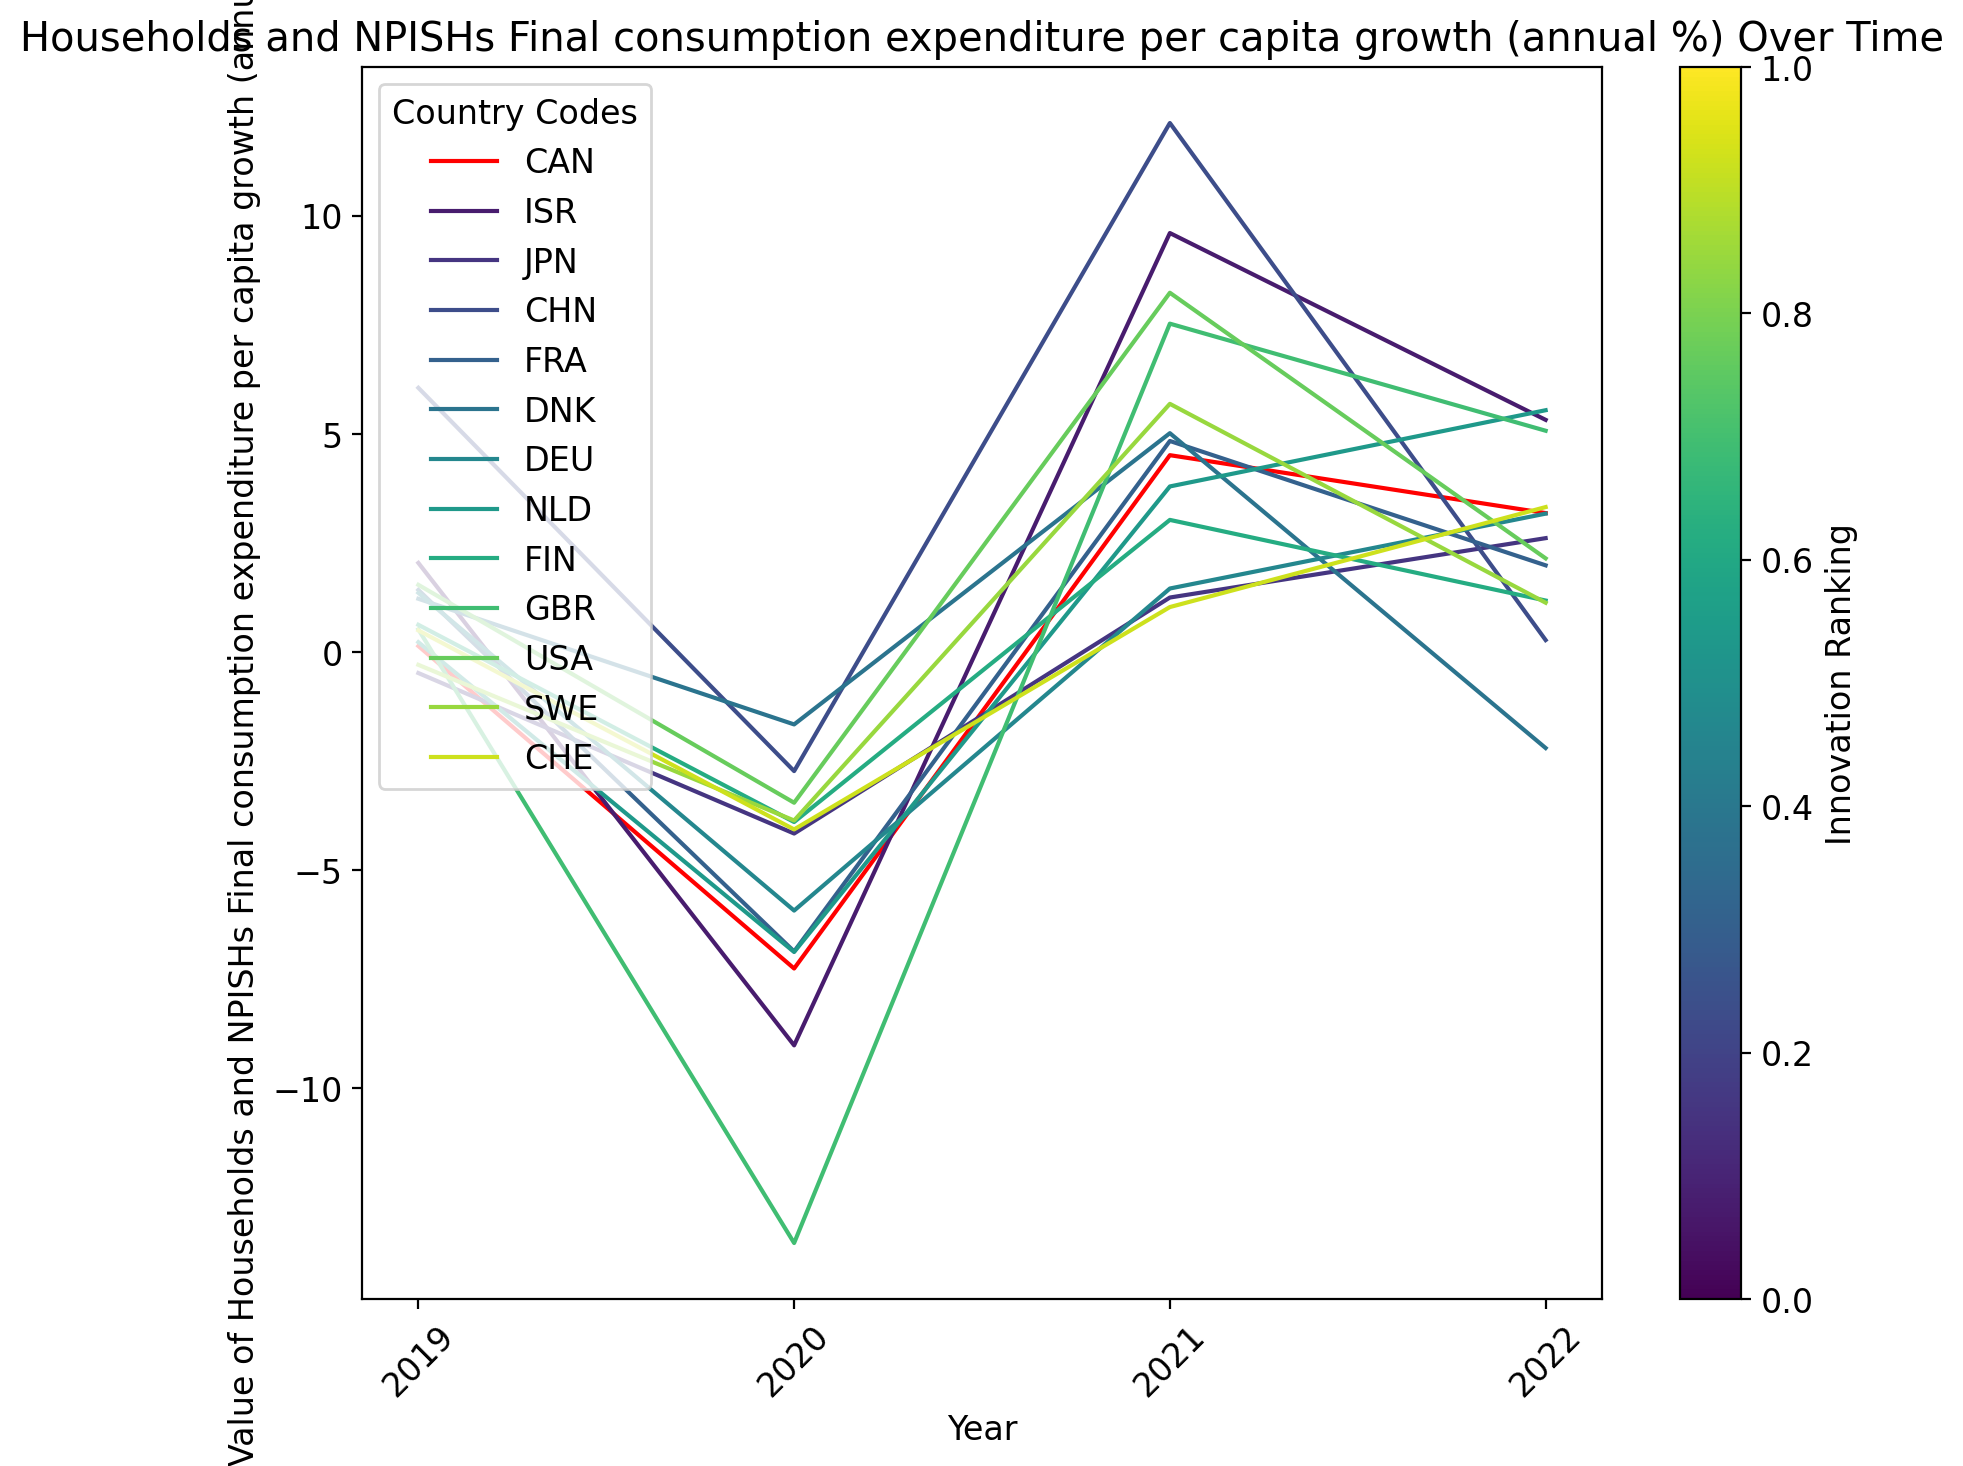

<Figure size 640x480 with 0 Axes>

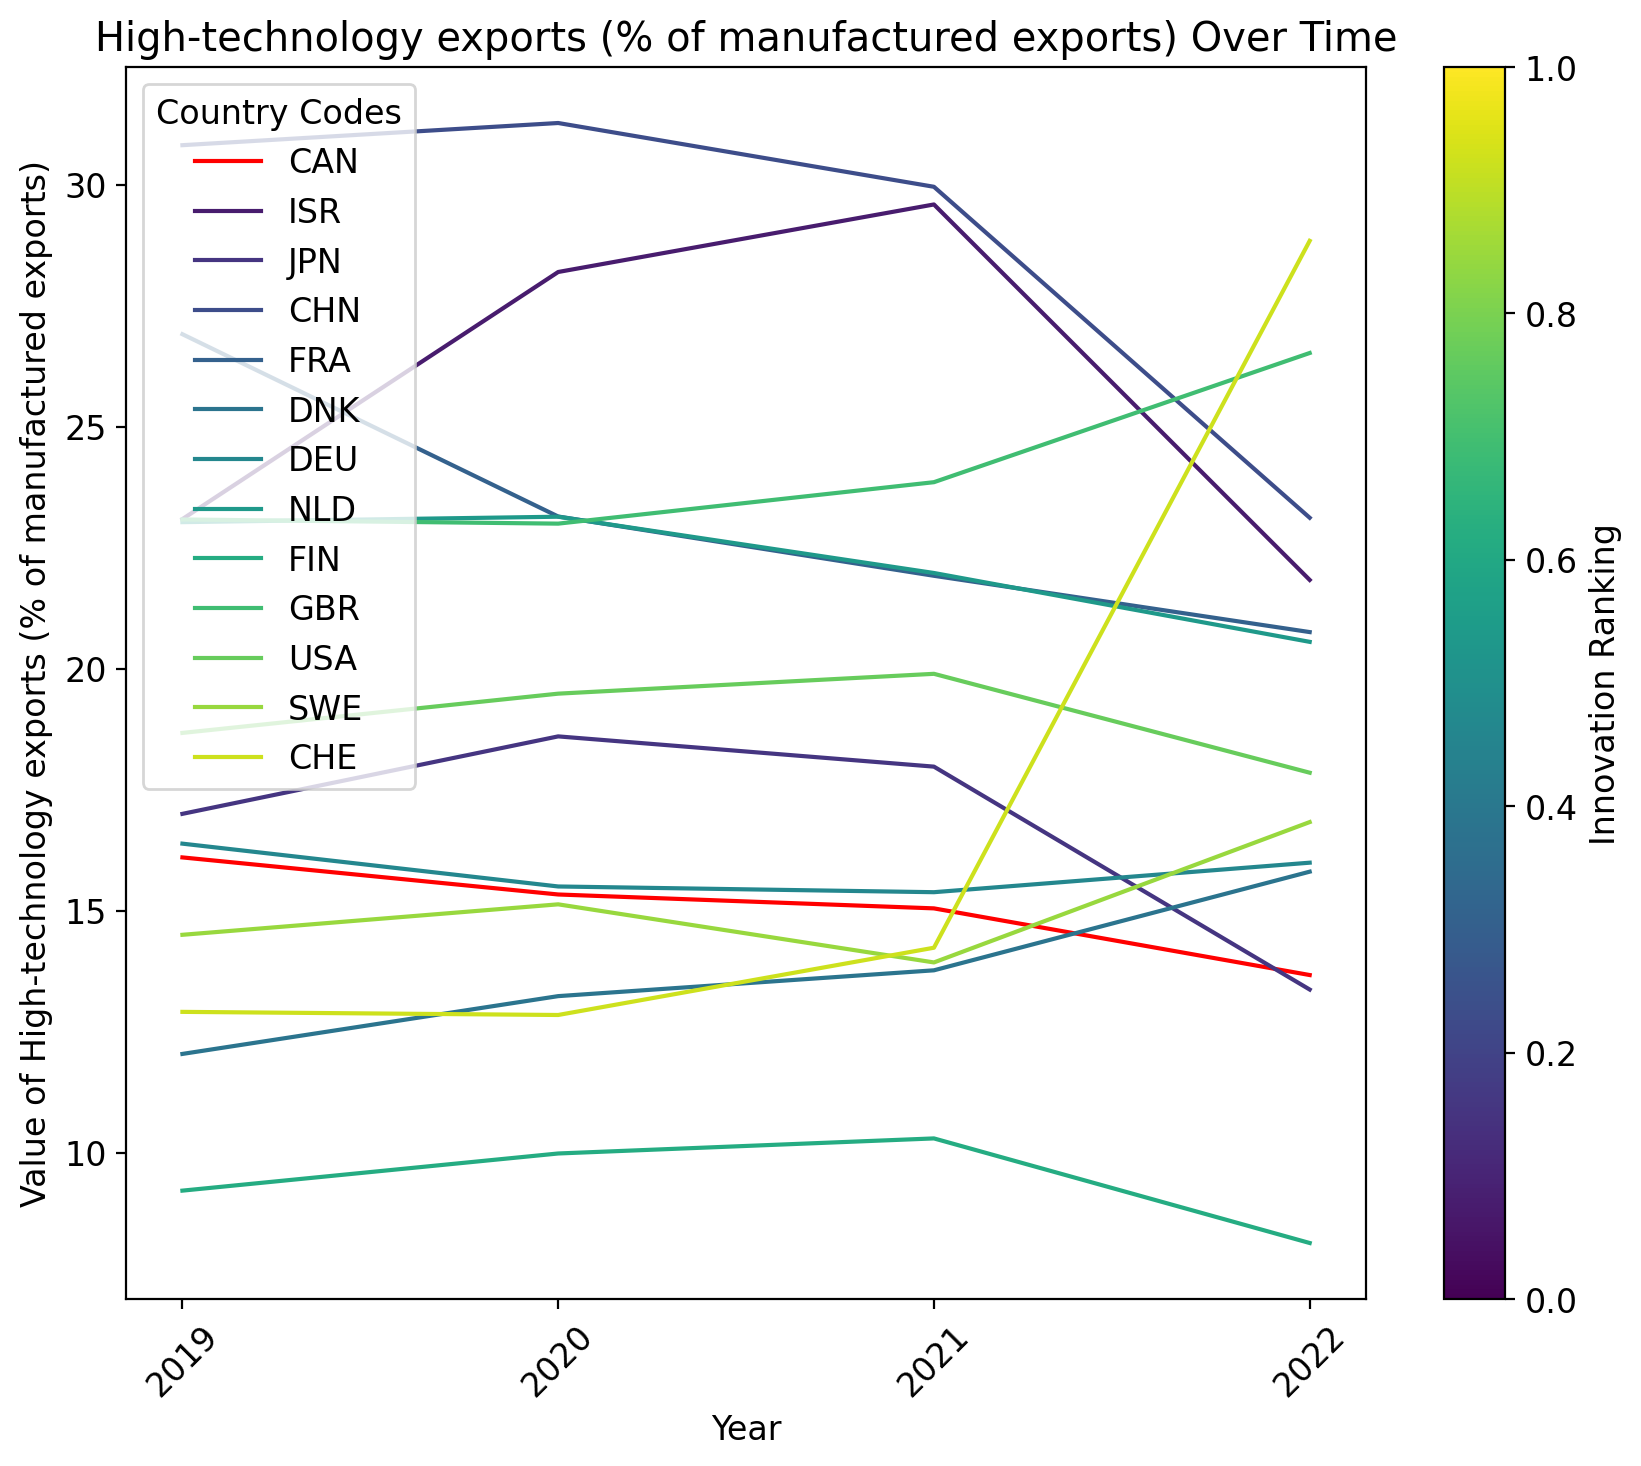

<Figure size 640x480 with 0 Axes>

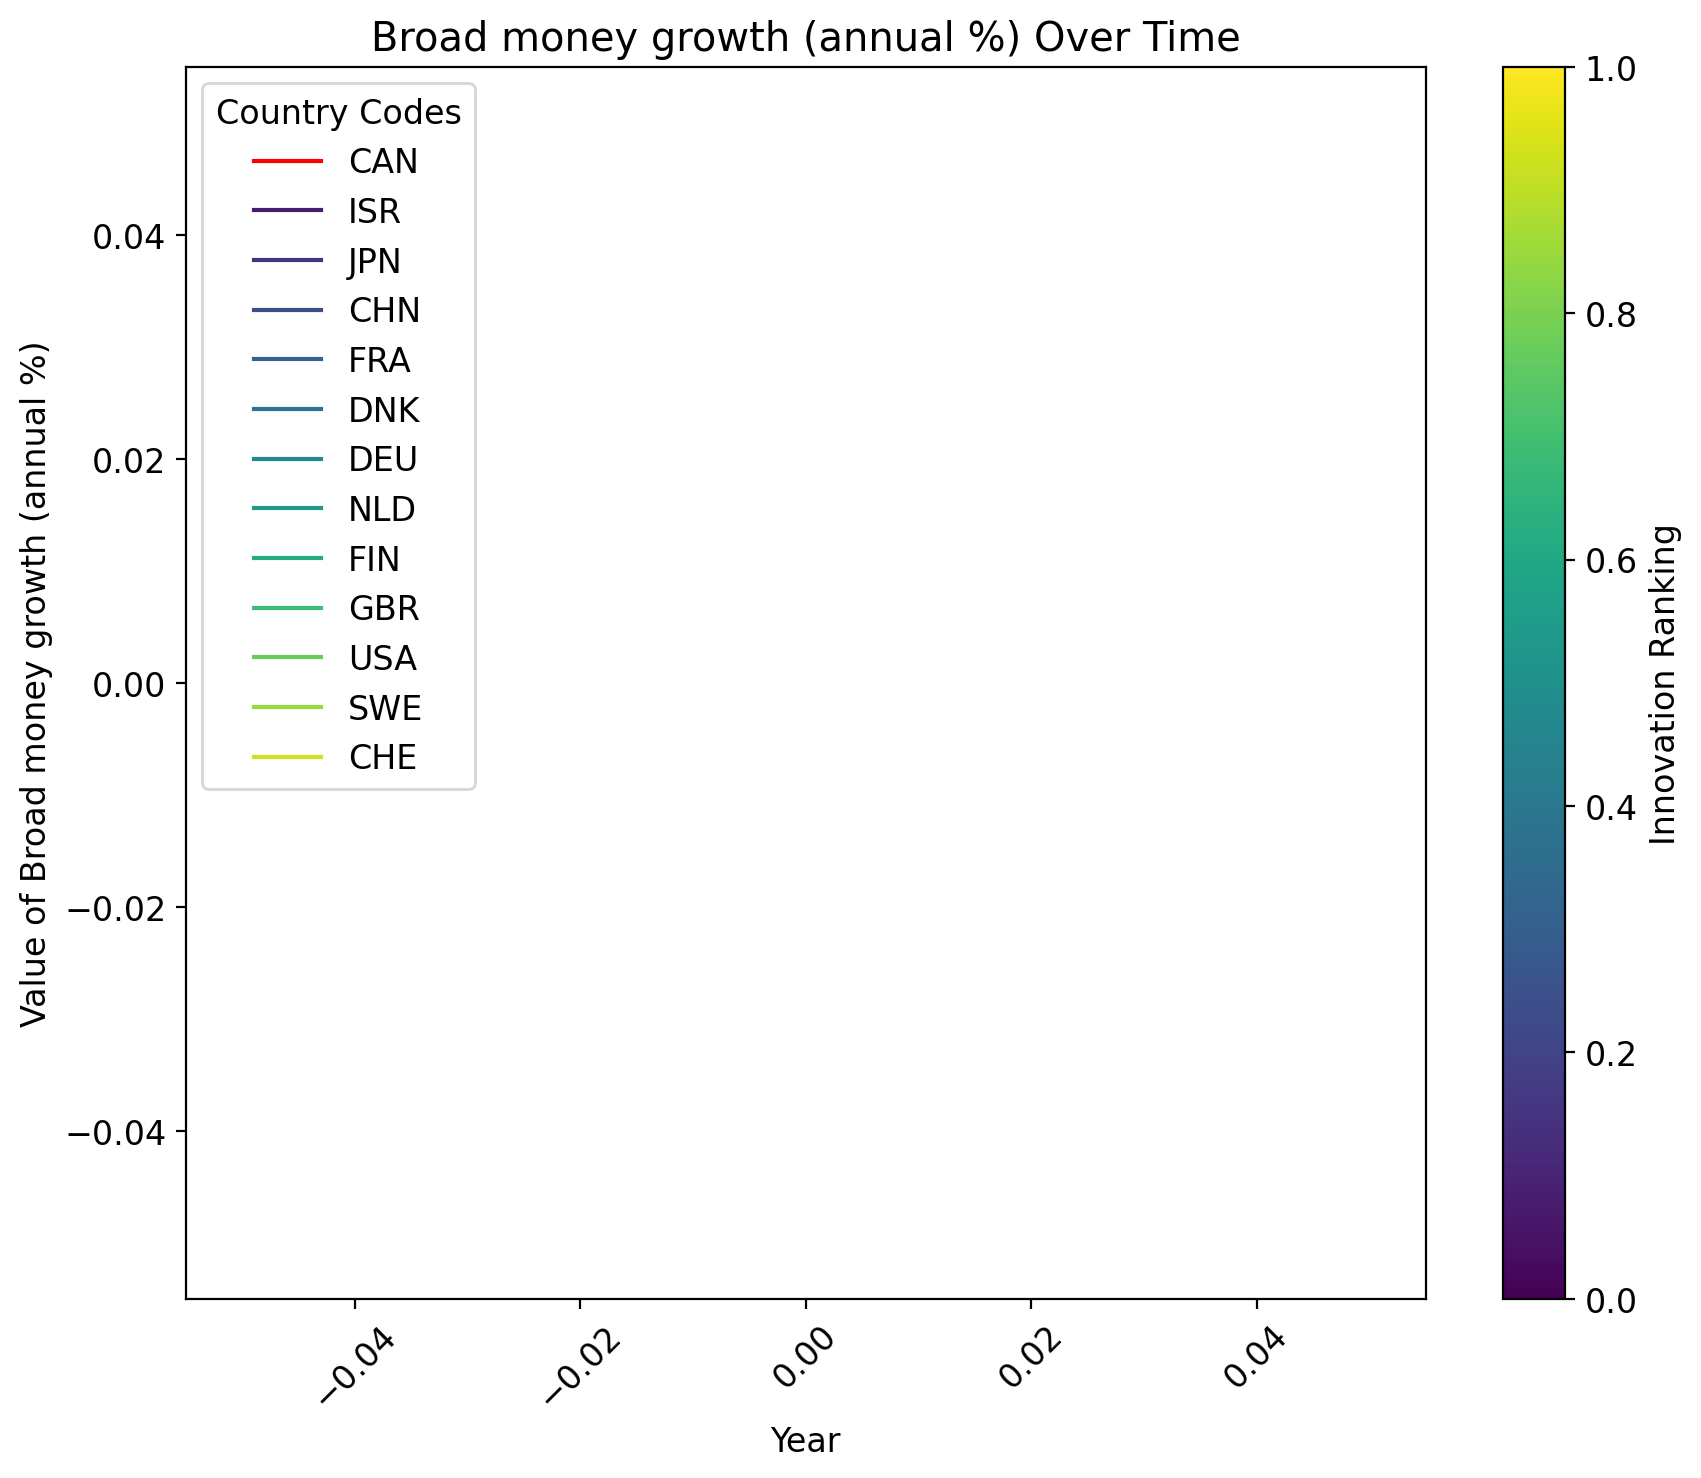

<Figure size 640x480 with 0 Axes>

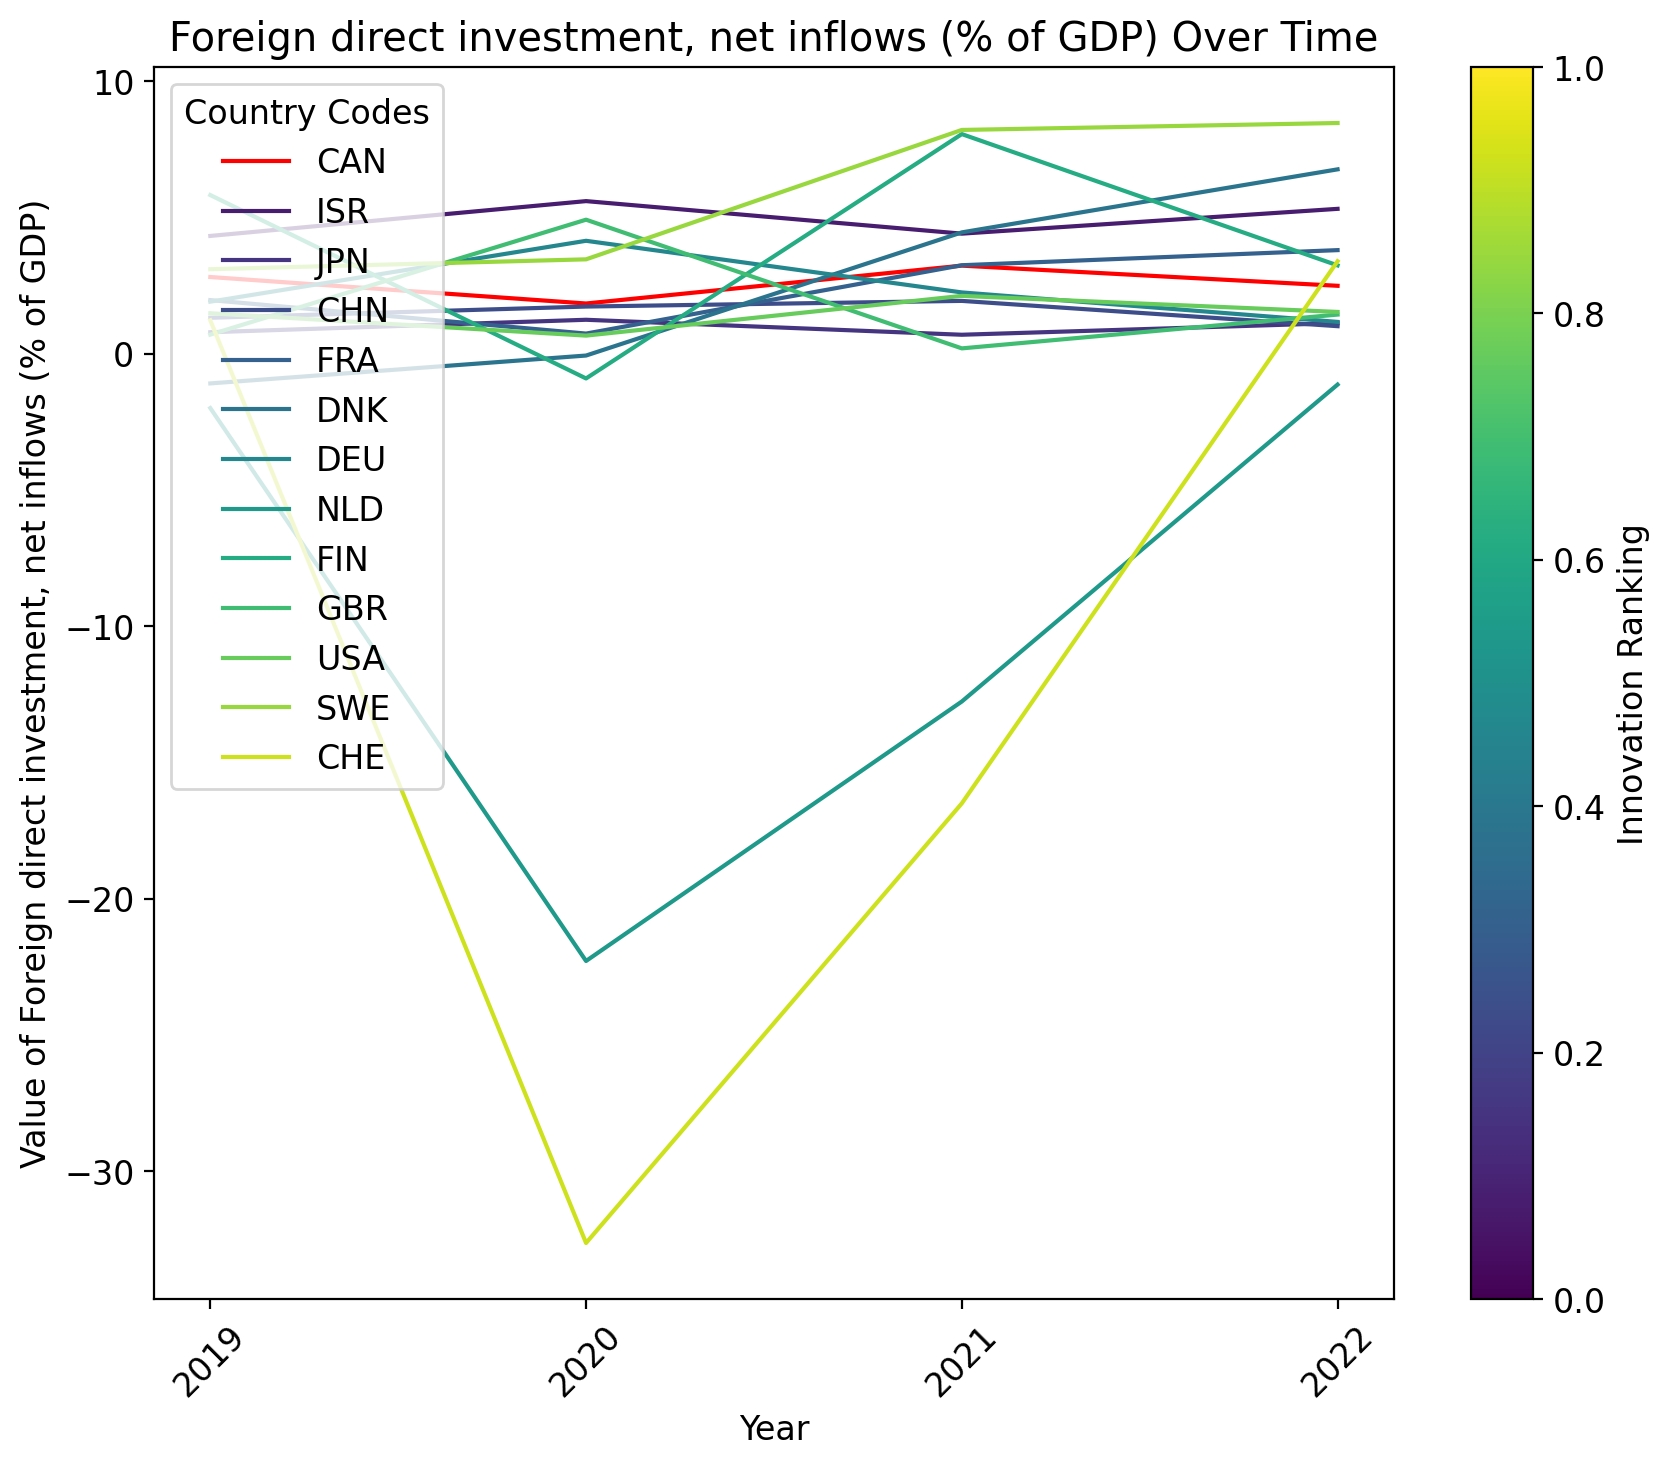

<Figure size 640x480 with 0 Axes>

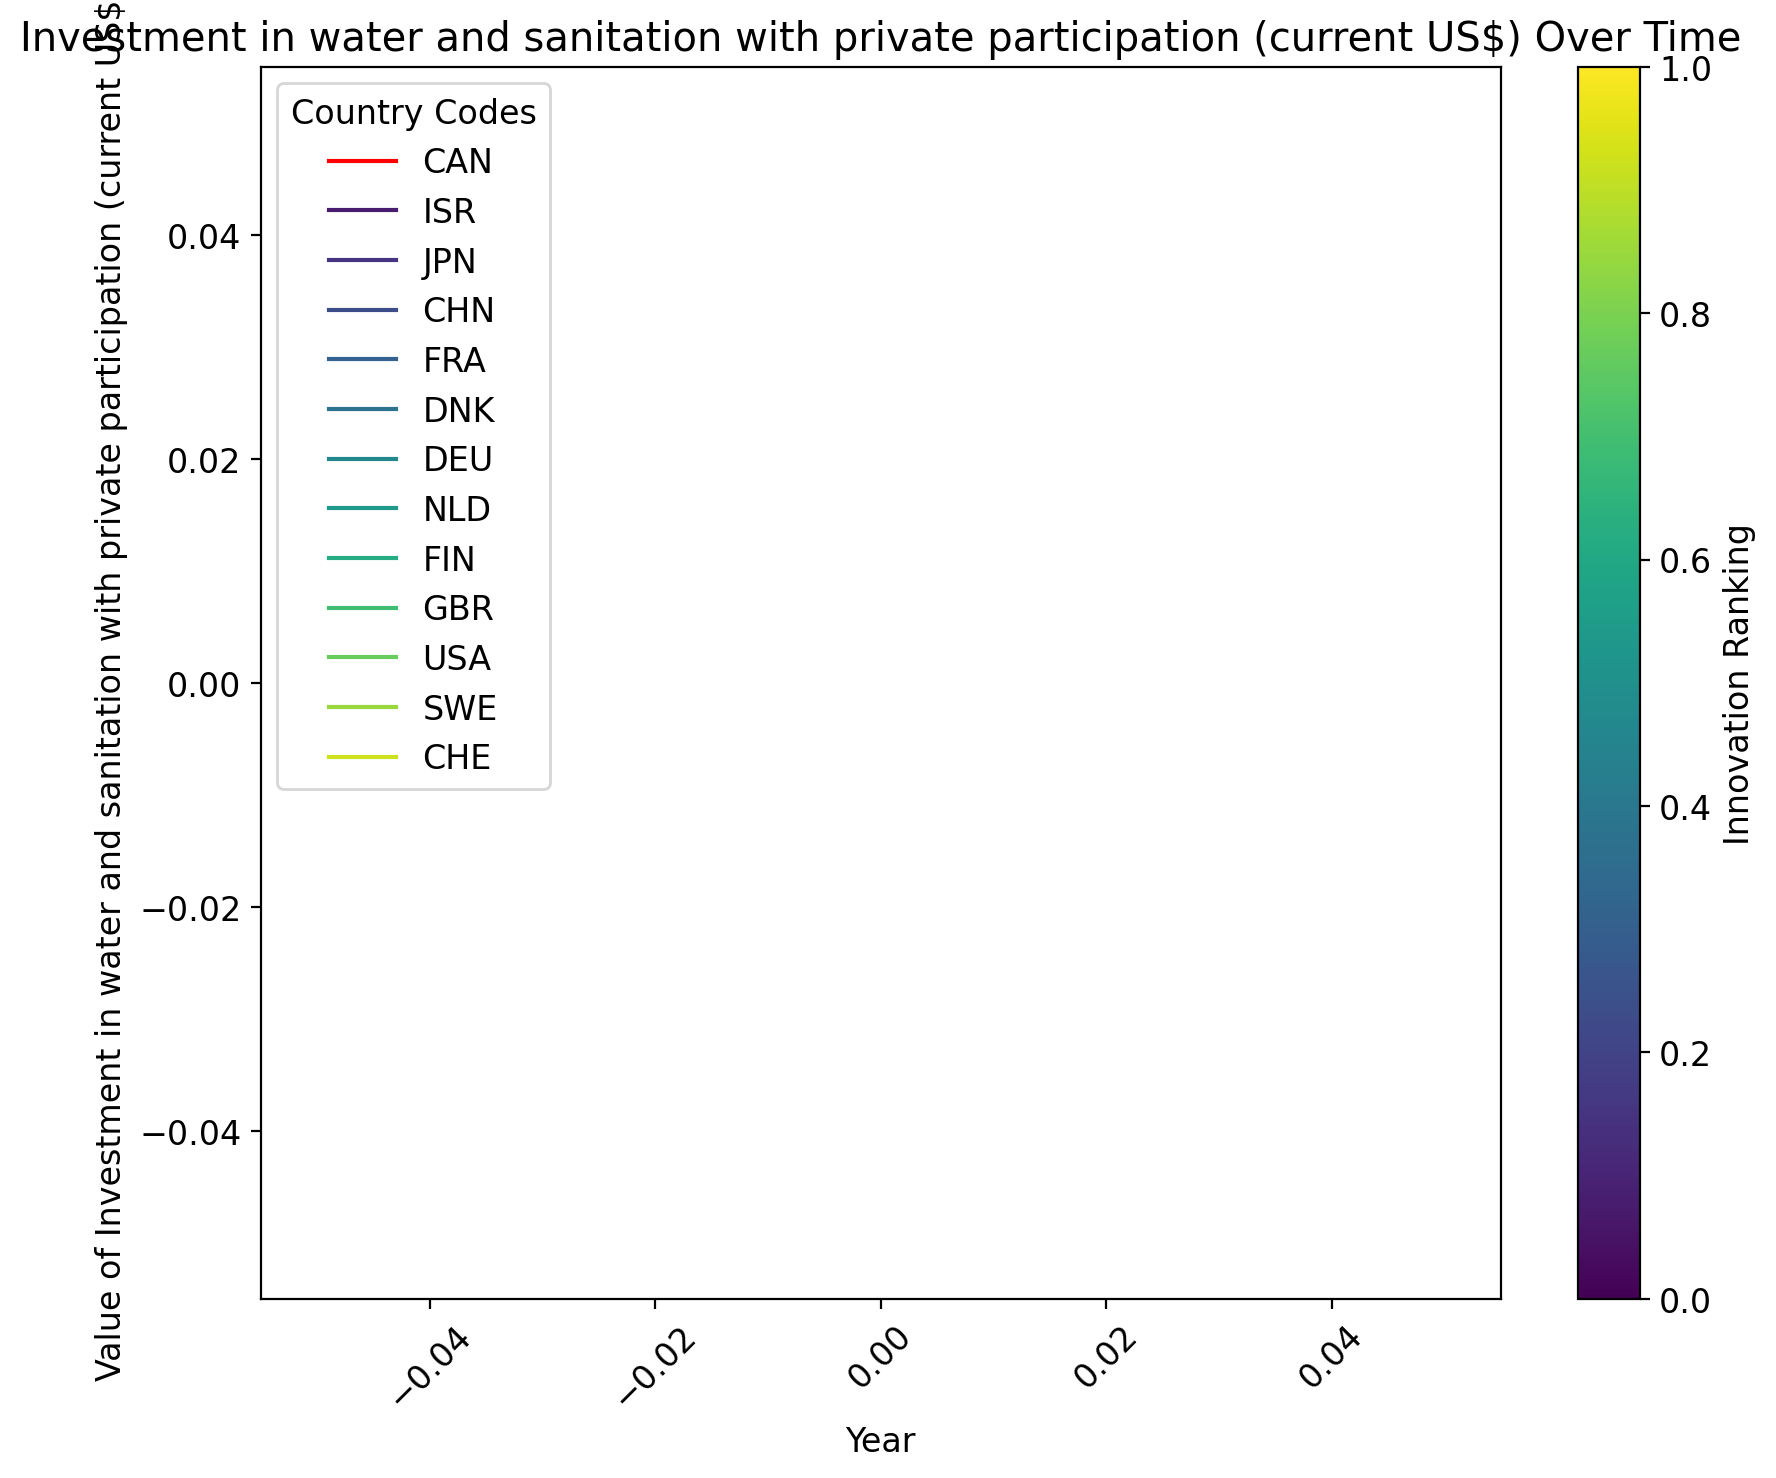

In [31]:
import os

def generate_all_indicator_plots(data_explorer, directory='indicator_plots'):
    
    # Create directory for plots if it doesn't exist
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    # Loop through all indicator codes and save the plots
    for indicator_code in data_explorer.indicator_names.keys():
        plt.figure()  # Create a new figure for each plot
        data_explorer.plot_indicator(indicator_code)
        
        # Construct the filename using the indicator code and save the plot
        filename = f"{directory}/{indicator_code}.png"
        plt.savefig(filename)
        plt.close()  # Close the figure to free up memory

# Usage remains the same
data_explorer = DataExplorer(df, indicator_names)
generate_all_indicator_plots(data_explorer)